In [133]:
# Author: Oluwaseun Ojeleye

import matplotlib.pyplot as plt
import numpy
import os

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
# read dir and search for WHITE, DARK and OBJECT (RAW and HDR)
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    print(myDir)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  

In [135]:
##### Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    #print(filelines)
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
            #print(samples)
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    # read waves   
    print('Original Size: ', lines, bands, samples)
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          #print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    #print(n1)
    #print(n2)
    waves = numpy.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        waves[n] = float(filelines[i].replace(',',''))
        #print(waves[n])
        n = n + 1
    
    return samples, bands, lines, waves     

In [136]:
def read_raw(hdr_path, raw_path, line_start, line_read):
  #Read object hdr File
  [samples, bands, lines, waves] = read_hdr(hdr_path)
  fopen = open(raw_path, "rb")

  if (line_start == -1 or line_read == -1):
    # Read white or dark reference
    raw_white = numpy.fromfile(fopen, dtype=numpy.uint16)
    cube = numpy.reshape(raw_white, (lines, bands, samples))
  else:
    # Read object raw
    fopen.seek(samples*bands*line_start*2) # we skip 'line_start' number of lines
    raw_part = numpy.fromfile(fopen, dtype=numpy.uint16, count=samples*bands*line_read) # we read only 'line_read' number of lines
    cube = numpy.reshape(raw_part, (line_read, bands, samples))
    print('Resized to: ', cube.shape)
    print(waves)

  return cube, waves


In [137]:
def preview_RGB(spectral_cube, ch_1, ch_2, ch_3):
  lines, bands, samples = spectral_cube.shape
  RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
  if (type(spectral_cube[0, 0, 0]) == numpy.uint16):
    RGB[:,:,0] = spectral_cube[:,ch_1,:]/numpy.amax(spectral_cube[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
    RGB[:,:,1] = spectral_cube[:,ch_2,:]/numpy.amax(spectral_cube[:,ch_2,:])
    RGB[:,:,2] = spectral_cube[:,ch_3,:]/numpy.amax(spectral_cube[:,ch_3,:])
  else:
    RGB[:,:,0] = spectral_cube[:,ch_1,:]
    RGB[:,:,1] = spectral_cube[:,ch_2,:]
    RGB[:,:,2] = spectral_cube[:,ch_3,:]
  plt.rcParams['figure.dpi'] = 200
  plt.imshow(RGB)
  plt.show()
  return RGB

In [138]:
[samples, bands, lines, waves] = read_hdr('/content/drive/MyDrive/IMLEX/Segmentation/capture/petal.hdr')

Original Size:  512 204 512


Original Size:  512 204 512
Resized to:  (512, 204, 512)
[ 397.32  400.2   403.09  405.97  408.85  411.74  414.63  417.52  420.4
  423.29  426.19  429.08  431.97  434.87  437.76  440.66  443.56  446.45
  449.35  452.25  455.16  458.06  460.96  463.87  466.77  469.68  472.59
  475.5   478.41  481.32  484.23  487.14  490.06  492.97  495.89  498.8
  501.72  504.64  507.56  510.48  513.4   516.33  519.25  522.18  525.1
  528.03  530.96  533.89  536.82  539.75  542.68  545.62  548.55  551.49
  554.43  557.36  560.3   563.24  566.18  569.12  572.07  575.01  577.96
  580.9   583.85  586.8   589.75  592.7   595.65  598.6   601.55  604.51
  607.46  610.42  613.38  616.34  619.3   622.26  625.22  628.18  631.15
  634.11  637.08  640.04  643.01  645.98  648.95  651.92  654.89  657.87
  660.84  663.81  666.79  669.77  672.75  675.73  678.71  681.69  684.67
  687.65  690.64  693.62  696.61  699.6   702.58  705.57  708.57  711.56
  714.55  717.54  720.54  723.53  726.53  729.53  732.53  735.53  738.

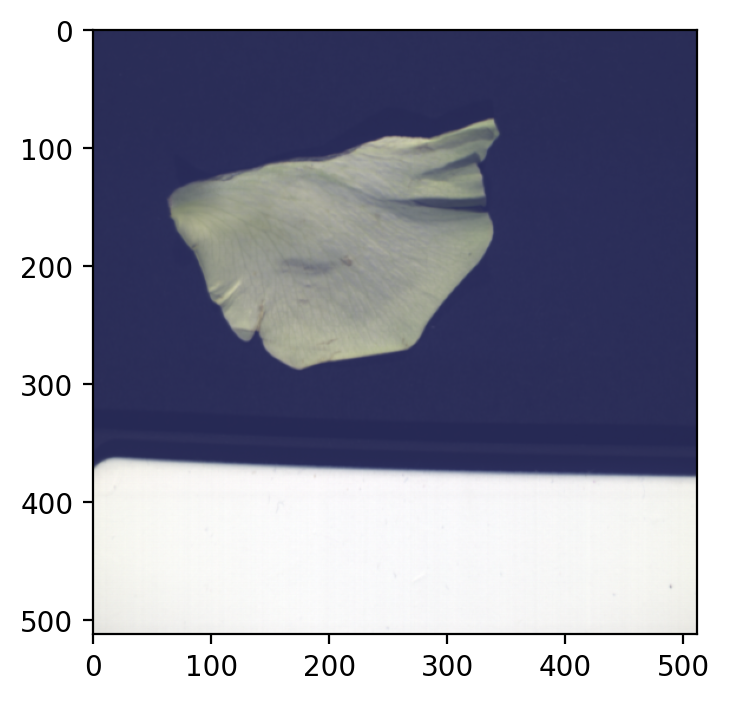

In [139]:
[cube, waves] = read_raw('/content/drive/MyDrive/IMLEX/Segmentation/capture/petal.hdr', '/content/drive/MyDrive/IMLEX/Segmentation/capture/petal.raw', 0, 512)
# [cube, waves] = read_raw('/content/drive/MyDrive/IMLEX/Segmentation/capture/petal_14.hdr', '/content/drive/MyDrive/IMLEX/Segmentation/capture/petal_14.raw', 0, 512)

ch_1 = 70 # Wavelength 631.15
ch_2 = 53 # Wavelength 528.03
ch_3 = 19 # Wavelength 443.56

rgb = preview_RGB(cube, ch_1, ch_2, ch_3)

In [140]:
def element_wise(image_data, RGB2, white_x1, white_y1, waves):
  ##################################################################
  # Select White
  x1 = white_x1
  x2 = white_x1 + 100
  y1 = white_y1
  y2 = white_y1 + 60
  RGB2[y1:y2,x1:x2,0] = 0
  RGB2[y1:y2,x1:x2,1] = 0
  RGB2[y1:y2,x1:x2,2] = 0
  sel = image_data[y1:y2,:,x1:x2]
  sel1 = numpy.sum(sel, axis = 0)
  white = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))

  plt.rcParams['figure.dpi'] = 150
  plt.imshow(RGB2)
  plt.show()

  plt.plot(waves, white, "black")

  plt.xlabel('Wavelength, um')
  plt.ylabel('Camera raw data,')
  #plt.ylabel('Reflectance [0-100]%')
  plt.show()

  # Graph After White noise correction has been made by normalisation
  white_cor = white/white
  plt.rcParams['figure.dpi'] = 200

  plt.plot(waves, white_cor, "black")
  plt.xlabel('Wavelength, um')
  plt.ylabel('Camera raw data,')
  plt.ylabel('Reflectance [0-100]%')
  plt.show()

  # Element-wise White Correction
  [lines, bands, samples] = image_data.shape
  corr = numpy.empty((lines,bands,samples), dtype = numpy.float32)

  for i in range(0,lines):
    for j in range(0,samples):
        corr[i,:,j] = image_data[i,:,j]/white
  return corr

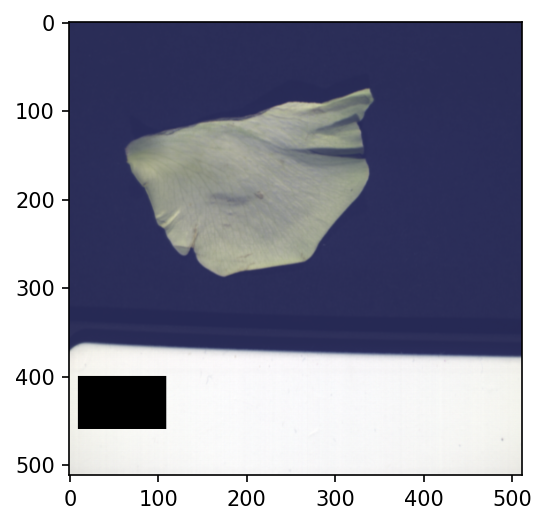

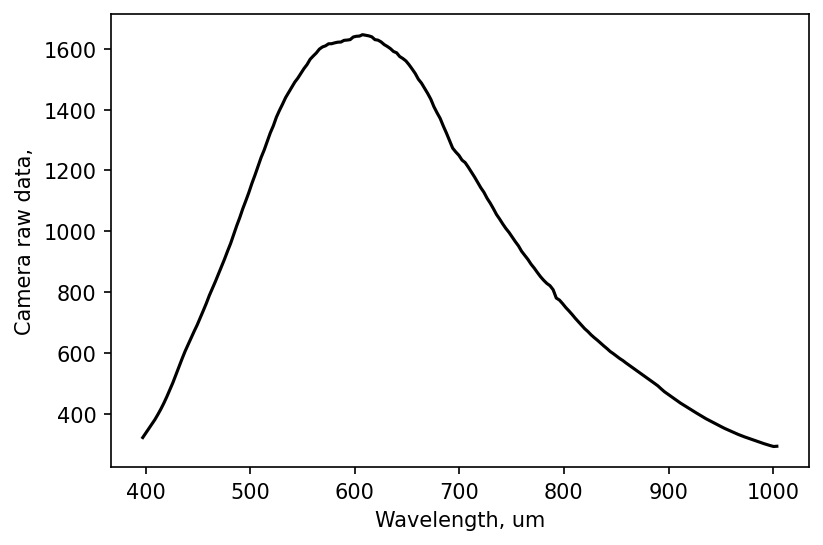

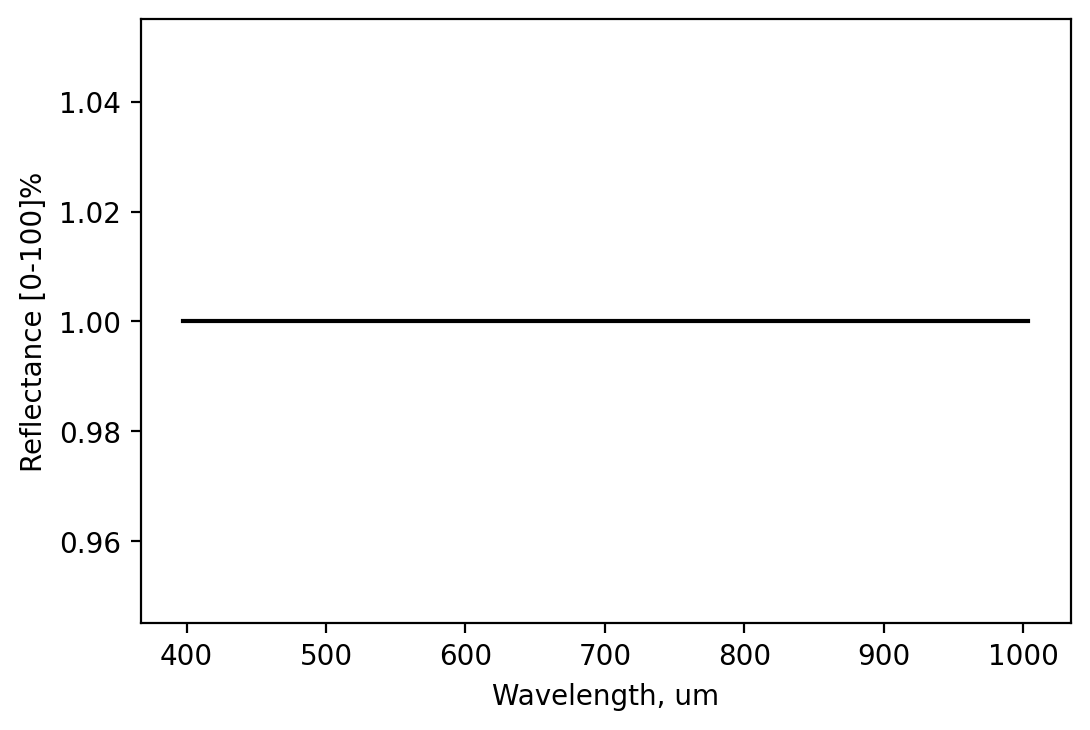

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


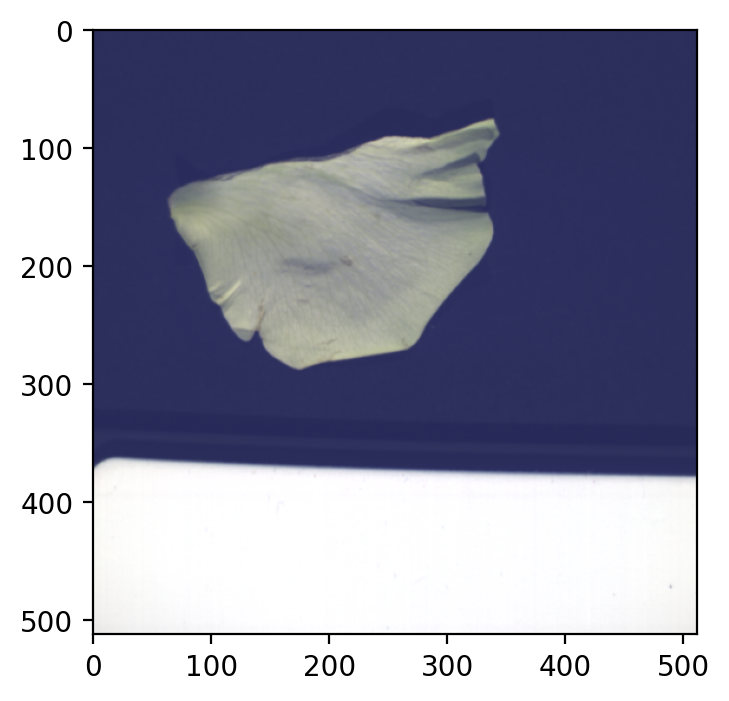

In [141]:
corr_spectral_cube = element_wise(cube, rgb, 10, 400, waves)
object_RGB = preview_RGB(corr_spectral_cube, ch_1, ch_2, ch_3)


# PCA - Principal Component Analysis

(512, 204, 512)
(512, 512, 204)
(204, 262144)


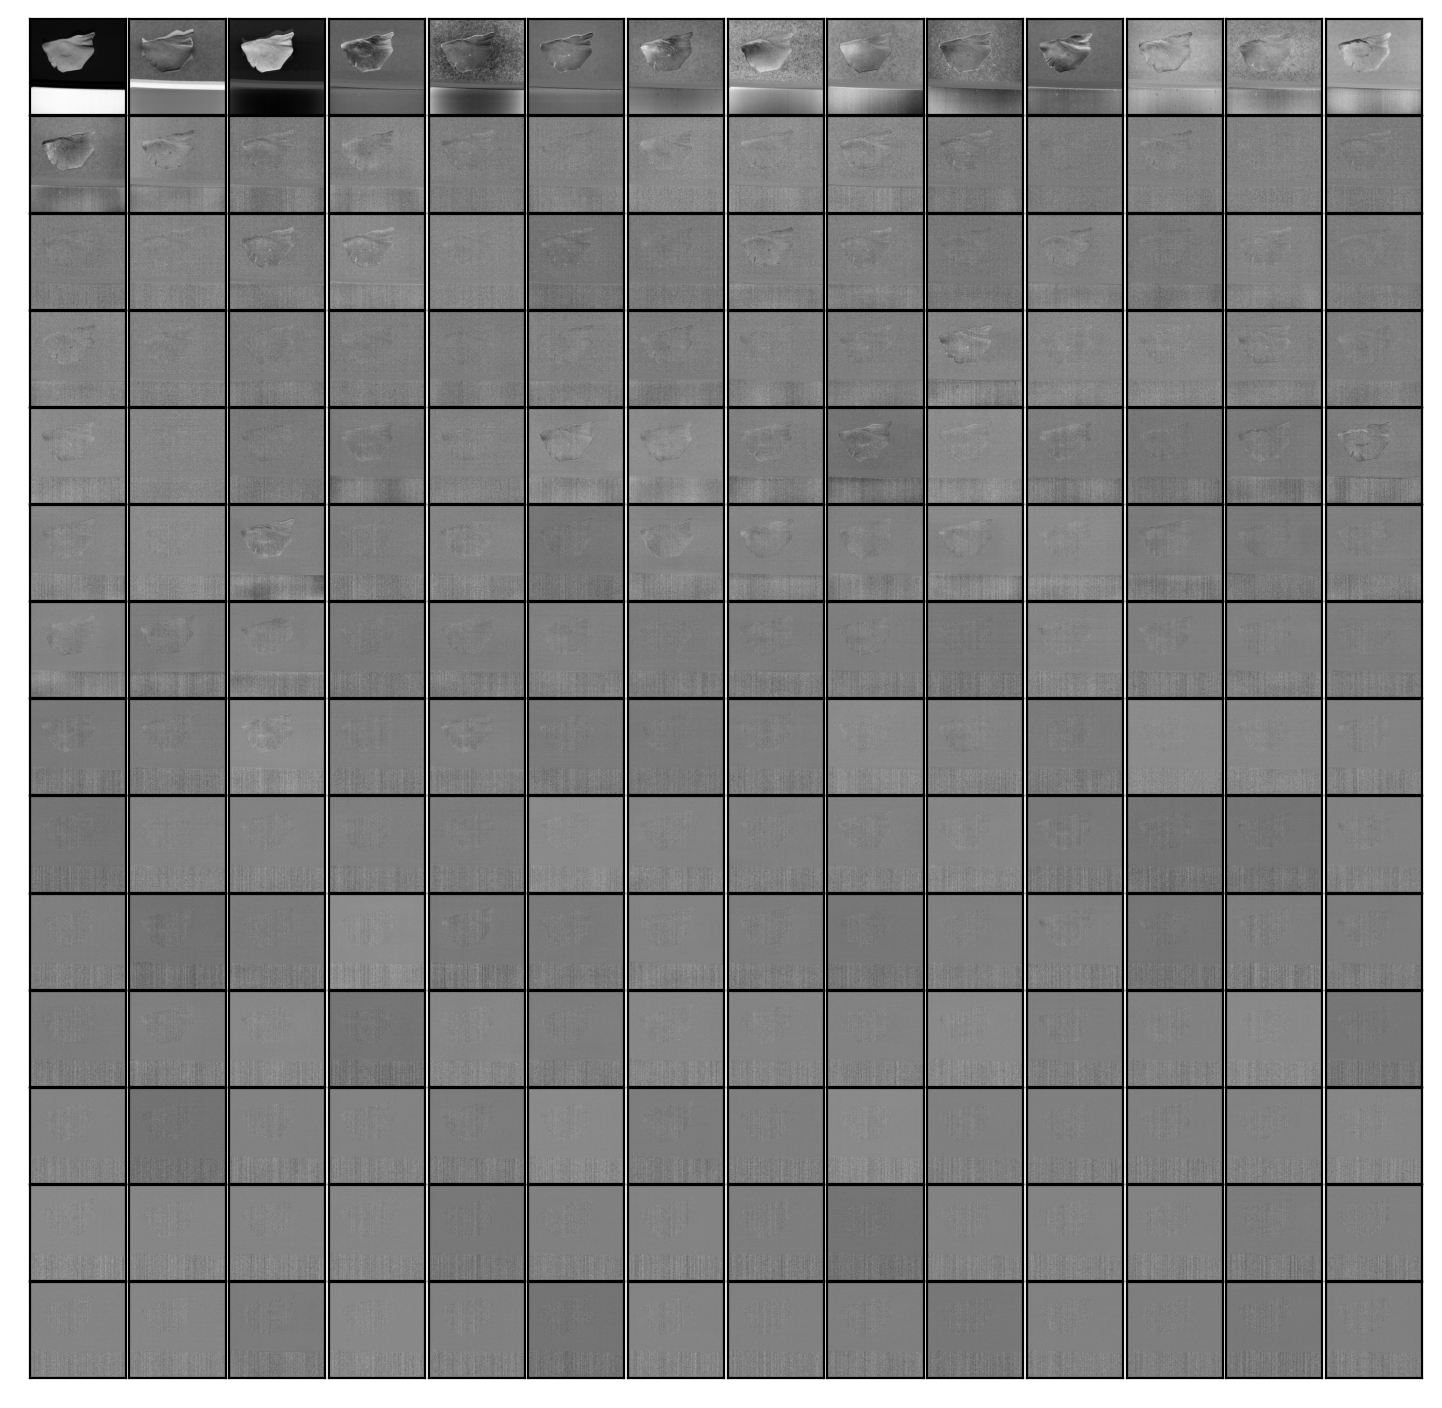

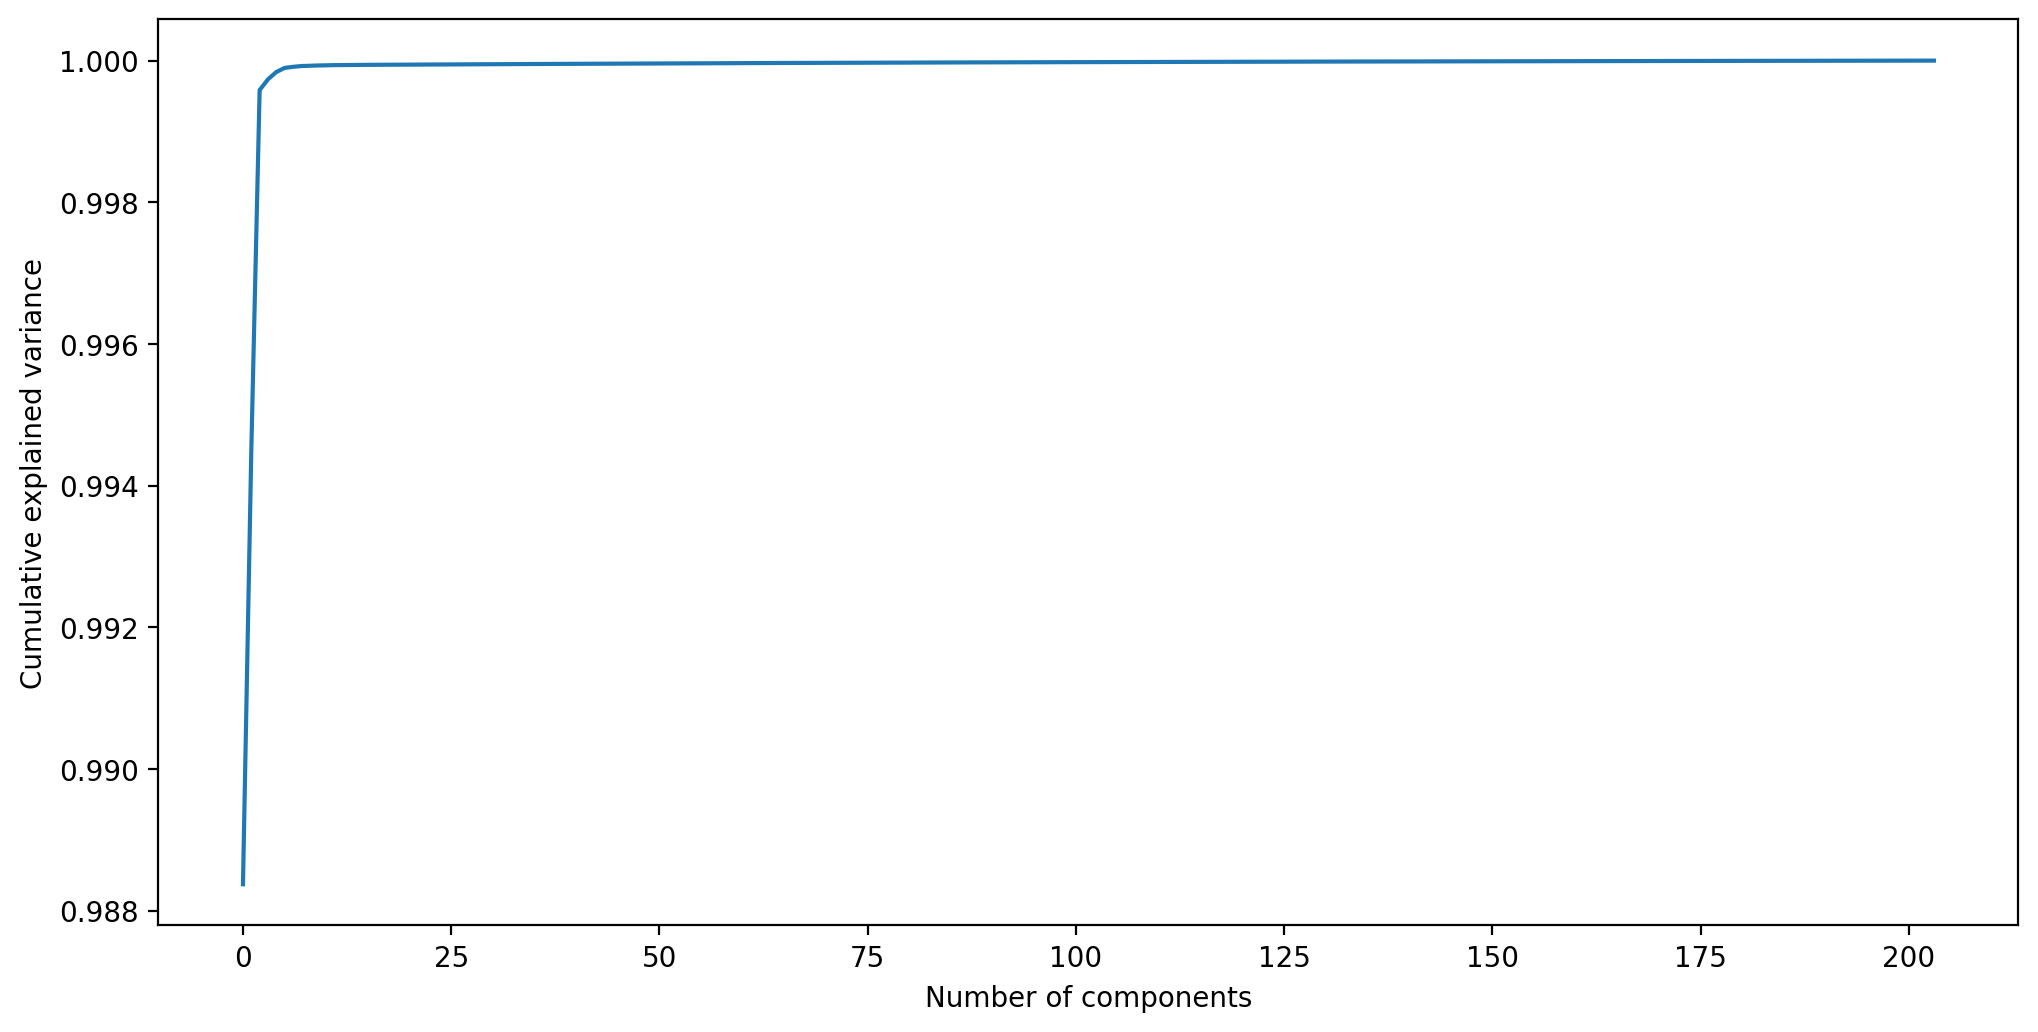

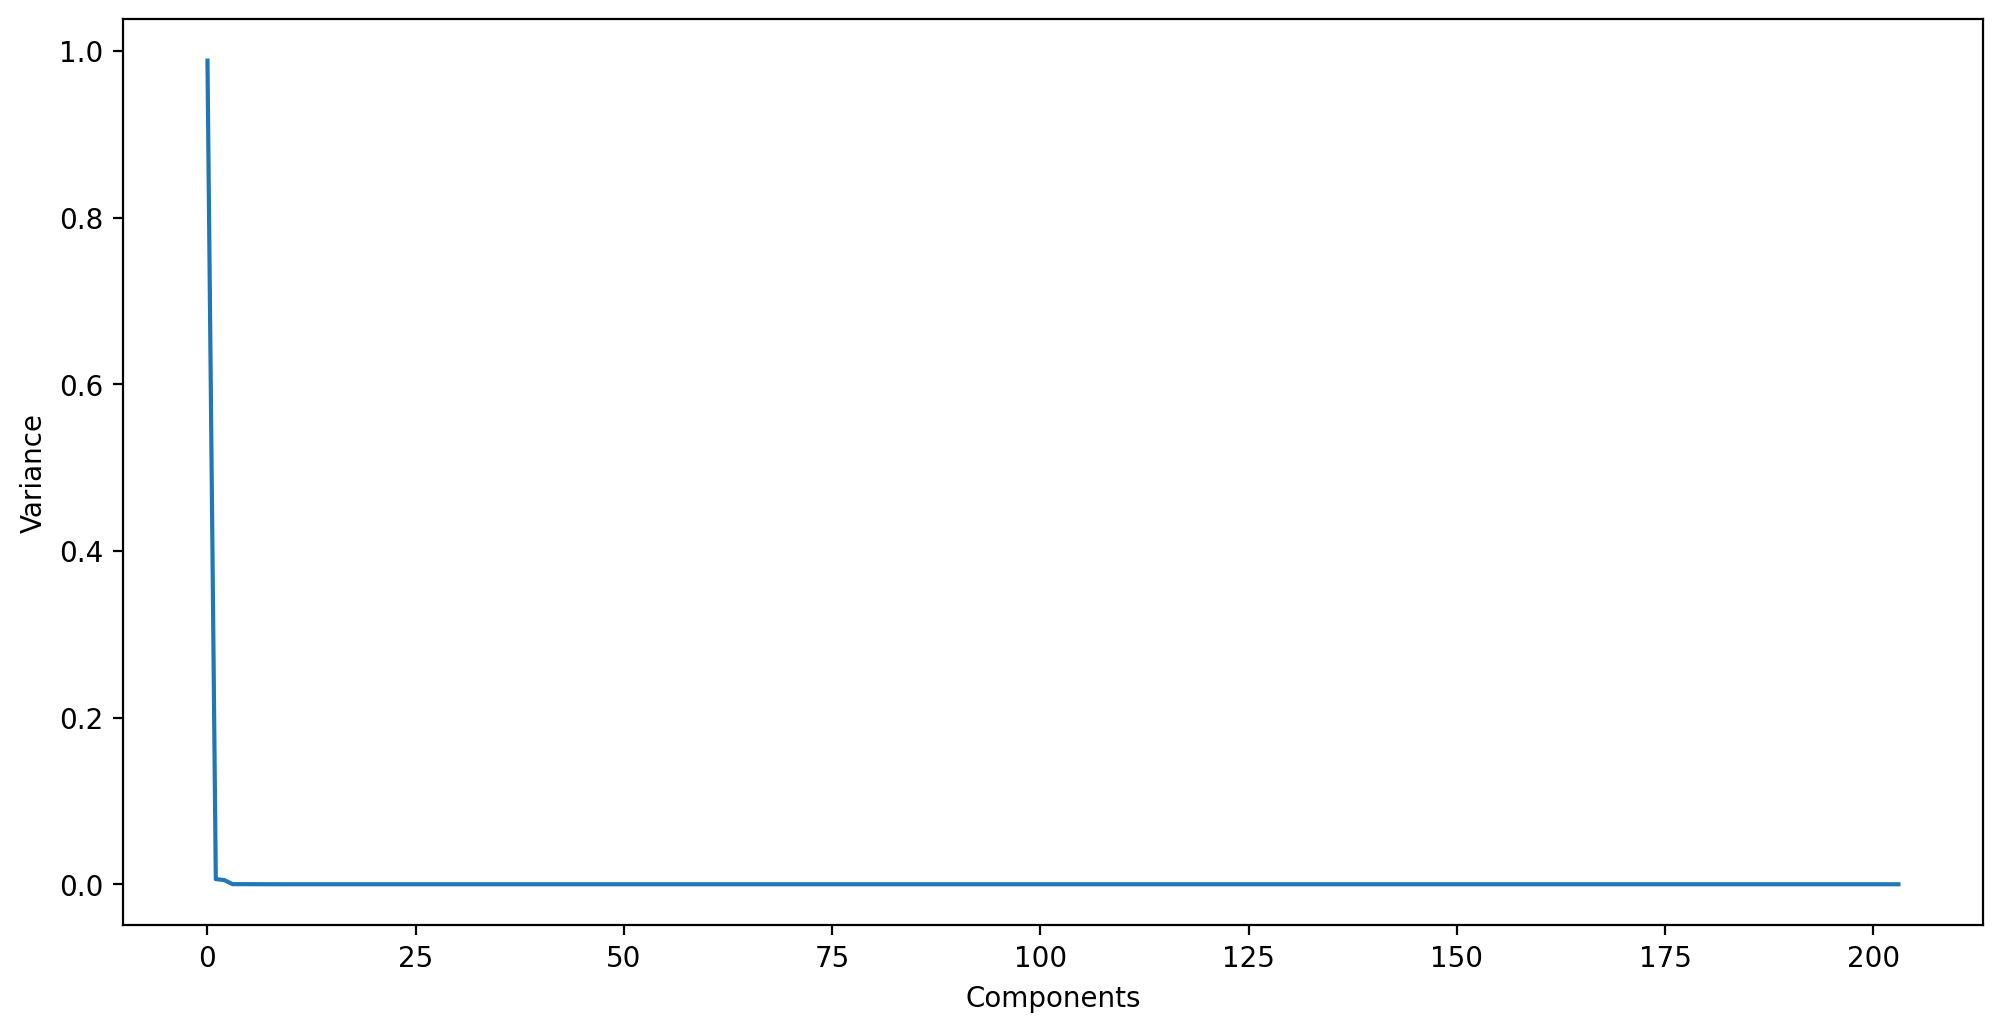

In [142]:
print(corr_spectral_cube.shape)
hyperspectral_image = numpy.swapaxes(corr_spectral_cube, 1,2)
print(hyperspectral_image.shape)

X = numpy.swapaxes(hyperspectral_image.reshape(hyperspectral_image.shape[0]*hyperspectral_image.shape[1], -1), 0, 1)

# Computing covariance matrix
covariance_matrix = numpy.cov(X)
eigen_values, eigen_vectors = numpy.linalg.eig(covariance_matrix)

# Sorting eigen values in descending order and get corresponding eigen vectors
ind=numpy.arange(0,len(eigen_values),1)
ind=[x for _,x in sorted(zip(eigen_values,ind))]
ind=ind[::-1]
eigen_values1=eigen_values[ind]
eigen_vectors1=eigen_vectors[:,ind]

# Get Projection Matrix
feature_maps = (eigen_vectors1.T).dot(X)
print(feature_maps.shape)
fig, axes = plt.subplots(14,14,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[i].reshape(512, 512),cmap="gray")

total_egnvalues = sum(eigen_values1)
var_exp = [(i/total_egnvalues) for i in sorted(eigen_values1, reverse=True)]
plt.figure(figsize=(12, 6))
plt.plot(numpy.cumsum(var_exp))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(var_exp)
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

In [143]:
# Selecting the top 6 eigen vectors
d = 6
V = eigen_vectors1[:, :d]
feature_maps = feature_maps[:d, :]
print(V.shape)
print(feature_maps.shape)

(204, 6)
(6, 262144)


In [144]:
from scipy.interpolate import UnivariateSpline

def interpolate(reflections_array, length):
  old_wavelengths = numpy.arange(0, len(reflections_array))
  new_wavelengths = numpy.linspace(0, len(reflections_array) - 1, length)
  spl = UnivariateSpline(old_wavelengths, reflections_array, k=3, s=0)
  return spl(new_wavelengths)

In [145]:
V = V.T
print(V.shape)

length = 600
interpolated_V = numpy.zeros((V.shape[0], length), dtype=numpy.float32)

for i in range (V.shape[0]):
  interpolated_V[i] = interpolate(V[i], 600)

V = V.T
interpolated_V = interpolated_V.T

(6, 204)


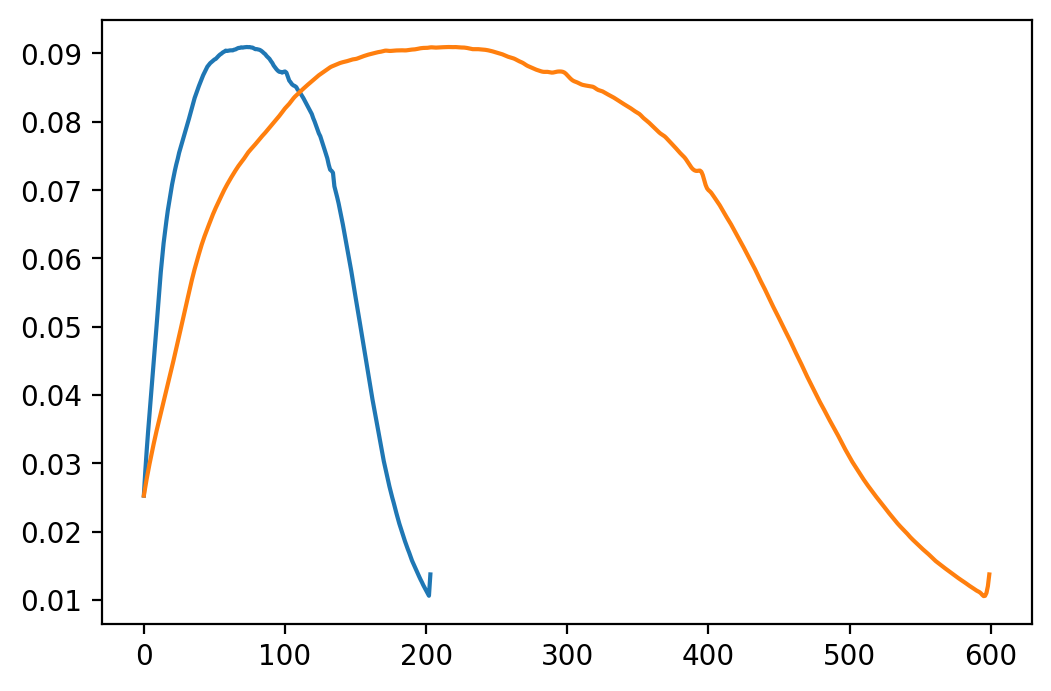

In [146]:
plt.plot(V[:, 0])
plt.plot(interpolated_V[:, 0])
plt.show()

## Reconstruction

Reconstruction for 204 channels




In [147]:
# Computing Average Vector
avg_vector = numpy.mean(X, axis=1)

avg = numpy.tile(avg_vector.reshape(X.shape[0], 1), (1, X.shape[1]))
print(avg.shape)

# Reconstruction
print(V.shape)
print(feature_maps.shape)
hs = numpy.matmul(V, feature_maps) - avg
print(hs.shape)

(204, 262144)
(204, 6)
(6, 262144)
(204, 262144)


Reconstruction for 600 channels




0.4947819941217453
(600, 262144)
(600, 6)
(6, 262144)
(600, 262144)


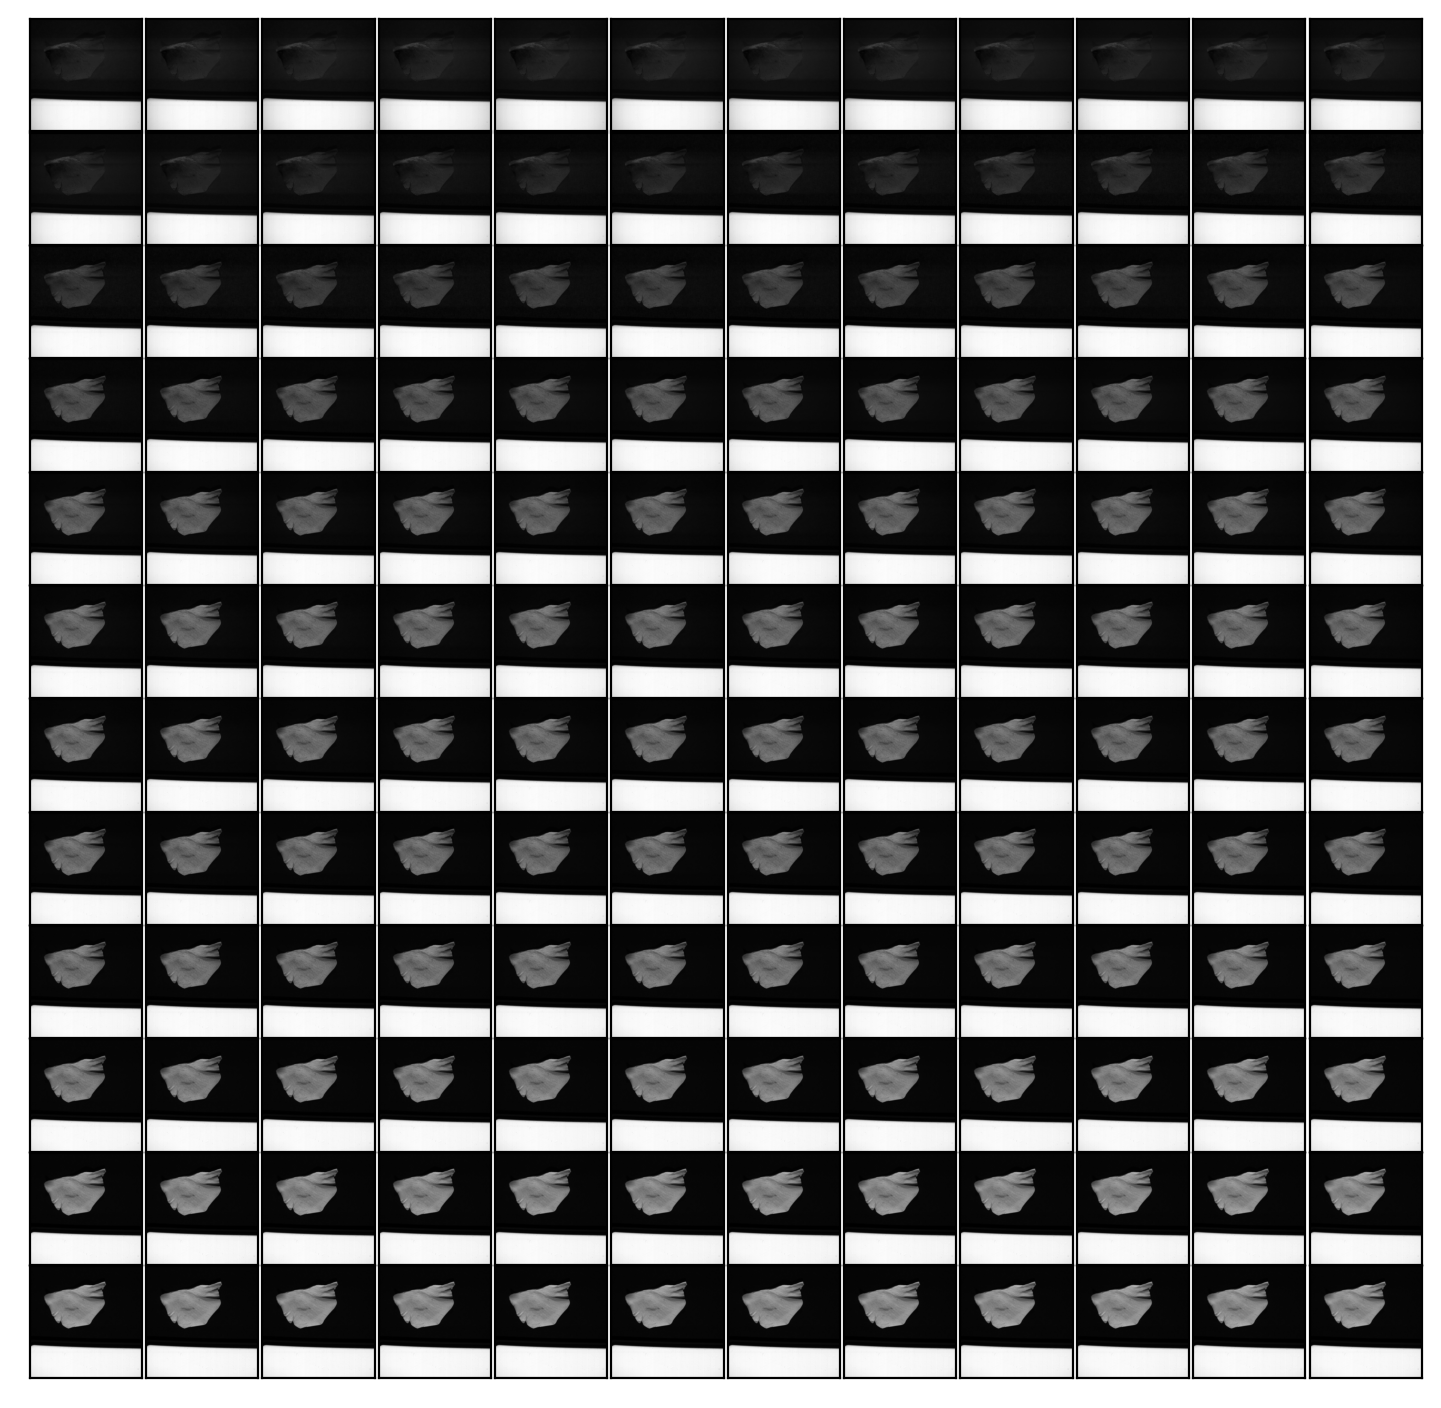

In [148]:
# Computing Average Vector
avg_vector = numpy.mean(X, axis=1)
interpolated_avg_vector = interpolate(avg_vector, 600)
print(interpolated_avg_vector[100])

avg = numpy.tile(interpolated_avg_vector.reshape(600, 1), (1, X.shape[1]))
print(avg.shape)


# Reconstruction
print(interpolated_V.shape)
print(feature_maps.shape)
hs = numpy.matmul(interpolated_V, feature_maps)
print(hs.shape)


fig, axes = plt.subplots(12, 12,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(hs[i].reshape(512, 512),cmap="gray")


Reconstructing single band

[0.49478199 0.49478199 0.49478199 ... 0.49478199 0.49478199 0.49478199]
[ 0.08195419  0.04221655 -0.07465001 -0.07824796  0.01491953 -0.03910396]
[-1.16610839 -1.24806335 -1.16610839 ...  8.17407177  8.18899105
  8.17407177]


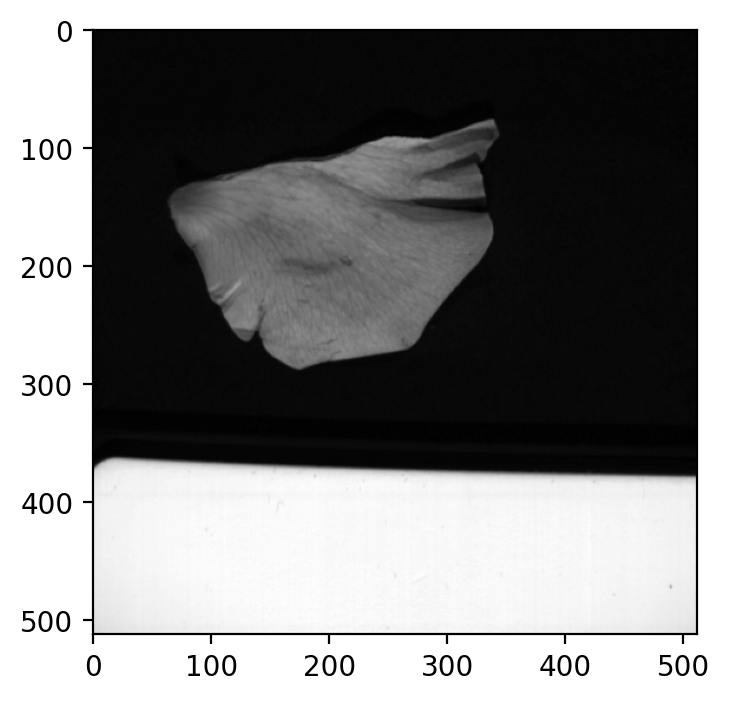

In [149]:
no_comp = 6  # no components to use
band = 100  # what band

print(avg[band])
print(interpolated_V[band][:no_comp])
I = feature_maps[:no_comp, :]  
image = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(numpy.uint8)
hs0 = numpy.matmul(interpolated_V[band][:no_comp], image) - avg[band]
print(hs0)
image = hs0.reshape(512, 512)
plt.imshow(image, cmap='gray')

## Illuminant

Load Illuminant and xyz Tristimulus value

In [150]:
A = [ 2.07062, 2.11596, 2.16198, 2.20867, 2.25604, 2.3041, 2.35284, 2.40228, 2.45241, 2.50324, 2.55476, 2.60699, 2.65993, 2.71358, 2.76794, 2.82301, 2.8788, 2.93531, 2.99254, 3.0505, 3.10918, 3.16859, 3.22874, 3.28962, 3.35123, 3.41358, 3.47666, 3.54049, 3.60506, 3.67037, 3.73643, 3.80324, 3.87079, 3.93908, 4.00813, 4.07793, 4.14848, 4.21978, 4.29183, 4.36464, 4.4382, 4.51251, 4.58758, 4.6634, 4.73997, 4.8173, 4.89539, 4.97423, 5.05382, 5.13417, 5.21527, 5.29712, 5.37973, 5.46309, 5.5472, 5.63206, 5.71766, 5.80402, 5.89113, 5.97897, 6.06757, 6.15691, 6.24698, 6.33781, 6.42936, 6.52166, 6.61469, 6.70846, 6.80296, 6.89818, 6.99414, 7.09082, 7.18822, 7.28635, 7.3852, 7.48476, 7.58503, 7.68602, 7.78771, 7.89012, 7.99322, 8.09702, 8.20153, 8.30672, 8.41261, 8.51919, 8.62645, 8.73439, 8.84302, 8.95231, 9.06228, 9.17292, 9.28422, 9.39618, 9.5088, 9.62208, 9.736, 9.85057, 9.96578, 10.0816, 10.1981, 10.3152, 10.433, 10.5513, 10.6703, 10.7899, 10.9101, 11.0309, 11.1523, 11.2743, 11.3969, 11.5201, 11.6438, 11.7682, 11.8931, 12.0185, 12.1446, 12.2712, 12.3983, 12.526, 12.6542, 12.783, 12.9123, 13.0422, 13.1725, 13.3034, 13.4348, 13.5667, 13.6991, 13.832, 13.9654, 14.0993, 14.2336, 14.3684, 14.5038, 14.6395, 14.7757, 14.9124, 15.0496, 15.1871, 15.3251, 15.4636, 15.6025, 15.7417, 15.8815, 16.0216, 16.1621, 16.303, 16.4443, 16.586, 16.7281, 16.8706, 17.0134, 17.1566, 17.3001, 17.444, 17.5883, 17.7329, 17.8778, 18.023, 18.1686, 18.3145, 18.4607, 18.6073, 18.7541, 18.9012, 19.0486, 19.1963, 19.3442, 19.4925, 19.641, 19.7897, 19.9388, 20.088, 20.2375, 20.3873, 20.5372, 20.6874, 20.8379, 20.9885, 21.1393, 21.2904, 21.4416, 21.5931, 21.7447, 21.8965, 22.0484, 22.2006, 22.3529, 22.5053, 22.6579, 22.8107, 22.9636, 23.1166, 23.2698, 23.423, 23.5764, 23.7299, 23.8836, 24.0373, 24.1911, 24.345, 24.4989, 24.653, 24.8072, 24.9613, 25.1156, 25.2699, 25.4243, 25.5787, 25.7332, 25.8877, 26.0422, 26.1967, 26.3513, 26.5059, 26.6604, 26.815, 26.9696, 27.1242, 27.2788, 27.4333, 27.5879, 27.7424, 27.8968, 28.0513, 28.2057, 28.36, 28.5143, 28.6685, 28.8227, 28.9768, 29.1308, 29.2848, 29.4387, 29.5924, 29.7462, 29.8998, 30.0532, 30.2067, 30.3599, 30.5131, 30.6662, 30.8191, 30.9719, 31.1246, 31.2771, 31.4295, 31.5817, 31.7338, 31.8858, 32.0376, 32.1892, 32.3406, 32.4919, 32.643, 32.7939, 32.9447, 33.0952, 33.2456, 33.3958, 33.5457, 33.6955, 33.845, 33.9944, 34.1435, 34.2924, 34.4411, 34.5895, 34.7377, 34.8857, 35.0335, 35.181, 35.3282, 35.4752, 35.622, 35.7685, 35.9147, 36.0607, 36.2064, 36.3518, 36.497, 36.6418, 36.7864, 36.9308, 37.0748, 37.2185, 37.362, 37.5051, 37.648, 37.7905, 37.9327, 38.0746, 38.2163, 38.3575, 38.4985, 38.6392, 38.7795, 38.9195, 39.0592, 39.1985, 39.3375, 39.4762, 39.6145, 39.7525, 39.8901, 40.0274, 40.1643, 40.3009, 40.4371, 40.5729, 40.7084, 40.8435, 40.9783, 41.1127, 41.2467, 41.3803, 41.5136, 41.6465, 41.779, 41.9111, 42.0428, 42.1742, 42.3051, 42.4357, 42.5659, 42.6956, 42.825, 42.954, 43.0825, 43.2107, 43.3385, 43.4658, 43.5927, 43.7193, 43.8454, 43.9711, 44.0964, 44.2212, 44.3457, 44.4697, 44.5933, 44.7164, 44.8392, 44.9615, 45.0834, 45.2048, 45.3258, 45.4464, 45.5665, 45.6862, 45.8055, 45.9243, 46.0427, 46.1606, 46.2781, 46.3952, 46.5118, 46.6279, 46.7436, 46.8589, 46.9737, 47.088, 47.2019, 47.3153, 47.4283, 47.5408, 47.6529, 47.7645, 47.8756, 47.9863, 48.0966, 48.2063, 48.3156, 48.4244, 48.5328, 48.6407, 48.7481, 48.8551, 48.9616, 49.0676, 49.1732, 49.2782, 49.3828, 49.487, 49.5906, 49.6938, 49.7966, 49.8988, 50.0006, 50.1019, 50.2027, 50.303, 50.4029, 50.5023, 50.6012, 50.6996, 50.7976, 50.895, 50.9921, 51.0886]
B = [ 6.27749, 6.52691, 6.77633, 7.02574, 7.27516, 7.52458, 7.774, 8.02342, 8.27284, 8.52225, 8.77167, 9.04519, 9.31871, 9.59223, 9.86575, 10.1393, 10.4262, 10.7132, 11.0002, 11.2872, 11.5741, 11.8611, 12.1481, 12.435, 12.722, 13.009, 13.3273, 13.6457, 13.9641, 14.2824, 14.6008, 14.9146, 15.2285, 15.5424, 15.8563, 16.1701, 16.4784, 16.7867, 17.095, 17.4032, 17.7115, 18.0013, 18.291, 18.5808, 18.8706, 19.1604, 19.4255, 19.6906, 19.9557, 20.2208, 20.4859, 20.7219, 20.9578, 21.1938, 21.4298, 21.6657, 21.8614, 22.057, 22.2526, 22.4482, 22.6438, 22.7918, 22.9397, 23.0877, 23.2357, 23.3837, 23.4935, 23.6034, 23.7132, 23.8231, 23.9329, 24.0159, 24.0988, 24.1818, 24.2647, 24.3477, 24.4273, 24.5069, 24.5865, 24.6661, 24.7456, 24.8454, 24.9452, 25.0449, 25.1447, 25.2445, 25.3521, 25.4597, 25.5673, 25.6749, 25.7825, 25.8806, 25.9787, 26.0768, 26.1749, 26.273, 26.3542, 26.4355, 26.5168, 26.5981, 26.6793, 26.7371, 26.7948, 26.8525, 26.9103, 26.968, 26.9831, 26.9983, 27.0134, 27.0285, 27.0437, 26.9994, 26.9551, 26.9108, 26.8665, 26.8223, 26.7376, 26.653, 26.5684, 26.4837, 26.3991, 26.2965, 26.1939, 26.0914, 25.9888, 25.8862, 25.7926, 25.699, 25.6054, 25.5118, 25.4182, 25.3594, 25.3005, 25.2417, 25.1828, 25.124, 25.1156, 25.1072, 25.0987, 25.0903, 25.0819, 25.1341, 25.1862, 25.2383, 25.2904, 25.3426, 25.4418, 25.541, 25.6402, 25.7394, 25.8386, 25.9653, 26.0919, 26.2186, 26.3453, 26.472, 26.6087, 26.7455, 26.8822, 27.019, 27.1558, 27.2824, 27.4091, 27.5358, 27.6624, 27.7891, 27.8922, 27.9954, 28.0985, 28.2016, 28.3048, 28.372, 28.4393, 28.5065, 28.5738, 28.641, 28.6747, 28.7083, 28.7419, 28.7756, 28.8092, 28.8159, 28.8226, 28.8294, 28.8361, 28.8428, 28.8249, 28.807, 28.789, 28.7711, 28.7531, 28.7139, 28.6747, 28.6354, 28.5962, 28.557, 28.5065, 28.4561, 28.4056, 28.3552, 28.3048, 28.2526, 28.2005, 28.1484, 28.0963, 28.0441, 27.9954, 27.9466, 27.8978, 27.8491, 27.8003, 27.7577, 27.7151, 27.6725, 27.6299, 27.5873, 27.5627, 27.538, 27.5133, 27.4887, 27.464, 27.4685, 27.473, 27.4775, 27.482, 27.4864, 27.51, 27.5335, 27.5571, 27.5806, 27.6041, 27.6355, 27.6669, 27.6983, 27.7297, 27.7611, 27.797, 27.8328, 27.8687, 27.9046, 27.9404, 27.9774, 28.0144, 28.0514, 28.0884, 28.1254, 28.1613, 28.1971, 28.233, 28.2689, 28.3048, 28.3361, 28.3675, 28.3989, 28.4303, 28.4617, 28.4976, 28.5334, 28.5693, 28.6052, 28.641, 28.6887, 28.7363, 28.784, 28.8316, 28.8793, 28.9269, 28.9745, 29.0222, 29.0698, 29.1175, 29.1561, 29.1948, 29.2335, 29.2722, 29.3108, 29.3338, 29.3568, 29.3798, 29.4028, 29.4257, 29.4302, 29.4347, 29.4392, 29.4437, 29.4482, 29.4381, 29.428, 29.4179, 29.4078, 29.3977, 29.3781, 29.3585, 29.3389, 29.3192, 29.2996, 29.2632, 29.2268, 29.1903, 29.1539, 29.1175, 29.0581, 28.9986, 28.9392, 28.8798, 28.8204, 28.7509, 28.6814, 28.6119, 28.5424, 28.4729, 28.4045, 28.3361, 28.2678, 28.1994, 28.131, 28.0593, 27.9875, 27.9158, 27.844, 27.7723, 27.6938, 27.6154, 27.5369, 27.4584, 27.3799, 27.2959, 27.2118, 27.1277, 27.0437, 26.9596, 26.8699, 26.7802, 26.6905, 26.6009, 26.5112, 26.4159, 26.3206, 26.2253, 26.1301, 26.0348, 25.9339, 25.833, 25.7321, 25.6312, 25.5303, 25.435, 25.3398, 25.2445, 25.1492, 25.0539, 24.9754, 24.897, 24.8185, 24.74, 24.6616, 24.5999, 24.5383, 24.4766, 24.415, 24.3533, 24.2972, 24.2412, 24.1852, 24.1291, 24.0731, 24.0338, 23.9946, 23.9554, 23.9161, 23.8769, 23.8545, 23.832, 23.8096, 23.7872, 23.7648, 23.7592, 23.7536, 23.748, 23.7424, 23.7368, 23.748, 23.7592, 23.7704, 23.7816, 23.7928, 23.8208, 23.8489, 23.8769, 23.9049, 23.9329, 23.9722, 24.0114, 24.0506, 24.0899, 24.1291, 24.1795, 24.23, 24.2804, 24.3309, 24.3813]
C =  [9.18619, 9.57145, 9.95671, 10.342, 10.7272, 11.1125, 11.5289, 11.9454, 12.3618, 12.7783, 13.1947, 13.6273, 14.0599, 14.4925, 14.925, 15.3576, 15.8103, 16.2629, 16.7155, 17.1681, 17.6208, 18.0946, 18.5683, 19.0421, 19.5159, 19.9897, 20.4791, 20.9684, 21.4578, 21.9472, 22.4366, 22.9337, 23.4309, 23.9281, 24.4252, 24.9224, 25.3995, 25.8767, 26.3538, 26.8309, 27.308, 27.7367, 28.1654, 28.5941, 29.0228, 29.4515, 29.8189, 30.1864, 30.5538, 30.9213, 31.2887, 31.5866, 31.8844, 32.1823, 32.4801, 32.778, 32.9868, 33.1955, 33.4043, 33.6131, 33.8219, 33.9304, 34.039, 34.1476, 34.2561, 34.3647, 34.3953, 34.4259, 34.4566, 34.4872, 34.5178, 34.4955, 34.4733, 34.451, 34.4287, 34.4064, 34.3786, 34.3508, 34.3229, 34.2951, 34.2673, 34.2784, 34.2895, 34.3007, 34.3118, 34.3229, 34.3508, 34.3786, 34.4064, 34.4343, 34.4621, 34.4783, 34.4944, 34.5106, 34.5267, 34.5428, 34.5323, 34.5217, 34.5111, 34.5005, 34.49, 34.4354, 34.3808, 34.3263, 34.2717, 34.2172, 34.0936, 33.97, 33.8464, 33.7228, 33.5992, 33.3876, 33.1761, 32.9645, 32.7529, 32.5414, 32.2741, 32.0069, 31.7397, 31.4724, 31.2052, 30.9201, 30.6351, 30.35, 30.065, 29.78, 29.5194, 29.2588, 28.9983, 28.7377, 28.4772, 28.2829, 28.0886, 27.8943, 27.7, 27.5057, 27.3993, 27.293, 27.1867, 27.0803, 26.974, 26.9673, 26.9606, 26.9539, 26.9473, 26.9406, 27.0085, 27.0764, 27.1443, 27.2123, 27.2802, 27.3882, 27.4962, 27.6042, 27.7122, 27.8202, 27.9405, 28.0607, 28.181, 28.3013, 28.4215, 28.5245, 28.6275, 28.7305, 28.8335, 28.9365, 29.0061, 29.0757, 29.1453, 29.2149, 29.2845, 29.3106, 29.3368, 29.363, 29.3891, 29.4153, 29.3947, 29.3741, 29.3535, 29.3329, 29.3123, 29.246, 29.1798, 29.1135, 29.0473, 28.981, 28.8803, 28.7795, 28.6787, 28.578, 28.4772, 28.3575, 28.2378, 28.1181, 27.9984, 27.8787, 27.7479, 27.617, 27.4862, 27.3554, 27.2245, 27.0926, 26.9606, 26.8287, 26.6967, 26.5648, 26.4406, 26.3165, 26.1923, 26.0682, 25.944, 25.8338, 25.7236, 25.6133, 25.5031, 25.3928, 25.3082, 25.2236, 25.139, 25.0544, 24.9697, 24.9213, 24.8729, 24.8244, 24.776, 24.7275, 24.7036, 24.6797, 24.6557, 24.6318, 24.6078, 24.5962, 24.5845, 24.5728, 24.5611, 24.5494, 24.5444, 24.5394, 24.5344, 24.5293, 24.5243, 24.5221, 24.5199, 24.5177, 24.5154, 24.5132, 24.5099, 24.5065, 24.5032, 24.4998, 24.4965, 24.4887, 24.4809, 24.4731, 24.4653, 24.4575, 24.4542, 24.4508, 24.4475, 24.4442, 24.4408, 24.4514, 24.462, 24.4726, 24.4831, 24.4937, 24.5054, 24.5171, 24.5288, 24.5405, 24.5522, 24.5522, 24.5522, 24.5522, 24.5522, 24.5522, 24.5355, 24.5188, 24.5021, 24.4854, 24.4687, 24.4308, 24.3929, 24.3551, 24.3172, 24.2794, 24.2282, 24.1769, 24.1257, 24.0745, 24.0233, 23.9676, 23.9119, 23.8562, 23.8006, 23.7449, 23.6725, 23.6002, 23.5278, 23.4554, 23.383, 23.2834, 23.1837, 23.0841, 22.9844, 22.8847, 22.7728, 22.6609, 22.549, 22.4371, 22.3252, 22.2161, 22.107, 21.9979, 21.8887, 21.7796, 21.6716, 21.5636, 21.4556, 21.3476, 21.2396, 21.1316, 21.0236, 20.9156, 20.8076, 20.6995, 20.5904, 20.4813, 20.3722, 20.2631, 20.1539, 20.0426, 19.9312, 19.8199, 19.7085, 19.5972, 19.4803, 19.3634, 19.2465, 19.1295, 19.0126, 18.9013, 18.7899, 18.6786, 18.5672, 18.4559, 18.3501, 18.2443, 18.1385, 18.0328, 17.927, 17.8379, 17.7488, 17.6597, 17.5707, 17.4816, 17.4092, 17.3368, 17.2645, 17.1921, 17.1197, 17.0473, 16.975, 16.9026, 16.8302, 16.7578, 16.7022, 16.6465, 16.5908, 16.5351, 16.4795, 16.4405, 16.4015, 16.3625, 16.3236, 16.2846, 16.2623, 16.2401, 16.2178, 16.1955, 16.1733, 16.1677, 16.1621, 16.1566, 16.151, 16.1454, 16.1566, 16.1677, 16.1788, 16.19, 16.2011, 16.2178, 16.2345, 16.2512, 16.2679, 16.2846, 16.318, 16.3514, 16.3848, 16.4182, 16.4516]
E = [ 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377]
D50 = [ 7.07727, 7.23291, 7.38855, 7.5442, 7.69984, 7.85548, 8.01112, 8.16677, 8.32241, 8.47806, 8.6337, 9.19559, 9.75748, 10.3194, 10.8813, 11.4432, 12.005, 12.5669, 13.1288, 13.6907, 14.2526, 14.4609, 14.6691, 14.8774, 15.0857, 15.2939, 15.5022, 15.7105, 15.9187, 16.127, 16.3353, 16.437, 16.5388, 16.6406, 16.7424, 16.8442, 16.946, 17.0478, 17.1496, 17.2514, 17.3532, 17.2892, 17.2252, 17.1611, 17.0971, 17.033, 16.969, 16.905, 16.8409, 16.7769, 16.7128, 17.2045, 17.6962, 18.1879, 18.6795, 19.1712, 19.6629, 20.1546, 20.6462, 21.1379, 21.6296, 21.9887, 22.3478, 22.7069, 23.066, 23.4252, 23.7843, 24.1434, 24.5025, 24.8616, 25.2208, 25.3181, 25.4153, 25.5126, 25.6099, 25.7072, 25.8045, 25.9018, 25.9991, 26.0964, 26.1937, 26.2156, 26.2374, 26.2593, 26.2812, 26.303, 26.3249, 26.3468, 26.3686, 26.3905, 26.4124, 26.5205, 26.6287, 26.7368, 26.845, 26.9531, 27.0613, 27.1694, 27.2776, 27.3857, 27.4938, 27.4029, 27.312, 27.2211, 27.1301, 27.0392, 26.9483, 26.8574, 26.7664, 26.6755, 26.5846, 26.6933, 26.8021, 26.9108, 27.0195, 27.1283, 27.237, 27.3458, 27.4545, 27.5632, 27.672, 27.6977, 27.7234, 27.7492, 27.7749, 27.8006, 27.8264, 27.8521, 27.8778, 27.9035, 27.9293, 27.9442, 27.9591, 27.9741, 27.989, 28.0039, 28.0188, 28.0338, 28.0487, 28.0636, 28.0785, 28.2222, 28.3659, 28.5096, 28.6533, 28.797, 28.9407, 29.0844, 29.2281, 29.3717, 29.5154, 29.4766, 29.4377, 29.3989, 29.36, 29.3211, 29.2823, 29.2434, 29.2046, 29.1657, 29.1269, 29.172, 29.2172, 29.2624, 29.3075, 29.3527, 29.3979, 29.4431, 29.4882, 29.5334, 29.5786, 29.5116, 29.4446, 29.3776, 29.3107, 29.2437, 29.1767, 29.1097, 29.0428, 28.9758, 28.9088, 28.8433, 28.7779, 28.7124, 28.6469, 28.5815, 28.516, 28.4505, 28.385, 28.3196, 28.2541, 28.2883, 28.3225, 28.3567, 28.3909, 28.4251, 28.4593, 28.4935, 28.5277, 28.5619, 28.5961, 28.4395, 28.2828, 28.1261, 27.9695, 27.8128, 27.6561, 27.4995, 27.3428, 27.1861, 27.0294, 27.1505, 27.2716, 27.3928, 27.5139, 27.635, 27.7561, 27.8772, 27.9983, 28.1194, 28.2405, 28.2862, 28.3319, 28.3776, 28.4233, 28.469, 28.5148, 28.5605, 28.6062, 28.6519, 28.6976, 28.691, 28.6845, 28.6779, 28.6713, 28.6647, 28.6582, 28.6516, 28.645, 28.6384, 28.6319, 28.5359, 28.4399, 28.344, 28.248, 28.152, 28.0561, 27.9601, 27.8641, 27.7682, 27.6722, 27.7628, 27.8535, 27.9441, 28.0347, 28.1254, 28.216, 28.3067, 28.3973, 28.4879, 28.5786, 28.4863, 28.3941, 28.3019, 28.2097, 28.1175, 28.0252, 27.933, 27.8408, 27.7486, 27.6563, 27.7293, 27.8022, 27.8751, 27.948, 28.021, 28.0939, 28.1668, 28.2397, 28.3127, 28.3856, 28.5247, 28.6639, 28.8031, 28.9422, 29.0814, 29.2205, 29.3597, 29.4988, 29.638, 29.7772, 29.6653, 29.5534, 29.4415, 29.3296, 29.2177, 29.1058, 28.9939, 28.882, 28.7701, 28.6582, 28.3185, 27.9788, 27.639, 27.2993, 26.9596, 26.6198, 26.2801, 25.9404, 25.6006, 25.2609, 25.3829, 25.505, 25.6271, 25.7492, 25.8712, 25.9933, 26.1154, 26.2374, 26.3595, 26.4816, 26.5187, 26.5559, 26.593, 26.6302, 26.6673, 26.7045, 26.7417, 26.7788, 26.816, 26.8531, 26.3896, 25.9261, 25.4625, 24.999, 24.5355, 24.0719, 23.6084, 23.1449, 22.6813, 22.2178, 22.497, 22.7761, 23.0553, 23.3345, 23.6136, 23.8928, 24.172, 24.4511, 24.7303, 25.0095, 25.1849, 25.3603, 25.5358, 25.7112, 25.8867, 26.0621, 26.2375, 26.413, 26.5884, 26.7638, 26.349, 25.9342, 25.5193, 25.1045, 24.6896, 24.2748, 23.86, 23.4451, 23.0303, 22.6154, 22.0217, 21.428, 20.8342, 20.2405, 19.6468, 19.053, 18.4593, 17.8656, 17.2718, 16.6781, 17.4075, 18.1369, 18.8663, 19.5957, 20.3251, 21.0545, 21.7839, 22.5133, 23.2428, 23.9722, 23.8378, 23.7034, 23.569, 23.4346, 23.3002, 23.1658, 23.0314, 22.897, 22.7626, 22.6282]
D55 = [ 9.41984, 9.579, 9.73816, 9.89733, 10.0565, 10.2157, 10.3748, 10.534, 10.6931, 10.8523, 11.0115, 11.6725, 12.3335, 12.9945, 13.6555, 14.3165, 14.9775, 15.6385, 16.2995, 16.9605, 17.6215, 17.8414, 18.0613, 18.2812, 18.501, 18.7209, 18.9408, 19.1607, 19.3806, 19.6004, 19.8203, 19.9077, 19.9952, 20.0826, 20.1701, 20.2575, 20.3449, 20.4324, 20.5198, 20.6072, 20.6947, 20.5888, 20.4829, 20.377, 20.2711, 20.1653, 20.0594, 19.9535, 19.8476, 19.7417, 19.6358, 20.1474, 20.6589, 21.1705, 21.682, 22.1936, 22.7051, 23.2166, 23.7282, 24.2397, 24.7513, 25.1095, 25.4677, 25.8258, 26.184, 26.5422, 26.9004, 27.2586, 27.6168, 27.9749, 28.3331, 28.4046, 28.476, 28.5475, 28.619, 28.6904, 28.7619, 28.8333, 28.9048, 28.9762, 29.0477, 29.0318, 29.0159, 29.0, 28.9841, 28.9682, 28.9524, 28.9365, 28.9206, 28.9047, 28.8888, 28.9706, 29.0523, 29.134, 29.2157, 29.2975, 29.3792, 29.4609, 29.5426, 29.6244, 29.7061, 29.5713, 29.4366, 29.3018, 29.167, 29.0323, 28.8975, 28.7627, 28.628, 28.4932, 28.3584, 28.4337, 28.5089, 28.5842, 28.6594, 28.7347, 28.81, 28.8852, 28.9605, 29.0357, 29.111, 29.1114, 29.1119, 29.1124, 29.1128, 29.1132, 29.1137, 29.1142, 29.1146, 29.1151, 29.1156, 29.0951, 29.0746, 29.0541, 29.0336, 29.0132, 28.9927, 28.9722, 28.9518, 28.9313, 28.9108, 29.0329, 29.155, 29.2771, 29.3992, 29.5214, 29.6435, 29.7656, 29.8877, 30.0098, 30.132, 30.071, 30.0101, 29.9492, 29.8882, 29.8273, 29.7663, 29.7054, 29.6445, 29.5835, 29.5226, 29.5477, 29.5727, 29.5978, 29.6228, 29.6479, 29.6729, 29.698, 29.723, 29.748, 29.7731, 29.6873, 29.6015, 29.5157, 29.4299, 29.344, 29.2583, 29.1724, 29.0866, 29.0008, 28.915, 28.8345, 28.754, 28.6736, 28.5931, 28.5126, 28.4321, 28.3516, 28.2712, 
			    28.1907, 28.1102, 28.1256, 28.141, 28.1564, 28.1718, 28.1872, 28.2026, 28.2179, 28.2333, 28.2487, 28.2641, 28.0815, 27.8988, 27.7162, 27.5335, 27.3509, 27.1682, 26.9855, 26.8029, 26.6202, 26.4376, 26.524, 26.6104, 26.6968, 26.7832, 26.8696, 26.956, 27.0424, 27.1288, 27.2152, 27.3016, 27.3224, 27.3432, 27.3641, 27.3849, 27.4058, 27.4266, 27.4475, 27.4683, 27.4892, 27.51, 27.4834, 27.4568, 27.4302, 27.4036, 27.3771, 27.3505, 27.3239, 27.2973, 27.2707, 27.2441, 27.135, 27.0259, 26.9168, 26.8078, 26.6987, 26.5896, 26.4805, 26.3714, 26.2623, 26.1533, 26.2077, 26.2621, 26.3165, 26.371, 26.4254, 26.4798, 26.5342, 26.5887, 26.6431, 26.6975, 26.597, 26.4965, 26.396, 26.2955, 26.195, 26.0945, 25.994, 25.8935, 25.793, 25.6925, 25.7348, 25.7771, 25.8194, 25.8617, 25.904, 25.9463, 25.9886, 26.0309, 26.0732, 26.1156, 26.2206, 26.3256, 26.4307, 26.5357, 26.6407, 26.7458, 26.8508, 26.9559, 27.0609, 27.1659, 27.0505, 26.935, 26.8195, 26.7041, 26.5886, 26.4731, 26.3577, 26.2422, 26.1267, 26.0113, 25.714, 25.4168, 25.1195, 24.8223, 24.5251, 24.2278, 23.9306, 23.6333, 23.3361, 23.0388, 23.1303, 23.2218, 23.3132, 23.4047, 23.4962, 23.5876, 23.6791, 23.7705, 23.862, 23.9535, 24.0114, 24.0694, 24.1273, 24.1852, 24.2432, 24.3011, 24.3591, 24.417, 24.4749, 24.5329, 24.1105, 23.6881, 23.2656, 22.8432, 22.4208, 21.9984, 21.576, 21.1536, 20.7312, 20.3088, 20.5709, 20.8331, 21.0952, 21.3574, 21.6195, 21.8817, 22.1438, 22.406, 22.6681, 22.9303, 23.0949, 23.2594, 23.424, 23.5886, 23.7532, 23.9178, 24.0823, 24.2469, 24.4115, 24.5761, 24.1969, 23.8178, 23.4386, 23.0595, 22.6803, 22.3011, 21.922, 21.5428, 21.1637, 20.7845, 20.2326, 19.6807, 19.1288, 18.5769, 18.025, 17.4731, 16.9212, 16.3693, 15.8173, 15.2654, 15.9344, 16.6033, 17.2722, 17.9411, 18.61, 19.2789, 19.9478, 20.6167, 21.2857, 21.9546, 21.8357, 21.7169, 21.5981, 21.4793, 21.3605, 21.2416, 21.1228, 21.004, 20.8852, 20.7664]

D65 = [ 14.1847, 14.3173, 14.4499, 14.5825, 14.7151, 14.8477, 14.9803, 15.1129, 15.2456, 15.3782, 15.5108, 16.3085, 17.1062, 17.904, 18.7017, 19.4994, 20.2971, 21.0949, 21.8926, 22.6903, 23.4881, 23.7359, 23.9836, 24.2314, 24.4792, 24.727, 24.9748, 25.2226, 25.4704, 25.7182, 25.966, 26.0212, 26.0764, 26.1316, 26.1868, 26.242, 26.2972, 26.3524, 26.4077, 26.4629, 26.5181, 26.3265, 26.1349, 25.9433, 25.7517, 25.5602, 25.3686, 25.177, 24.9854, 24.7938, 24.6023, 25.1183, 25.6343, 26.1503, 26.6664, 27.1824, 27.6984, 28.2144, 28.7305, 29.2465, 29.7625, 30.1071, 30.4517, 30.7963, 31.1409, 31.4855, 31.8301, 32.1747, 32.5193, 32.8639, 33.2085, 33.2313, 33.2541, 33.2769, 33.2998, 33.3226, 33.3454, 33.3682, 33.391, 33.4138, 33.4366, 33.3528, 33.2691, 33.1853, 33.1015, 33.0177, 32.9339, 32.8501, 32.7663, 32.6825, 32.5988, 32.6289, 32.659, 32.6891, 32.7192, 32.7493, 32.7795, 32.8096, 32.8397, 32.8698, 32.8999, 32.6981, 32.4962, 32.2943, 32.0924, 31.8906, 31.6887, 31.4868, 31.2849, 31.0831, 30.8812, 30.8966, 30.912, 30.9274, 30.9428, 30.9582, 30.9736, 30.989, 31.0044, 31.0198, 31.0352, 30.9911, 30.9471, 30.903, 30.8589, 30.8148, 30.7707, 30.7266, 30.6825, 30.6384, 30.5943, 30.5088, 30.4233, 30.3378, 30.2523, 30.1668, 30.0813, 29.9958, 29.9103, 29.8248, 29.7393, 29.8216, 29.9038, 29.9861, 30.0684, 30.1507, 30.2329, 30.3152, 30.3975, 30.4798, 30.562, 30.4688, 30.3756, 30.2824, 30.1892, 30.096, 30.0027, 29.9095, 29.8163, 29.7231, 29.6299, 29.6196, 29.6095, 29.5992, 29.589, 29.5788, 29.5686, 29.5584, 29.5482, 29.5379, 29.5277, 29.4129, 29.2981, 29.1832, 29.0684, 28.9535, 28.8387, 28.7238, 28.609, 28.4942, 28.3793, 28.2753, 28.1712, 28.0672, 27.9631, 27.8591, 27.755, 27.651, 27.5469, 27.4429, 27.3389, 27.3233, 27.3078, 27.2923, 27.2768, 27.2613, 27.2458, 27.2302, 27.2147, 27.1992, 27.1837, 26.9821, 26.7805, 26.5789, 26.3774, 26.1758, 25.9742, 25.7726, 25.571, 25.3695, 25.1679, 25.2053, 25.2428, 25.2802, 25.3177, 25.3551, 25.3926, 25.43, 25.4675, 25.5049, 25.5424, 25.5308, 25.5192, 25.5077, 25.4961, 25.4845, 25.4729, 25.4614, 25.4498, 25.4382, 25.4266, 25.3727, 25.3187, 25.2648, 25.2108, 25.1569, 25.103, 25.049, 24.9951, 24.9411, 24.8872, 24.762, 24.6368, 24.5117, 24.3865, 24.2613, 24.1362, 24.011, 23.8858, 23.7607, 23.6355, 23.6471, 23.6587, 23.6704, 23.682, 23.6936, 23.7052, 23.7169, 23.7285, 23.7401, 23.7517, 23.6475, 23.5433, 23.4391, 23.3348, 23.2306, 23.1264, 23.0221, 22.9179, 22.8137, 22.7095, 22.7148, 22.7201, 22.7254, 22.7307, 22.736, 22.7413, 22.7466, 22.7519, 22.7572, 22.7625, 22.821, 22.8796, 22.9381, 22.9966, 23.0551, 23.1137, 23.1722, 23.2307, 23.2892, 23.3478, 23.2344, 23.1211, 23.0078, 22.8944, 22.7811, 22.6677, 22.5544, 22.4411, 22.3277, 22.2144, 21.9714, 21.7284, 21.4855, 21.2425, 20.9995, 20.7565, 20.5136, 20.2706, 20.0276, 19.7846, 19.8382, 19.8917, 19.9453, 19.9988, 20.0524, 20.1059, 20.1595, 20.213, 20.2666, 20.3201, 20.3979, 20.4757, 20.5535, 20.6312, 20.709, 20.7868, 20.8645, 20.9423, 21.0201, 21.0979, 20.7362, 20.3745, 20.0129, 19.6512, 19.2896, 18.9279, 18.5662, 18.2046, 17.8429, 17.4813, 17.7163, 17.9513, 18.1863, 18.4213, 18.6563, 18.8913, 19.1263, 19.3613, 19.5964, 19.8314, 19.979, 20.1266, 20.2742, 20.4218, 20.5694, 20.717, 20.8646, 21.0122, 21.1598, 21.3074, 20.9812, 20.6551, 20.3289, 20.0027, 19.6765, 19.3504, 19.0242, 18.698, 18.3719, 18.0457, 17.5583, 17.071, 16.5836, 16.0962, 15.6089, 15.1215, 14.6341, 14.1468, 13.6594, 13.172, 13.7506, 14.3291, 14.9076, 15.4861, 16.0647, 16.6432, 17.2217, 17.8002, 18.3788, 18.9573, 18.8602, 18.763, 18.6659, 18.5688, 18.4717, 18.3746, 18.2775, 18.1803, 18.0832, 17.9861]
D75 = [ 18.4092, 18.4991, 18.589, 18.679, 18.7689, 18.8589, 18.9488, 19.0387, 19.1287, 19.2186, 19.3085, 20.1907, 21.0728, 21.955, 22.8371, 23.7192, 24.6014, 25.4835, 26.3656, 27.2478, 28.1299, 28.4049, 28.6799, 28.9548, 29.2298, 29.5048, 29.7798, 30.0548, 30.3298, 30.6047, 30.8797, 30.9046, 30.9296, 30.9545, 30.9794, 31.0043, 31.0292, 31.0542, 31.0791, 31.104, 31.1289, 30.861, 30.5931, 30.3253, 30.0574, 29.7895, 29.5216, 29.2537, 28.9858, 28.718, 28.4501, 28.9497, 29.4493, 29.9489, 30.4485, 30.9481, 31.4477, 31.9473, 32.4469, 32.9465, 33.4461, 33.772, 34.0979, 34.4239, 34.7498, 35.0757, 35.4016, 35.7276, 36.0535, 36.3794, 36.7053, 36.6872, 36.6691, 36.651, 36.633, 36.6149, 36.5968, 36.5787, 36.5606, 36.5425, 36.5244, 36.3855, 36.2465, 36.1076, 35.9687, 35.8297, 35.6908, 35.5518, 35.4129, 35.2739, 35.135, 35.1206, 35.1062, 35.0917, 35.0773, 35.0628, 35.0484, 35.0339, 35.0195, 35.0051, 34.9906, 34.7418, 34.4929, 34.2441, 33.9952, 33.7464, 33.4975, 33.2487, 32.9998, 32.751, 32.5021, 32.4691, 32.4361, 32.4032, 32.3702, 32.3372, 32.3043, 32.2713, 32.2383, 32.2054, 32.1724, 32.0927, 32.013, 31.9333, 31.8536, 31.7739, 31.6942, 31.6145, 31.5348, 31.4551, 31.3755, 31.2363, 31.0971, 30.9579, 30.8187, 30.6795, 30.5403, 30.4011, 30.2619, 30.1227, 29.9835, 30.0327, 30.0819, 30.1312, 30.1804, 30.2297, 30.2789, 30.3282, 30.3774, 30.4266, 30.4759, 30.3612, 30.2465, 30.1318, 30.0172, 29.9025, 29.7878, 29.6731, 29.5584, 29.4437, 29.3291, 29.2908, 29.2525, 29.2143, 29.176, 29.1378, 29.0995, 29.0613, 29.023, 28.9848, 28.9465, 28.8112, 28.6759, 28.5405, 28.4052, 28.2699, 28.1346, 27.9993, 27.8639, 27.7286, 27.5933, 27.4723, 27.3513, 27.2303, 27.1093, 26.9883, 26.8674, 26.7464, 26.6254, 26.5044, 26.3834, 26.3447, 26.3059, 26.2672, 26.2284, 26.1897, 26.1509, 26.1122, 26.0734, 26.0347, 25.996, 25.7968, 25.5977, 25.3986, 25.1995, 25.0004, 24.8013, 24.6021, 24.403, 24.2039, 24.0048, 24.0111, 24.0175, 24.0238, 24.0301, 24.0365, 24.0428, 24.0491, 24.0555, 24.0618, 24.0681, 24.0381, 24.0081, 23.9781, 23.9481, 23.9181, 23.8881, 23.8581, 23.8281, 23.798, 23.768, 23.6974, 23.6268, 23.5562, 23.4855, 23.4149, 23.3443, 23.2736, 23.203, 23.1324, 23.0618, 22.9284, 22.7949, 22.6615, 22.5281, 22.3947, 22.2613, 22.1279, 21.9945, 21.8611, 21.7277, 21.7188, 21.71, 21.7012, 21.6924, 21.6836, 21.6747, 21.6659, 21.6571, 21.6483, 21.6395, 21.5394, 21.4393, 21.3392, 21.2391, 21.1391, 21.039, 20.9389, 20.8388, 20.7387, 20.6387, 20.6255, 20.6123, 20.5992, 20.586, 20.5728, 20.5597, 20.5465, 20.5333, 20.5202, 20.507, 20.5373, 20.5676, 20.5978, 20.6281, 20.6584, 20.6887, 20.7189, 20.7492, 20.7795, 20.8098, 20.7036, 20.5975, 20.4914, 20.3853, 20.2792, 20.173, 20.0669, 19.9608, 19.8547, 19.7486, 19.5354, 19.3223, 19.1092, 18.8961, 18.683, 18.4699, 18.2568, 18.0437, 17.8306, 17.6175, 17.6512, 17.6849, 17.7187, 17.7524, 17.7862, 17.8199, 17.8537, 17.8874, 17.9212, 17.9549, 18.0375, 18.1201, 18.2028, 18.2854, 18.368, 18.4506, 18.5332, 18.6159, 18.6985, 18.7811, 18.4603, 18.1395, 17.8188, 17.498, 17.1772, 16.8564, 16.5356, 16.2148, 15.894, 15.5732, 15.7884, 16.0036, 16.2188, 16.434, 16.6492, 16.8644, 17.0796, 17.2948, 17.5099, 17.7251, 17.8606, 17.996, 18.1315, 18.2669, 18.4024, 18.5378, 18.6733, 18.8087, 18.9442, 19.0796, 18.7893, 18.499, 18.2087, 17.9184, 17.628, 17.3377, 17.0474, 16.7571, 16.4668, 16.1765, 15.7347, 15.2929, 14.8511, 14.4093, 13.9675, 13.5257, 13.0839, 12.6421, 12.2003, 11.7585, 12.2754, 12.7924, 13.3093, 13.8262, 14.3431, 14.86, 15.377, 15.8939, 16.4108, 16.9277, 16.8442, 16.7606, 16.6771, 16.5936, 16.51, 16.4265, 16.3429, 16.2594, 16.1758, 16.0923]
D95 = [ 24.7926, 24.7989, 24.8053, 24.8117, 24.818, 24.8244, 24.8307, 24.8371, 24.8435, 24.8498, 24.8562, 25.8291, 26.8021, 27.775, 28.748, 29.7209, 30.6938, 31.6667, 32.6397, 33.6126, 34.5856, 34.904, 35.2226, 35.5411, 35.8595, 36.178, 36.4965, 36.815, 37.1335, 37.452, 37.7705, 37.748, 37.7254, 37.7028, 37.6803, 37.6578, 37.6352, 37.6126, 37.5901, 37.5675, 37.545, 37.1615, 36.778, 36.3944, 36.0109, 35.6274, 35.2439, 34.8604, 34.4768, 34.0933, 33.7098, 34.1643, 34.6187, 35.0731, 35.5276, 35.982, 36.4364, 36.8909, 37.3453, 37.7997, 38.2542, 38.5452, 38.8363, 39.1274, 39.4185, 39.7096, 40.0007, 40.2918, 40.5829, 40.8739, 41.165, 41.0874, 41.0097, 40.932, 40.8543, 40.7766, 40.6989, 40.6212, 40.5435, 40.4658, 40.3882, 40.1709, 39.9537, 39.7365, 39.5192, 39.302, 39.0848, 38.8675, 38.6503, 38.4331, 38.2158, 38.1353, 38.0547, 37.9741, 37.8936, 37.813, 37.7324, 37.6519, 37.5713, 37.4907, 37.4102, 37.1028, 36.7955, 36.4881, 36.1808, 35.8735, 35.5661, 35.2588, 34.9514, 34.6441, 34.3368, 34.2354, 34.134, 34.0326, 33.9312, 33.8298, 33.7284, 33.627, 33.5256, 33.4242, 33.3228, 33.1932, 33.0636, 32.934, 32.8044, 32.6748, 32.5452, 32.4156, 32.286, 32.1563, 32.0268, 31.8104, 31.594, 31.3776, 31.1612, 30.9449, 30.7285, 30.5121, 30.2957, 30.0793, 29.863, 29.8646, 29.8662, 29.8678, 29.8694, 29.871, 29.8727, 29.8743, 29.8759, 29.8775, 29.8791, 29.7392, 29.5992, 29.4592, 29.3192, 29.1792, 29.0392, 28.8993, 28.7593, 28.6193, 28.4793, 28.4019, 28.3245, 28.2471, 28.1697, 28.0923, 28.0148, 27.9375, 27.8601, 27.7826, 27.7052, 27.5442, 27.3832, 27.2222, 27.0612, 26.9001, 26.7391, 26.5781, 26.4171, 26.2561, 26.0951, 25.9524, 25.8098, 25.6671, 25.5245, 25.3819, 25.2392, 25.0966, 24.954, 24.8113, 24.6687, 24.599, 24.5293, 24.4596, 24.3899, 24.3203, 24.2506, 24.1809, 24.1112, 24.0415, 23.9718, 23.7957, 23.6195, 23.4433, 23.2671, 23.0909, 22.9147, 22.7386, 22.5624, 22.3862, 22.21, 22.1816, 22.1532, 22.1247, 22.0963, 22.0679, 22.0395, 22.0111, 21.9826, 21.9542, 21.9258, 21.8782, 21.8306, 21.783, 21.7355, 21.6879, 21.6403, 21.5927, 21.5451, 21.4975, 21.45, 21.3617, 21.2734, 21.1852, 21.0969, 21.0086, 20.9204, 20.8321, 20.7438, 20.6556, 20.5673, 20.4274, 20.2876, 20.1477, 20.0079, 19.868, 19.7281, 19.5883, 19.4484, 19.3085, 19.1687, 19.1464, 19.1242, 19.102, 19.0797, 19.0575, 19.0352, 19.013, 18.9908, 18.9685, 18.9463, 18.8599, 18.7735, 18.6871, 18.6008, 18.5144, 18.428, 18.3416, 18.2552, 18.1688, 18.0825, 18.0557, 18.0289, 18.0022, 17.9754, 17.9487, 17.9219, 17.8951, 17.8684, 17.8416, 17.8148, 17.8154, 17.8159, 17.8165, 17.817, 17.8176, 17.8181, 17.8187, 17.8193, 17.8198, 17.8204, 17.7305, 17.6406, 17.5507, 17.4608, 17.3709, 17.281, 17.1911, 17.1012, 17.0113, 16.9214, 16.7352, 16.549, 16.3628, 16.1766, 15.9904, 15.8042, 15.618, 15.4318, 15.2456, 15.0594, 15.077, 15.0946, 15.1122, 15.1298, 15.1474, 15.165, 15.1826, 15.2002, 15.2178, 15.2354, 15.3127, 15.3899, 15.4672, 15.5444, 15.6216, 15.6989, 15.7761, 15.8533, 15.9306, 16.0078, 15.7358, 15.4638, 15.1918, 14.9198, 14.6479, 14.3759, 14.1039, 13.8319, 13.5599, 13.2879, 13.4774, 13.6669, 13.8563, 14.0458, 14.2353, 14.4247, 14.6142, 14.8036, 14.9931, 15.1826, 15.3025, 15.4225, 15.5425, 15.6625, 15.7824, 15.9024, 16.0224, 16.1424, 16.2623, 16.3823, 16.1351, 15.8879, 15.6406, 15.3934, 15.1462, 14.8989, 14.6517, 14.4045, 14.1573, 13.91, 13.5255, 13.1409, 12.7563, 12.3718, 11.9872, 11.6026, 11.2181, 10.8335, 10.4489, 10.0644, 10.5067, 10.949, 11.3913, 11.8337, 12.276, 12.7183, 13.1607, 13.603, 14.0453, 14.4877, 14.419, 14.3503, 14.2816, 14.2129, 14.1442, 14.0756, 14.0069, 13.9382, 13.8695, 13.8008]
F2 = [ 3.9736, 4.17565, 4.37769, 4.57974, 4.78179, 4.98384, 5.22629, 5.46875, 5.71121, 5.95366, 6.19612, 6.4049, 6.61368, 6.82247, 7.03125, 7.24003, 8.10884, 8.97764, 9.84644, 10.7152, 11.5841, 19.8343, 28.0846, 36.3349, 44.5851, 52.8354, 44.8613, 36.8871, 28.913, 20.9388, 12.9647, 12.8906, 12.8165, 12.7425, 12.6684, 12.5943, 12.8974, 13.2004, 13.5035, 13.8066, 14.1096, 14.3992, 14.6888, 14.9784, 15.268, 15.5576, 15.854, 16.1503, 16.4467, 16.743, 17.0393, 37.1902, 57.3411, 77.4919, 97.6428, 117.794, 102.189, 86.584, 70.9792, 55.3745, 39.7697, 36.0385, 32.3074, 28.5762, 24.8451, 21.114, 21.3564, 21.5989, 21.8413, 22.0838, 22.3262, 22.5283, 22.7303, 22.9324, 23.1344, 23.3365, 23.5116, 23.6867, 23.8618, 24.0369, 24.212, 24.3534, 24.4949, 24.6363, 24.7777, 24.9192, 25.0135, 25.1078, 25.202, 25.2963, 25.3906, 25.4445, 25.4984, 25.5523, 25.6061, 25.66, 25.6802, 25.7004, 25.7206, 25.7408, 25.761, 25.7408, 25.7206, 25.7004, 25.6802, 25.66, 25.66, 25.66, 25.66, 25.66, 25.66, 25.5455, 25.431, 25.3165, 25.202, 25.0876, 24.9731, 24.8586, 24.7441, 24.6296, 24.5151, 24.4275, 24.34, 24.2524, 24.1649, 24.0773, 24.01, 23.9426, 23.8753, 23.8079, 23.7406, 23.7338, 23.7271, 23.7204, 23.7136, 23.7069, 23.7877, 23.8685, 23.9494, 24.0302, 24.111, 24.3198, 24.5286, 24.7373, 24.9461, 25.1549, 25.5388, 25.9227, 26.3066, 26.6905, 27.0744, 27.6401, 28.2058, 28.7715, 29.3373, 29.903, 30.6641, 31.4251, 32.1862, 32.9472, 33.7082, 43.7231, 53.7379, 63.7527, 73.7675, 83.7823, 78.2328, 72.6832, 67.1336, 61.584, 56.0345, 54.6538, 53.2732, 51.8925, 50.5118, 49.1312, 50.1886, 51.246, 52.3033, 53.3607, 54.4181, 55.361, 56.3039, 57.2468, 58.1897, 59.1325, 59.8464, 60.5603, 61.2742, 61.9881, 62.702, 64.6215, 66.5409, 68.4604, 70.3798, 72.2993, 73.1883, 74.0773, 74.9663, 75.8553, 76.7443, 74.3871, 72.0299, 69.6727, 67.3155, 64.9582, 64.5339, 64.1096, 63.6853, 63.261, 62.8367, 62.2104, 61.584, 60.9577, 60.3314, 59.705, 58.9036, 58.1021, 57.3006, 56.4992, 55.6977, 54.802, 53.9062, 53.0105, 52.1148, 51.219, 50.2694, 49.3198, 48.3701, 47.4205, 46.4709, 45.5011, 44.5312, 43.5614, 42.5916, 41.6218, 40.6721, 39.7225, 38.7729, 37.8233, 36.8736, 35.9981, 35.1226, 34.247, 33.3715, 32.496, 31.6541, 30.8122, 29.9704, 29.1285, 28.2866, 27.5593, 26.8319, 26.1045, 25.3772, 24.6498, 23.9696, 23.2893, 22.6091, 21.9289, 21.2487, 20.656, 20.0633, 19.4706, 18.878, 18.2853, 17.7802, 17.2751, 16.7699, 16.2648, 15.7597, 15.3152, 14.8707, 14.4262, 13.9817, 13.5372, 13.1533, 12.7694, 12.3855, 12.0016, 11.6177, 11.2877, 10.9577, 10.6277, 10.2977, 9.96767, 9.69154, 9.41541, 9.13928, 8.86315, 8.58701, 8.34456, 8.1021, 7.85964, 7.61719, 7.37473, 7.17268, 6.97063, 6.76859, 6.56654, 6.36449, 6.19612, 6.02775, 5.85937, 5.691, 5.52263, 5.44854, 5.37446, 5.30038, 5.22629, 5.15221, 4.9771, 4.80199, 4.62689, 4.45178, 4.27667, 4.16218, 4.04768, 3.93319, 3.8187, 3.7042, 3.63012, 3.55603, 3.48195, 3.40787, 3.33378, 3.2597, 3.18561, 3.11153, 3.03745, 2.96336, 2.88254, 2.80172, 2.72091, 2.64009, 2.55927, 2.50539, 2.45151, 2.39763, 2.34375, 2.28987, 2.24273, 2.19558, 2.14844, 2.10129, 2.05415, 2.02047, 1.9868, 1.95312, 1.91945, 1.88578, 1.87231, 1.85884, 1.84537, 1.8319, 1.81843, 1.79822, 1.77802, 1.75781, 1.73761, 1.7174, 1.69046, 1.66352, 1.63658, 1.60964, 1.5827, 1.5827, 1.5827, 1.5827, 1.5827, 1.5827, 1.55577, 1.52883, 1.50189, 1.47495, 1.44801, 1.46821, 1.48842, 1.50862, 1.52883, 1.54903, 1.55577, 1.5625, 1.56923, 1.57597, 1.5827, 1.53556, 1.48842, 1.44127, 1.39413, 1.34698, 1.29984, 1.25269, 1.20555, 1.15841, 1.11126, 1.07085, 1.03044, 0.990032, 0.949623, 0.909213]
F6 = [.71493, 3.89891, 4.08289, 4.26687, 4.45084, 4.63482, 4.86126, 5.08769, 5.31412, 5.54056, 5.76699, 5.95805, 6.1491, 6.34015, 6.53121, 6.72226, 7.57846, 8.43467, 9.29087, 10.1471, 11.0033, 19.2752, 27.5471, 35.819, 44.091, 52.3629, 44.3174, 36.2719, 28.2264, 20.1809, 12.1355, 12.0435, 11.9515, 11.8595, 11.7675, 11.6755, 11.9444, 12.2133, 12.4822, 12.7511, 13.02, 13.2959, 13.5719, 13.8479, 14.1238, 14.3998, 14.6687, 14.9376, 15.2065, 15.4754, 15.7442, 35.6704, 55.5966, 75.5228, 95.449, 115.375, 99.8999, 84.4245, 68.9492, 53.4738, 37.9985, 34.2765, 30.5544, 26.8324, 23.1104, 19.3884, 19.6007, 19.813, 20.0253, 20.2375, 20.4498, 20.6267, 20.8036, 20.9805, 21.1574, 21.3343, 21.49, 21.6457, 21.8014, 21.957, 22.1127, 22.2259, 22.3391, 22.4524, 22.5656, 22.6788, 22.7566, 22.8345, 22.9123, 22.9901, 23.068, 23.1104, 23.1529, 23.1953, 23.2378, 23.2803, 23.2873, 23.2944, 23.3015, 23.3086, 23.3156, 23.2944, 23.2732, 23.2519, 23.2307, 23.2095, 23.2095, 23.2095, 23.2095, 23.2095, 23.2095, 23.1104, 23.0114, 22.9123, 22.8132, 22.7142, 22.6151, 22.516, 22.417, 22.3179, 22.2188, 22.1622, 22.1056, 22.049, 21.9924, 21.9358, 21.9287, 21.9216, 21.9146, 21.9075, 21.9004, 21.9783, 22.0561, 22.1339, 22.2118, 22.2896, 22.5019, 22.7142, 22.9264, 23.1387, 23.351, 23.719, 24.0869, 24.4549, 24.8228, 25.1908, 25.771, 26.3513, 26.9315, 27.5117, 28.092, 28.8916, 29.6912, 30.4908, 31.2904, 32.09, 33.0948, 34.0996, 35.1044, 36.1092, 37.114, 47.537, 57.96, 68.3831, 78.8061, 89.2292, 83.7381, 78.2471, 72.7561, 67.2651, 61.774, 60.4791, 59.1842, 57.8893, 56.5944, 55.2994, 56.4245, 57.5496, 58.6747, 59.7998, 60.9249, 61.8519, 62.7788, 63.7058, 64.6328, 65.5597, 66.1966, 66.8334, 67.4703, 68.1071, 68.744, 70.5413, 72.3386, 74.1359, 75.9332, 77.7306, 78.4665, 79.2024, 79.9383, 80.6742, 81.4101, 78.8627, 76.3154, 73.768, 71.2206, 68.6732, 68.0717, 67.4703, 66.8688, 66.2673, 65.6659, 64.8592, 64.0525, 63.2459, 62.4392, 61.6325, 60.6914, 59.7503, 58.8092, 57.8681, 56.9269, 55.9009, 54.8749, 53.8489, 52.8228, 51.7968, 50.7425, 49.6881, 48.6338, 47.5795, 46.5251, 45.4849, 44.4448, 43.4046, 42.3644, 41.3242, 40.3123, 39.3005, 38.2886, 37.2767, 36.2648, 35.3449, 34.4251, 33.5052, 32.5853, 31.6654, 30.8092, 29.953, 29.0968, 28.2406, 27.3844, 26.6414, 25.8984, 25.1554, 24.4124, 23.6694, 22.976, 22.2825, 21.5891, 20.8956, 20.2022, 19.6078, 19.0134, 18.419, 17.8246, 17.2302, 16.7278, 16.2254, 15.723, 15.2206, 14.7182, 14.2866, 13.8549, 13.4233, 12.9917, 12.56, 12.185, 11.81, 11.4349, 11.0599, 10.6849, 10.3664, 10.048, 9.72959, 9.41117, 9.09274, 8.83093, 8.56911, 8.3073, 8.04548, 7.78367, 7.55016, 7.31665, 7.08314, 6.84963, 6.61612, 6.42507, 6.23401, 6.04296, 5.85191, 5.66085, 5.4981, 5.33535, 5.1726, 5.00985, 4.8471, 4.7905, 4.73389, 4.67728, 4.62067, 4.56406, 4.39424, 4.22441, 4.05458, 3.88476, 3.71493, 3.61587, 3.5168, 3.41774, 3.31867, 3.21961, 3.14885, 3.07809, 3.00733, 2.93657, 2.86581, 2.79505, 2.72428, 2.65352, 2.58276, 2.512, 2.44124, 2.37048, 2.29972, 2.22896, 2.1582, 2.10867, 2.05913, 2.0096, 1.96007, 1.91054, 1.86808, 1.82562, 1.78317, 1.74071, 1.69826, 1.66995, 1.64165, 1.61334, 1.58504, 1.55673, 1.54966, 1.54258, 1.53551, 1.52843, 1.52135, 1.50013, 1.4789, 1.45767, 1.43644, 1.41521, 1.39398, 1.37276, 1.35153, 1.3303, 1.30907, 1.31615, 1.32322, 1.3303, 1.33738, 1.34445, 1.32322, 1.302, 1.28077, 1.25954, 1.23831, 1.26662, 1.29492, 1.32322, 1.35153, 1.37983, 1.39398, 1.40814, 1.42229, 1.43644, 1.45059, 1.39398, 1.33738, 1.28077, 1.22416, 1.16755, 1.11802, 1.06849, 1.01895, 0.969421, 0.919888, 0.884508, 0.849128, 0.813747, 0.778367, 0.742987]
F7 = [ 6.50116, 6.81606, 7.13096, 7.44586, 7.76076, 8.07566, 8.41087, 8.74609, 9.08131, 9.41652, 9.75174, 10.1022, 10.4526, 10.8031, 11.1536, 11.504, 12.3268, 13.1496, 13.9724, 14.7952, 15.618, 22.3325, 29.047, 35.7614, 42.4759, 49.1904, 43.0956, 37.0007, 30.9059, 24.8111, 18.7162, 18.5537, 18.3912, 18.2286, 18.0661, 17.9036, 18.2388, 18.574, 18.9092, 19.2444, 19.5797, 19.9352, 20.2907, 20.6463, 21.0018, 21.3573, 21.7332, 22.109, 22.4849, 22.8607, 23.2366, 41.0081, 58.7796, 76.5511, 94.3227, 112.094, 98.5738, 85.0534, 71.5331, 58.0127, 44.4923, 41.3585, 38.2248, 35.091, 31.9573, 28.8235, 29.1536, 29.4838, 29.8139, 30.144, 30.4742, 30.7688, 31.0633, 31.3579, 31.6525, 31.9471, 32.201, 32.455, 32.709, 32.9629, 33.2169, 33.4048, 33.5927, 33.7806, 33.9686, 34.1565, 34.2885, 34.4206, 34.5526, 34.6847, 34.8167, 34.9031, 34.9894, 35.0758, 35.1621, 35.2485, 35.284, 35.3196, 35.3551, 35.3907, 35.4262, 35.4161, 35.4059, 35.3958, 35.3856, 35.3754, 35.3196, 35.2637, 35.2078, 35.152, 35.0961, 35.0047, 34.9133, 34.8218, 34.7304, 34.639, 34.5323, 34.4257, 34.319, 34.2123, 34.1057, 34.0143, 33.9228, 33.8314, 33.74, 33.6486, 33.5622, 33.4759, 33.3895, 33.3032, 33.2169, 33.1407, 33.0645, 32.9883, 32.9121, 32.8359, 32.7597, 32.6836, 32.6074, 32.5312, 32.455, 32.3636, 32.2722, 32.1807, 32.0893, 31.9979, 31.9166, 31.8354, 31.7541, 31.6728, 31.5916, 31.5357, 31.4798, 31.424, 31.3681, 31.3122, 31.2767, 31.2411, 31.2056, 31.17, 31.1345, 39.9009, 48.6673, 57.4337, 66.2001, 74.9665, 68.6329, 62.2994, 55.9658, 49.6323, 43.2987, 40.9573, 38.6159, 36.2744, 33.933, 31.5916, 31.6627, 31.7338, 31.8049, 31.876, 31.9471, 32.0182, 32.0893, 32.1604, 32.2315, 32.3026, 32.3585, 32.4144, 32.4702, 32.5261, 32.582, 33.9178, 35.2535, 36.5893, 37.9251, 39.2609, 39.9161, 40.5713, 41.2265, 41.8817, 42.5369, 40.5459, 38.5549, 36.5639, 34.573, 32.582, 32.5007, 32.4194, 32.3382, 32.2569, 32.1757, 32.0639, 31.9522, 31.8404, 31.7287, 31.617, 31.4849, 31.3529, 31.2208, 31.0887, 30.9567, 30.8043, 30.6519, 30.4996, 30.3472, 30.1948, 30.0475, 29.9002, 29.753, 29.6057, 29.4584, 29.3314, 29.2044, 29.0774, 28.9505, 28.8235, 28.7067, 28.5899, 28.473, 28.3562, 28.2394, 28.1531, 28.0667, 27.9804, 27.894, 27.8077, 27.7112, 27.6147, 27.5182, 27.4217, 27.3252, 27.1525, 26.9798, 26.8071, 26.6344, 26.4617, 26.3043, 26.1468, 25.9894, 25.8319, 25.6745, 25.6389, 25.6034, 25.5678, 25.5323, 25.4967, 25.4866, 25.4764, 25.4663, 25.4561, 25.4459, 25.4917, 25.5374, 25.5831, 25.6288, 25.6745, 25.5526, 25.4307, 25.3088, 25.1869, 25.065, 24.4454, 23.8257, 23.2061, 22.5864, 21.9668, 21.2659, 20.565, 19.8641, 19.1632, 18.4623, 18.0407, 17.6192, 17.1976, 16.776, 16.3545, 16.0447, 15.7348, 15.425, 15.1152, 14.8054, 14.5921, 14.3787, 14.1654, 13.9521, 13.7388, 13.5509, 13.3629, 13.175, 12.9871, 12.7992, 12.5604, 12.3217, 12.083, 11.8443, 11.6056, 11.377, 11.1485, 10.9199, 10.6914, 10.4628, 10.285, 10.1073, 9.9295, 9.75174, 9.57397, 9.41652, 9.25907, 9.10162, 8.94417, 8.78672, 8.59372, 8.40072, 8.20771, 8.01471, 7.82171, 7.64394, 7.46617, 7.28841, 7.11064, 6.93288, 6.80082, 6.66877, 6.53671, 6.40466, 6.2726, 6.16086, 6.04912, 5.93739, 5.82565, 5.71391, 5.61741, 5.52091, 5.4244, 5.3279, 5.2314, 5.15014, 5.06887, 4.98761, 4.90634, 4.82508, 4.74889, 4.67271, 4.59652, 4.52034, 4.44415, 4.37812, 4.3121, 4.24607, 4.18004, 4.11401, 4.07338, 4.03275, 3.99212, 3.95149, 3.91085, 3.86514, 3.81943, 3.77372, 3.72801, 3.6823, 3.61627, 3.55024, 3.48421, 3.41819, 3.35216, 3.27597, 3.19979, 3.1236, 3.04742, 2.97123, 2.87981, 2.78839, 2.69696, 2.60554, 2.51412, 2.4227, 2.33127, 2.23985, 2.14843, 2.05701]
F8 = [ 3.06948, 3.21661, 3.36374, 3.51087, 3.658, 3.80514, 3.96242, 4.11969, 4.27697, 4.43425, 4.59153, 4.75388, 4.91624, 5.07859, 5.24094, 5.40329, 5.93094, 6.45859, 6.98623, 7.51388, 8.04152, 13.0694, 18.0972, 23.1251, 28.1529, 33.1808, 28.4878, 23.7948, 19.1018, 14.4088, 9.71578, 9.52299, 9.33019, 9.1374, 8.94461, 8.75181, 8.95983, 9.16784, 9.37586, 9.58387, 9.79188, 10.076, 10.3601, 10.6442, 10.9284, 11.2125, 11.5524, 11.8923, 12.2322, 12.5722, 12.9121, 27.6304, 42.3486, 57.0669, 71.7852, 86.5034, 75.5041, 64.5047, 53.5053, 42.5059, 31.5065, 29.1017, 26.6968, 24.292, 21.8871, 19.4823, 19.9491, 20.4158, 20.8826, 21.3494, 21.8161, 22.2524, 22.6888, 23.1251, 23.5614, 23.9977, 24.3935, 24.7892, 25.1849, 25.5807, 25.9764, 26.2808, 26.5852, 26.8896, 27.194, 27.4985, 27.7471, 27.9957, 28.2443, 28.4929, 28.7415, 28.9343, 29.1271, 29.3198, 29.5126, 29.7054, 29.8424, 29.9794, 30.1164, 30.2534, 30.3904, 30.4868, 30.5831, 30.6795, 30.7759, 30.8723, 30.9282, 30.984, 31.0398, 31.0956, 31.1514, 31.1717, 31.192, 31.2123, 31.2326, 31.2529, 31.2681, 31.2833, 31.2985, 31.3137, 31.329, 31.3746, 31.4203, 31.4659, 31.5116, 31.5573, 31.6131, 31.6689, 31.7247, 31.7805, 31.8363, 31.9023, 31.9682, 32.0342, 32.1001, 32.1661, 32.2118, 32.2574, 32.3031, 32.3487, 32.3944, 32.369, 32.3437, 32.3183, 32.2929, 32.2676, 32.2067, 32.1458, 32.0849, 32.024, 31.9631, 31.8769, 31.7906, 31.7044, 31.6181, 31.5319, 31.4254, 31.3188, 31.2123, 31.1057, 30.9992, 39.4922, 47.9853, 56.4784, 64.9714, 73.4645, 67.148, 60.8314, 54.5149, 48.1984, 41.8819, 39.4872, 37.0925, 34.6978, 32.3031, 29.9084, 29.8932, 29.8779, 29.8627, 29.8475, 29.8323, 29.8373, 29.8424, 29.8475, 29.8526, 29.8576, 29.8932, 29.9287, 29.9642, 29.9997, 30.0352, 31.4406, 32.8459, 34.2513, 35.6567, 37.062, 37.8231, 38.5841, 39.3451, 40.1061, 40.8672, 38.9545, 37.0417, 35.129, 33.2163, 31.3036, 31.4, 31.4964, 31.5928, 31.6892, 31.7856, 31.882, 31.9784, 32.0748, 32.1712, 32.2676, 32.369, 32.4705, 32.572, 32.6734, 32.7749, 32.8764, 32.9778, 33.0793, 33.1808, 33.2823, 33.3939, 33.5055, 33.6171, 33.7287, 33.8403, 33.9773, 34.1143, 34.2513, 34.3883, 34.5253, 34.6572, 34.7891, 34.921, 35.0529, 35.1848, 35.2863, 35.3878, 35.4892, 35.5907, 35.6922, 35.7581, 35.8241, 35.89, 35.956, 36.022, 36.0017, 35.9814, 35.9611, 35.9408, 35.9205, 35.9053, 35.89, 35.8748, 35.8596, 35.8444, 35.9509, 36.0575, 36.164, 36.2706, 36.3771, 36.4583, 36.5395, 36.6206, 36.7018, 36.783, 36.7627, 36.7424, 36.7221, 36.7018, 36.6815, 36.4481, 36.2148, 35.9814, 35.748, 35.5146, 34.7942, 34.0737, 33.3533, 32.6329, 31.9124, 31.1057, 30.299, 29.4923, 28.6857, 27.879, 27.3665, 26.8541, 26.3417, 25.8293, 25.3168, 24.9313, 24.5457, 24.1601, 23.7745, 23.3889, 23.0845, 22.7801, 22.4757, 22.1713, 21.8669, 21.5878, 21.3088, 21.0297, 20.7507, 20.4716, 20.1266, 19.7816, 19.4366, 19.0916, 18.7466, 18.4016, 18.0566, 17.7116, 17.3666, 17.0216, 16.7426, 16.4636, 16.1845, 15.9055, 15.6264, 15.3575, 15.0886, 14.8197, 14.5508, 14.2819, 13.9775, 13.6731, 13.3687, 13.0643, 12.7599, 12.4707, 12.1815, 11.8923, 11.6031, 11.3139, 11.0907, 10.8675, 10.6442, 10.421, 10.1978, 10.0151, 9.83247, 9.64983, 9.46718, 9.28453, 9.13233, 8.98012, 8.82792, 8.67571, 8.52351, 8.38652, 8.24954, 8.11255, 7.97557, 7.83858, 7.71682, 7.59505, 7.47329, 7.35152, 7.22976, 7.12829, 7.02682, 6.92535, 6.82388, 6.72241, 6.65138, 6.58035, 6.50932, 6.43829, 6.36726, 6.29623, 6.2252, 6.15417, 6.08315, 6.01212, 5.9005, 5.78888, 5.67726, 5.56565, 5.45403, 5.32212, 5.19021, 5.05829, 4.92638, 4.79447, 4.65241, 4.51035, 4.3683, 4.22624, 4.08418, 3.93705, 3.78992, 3.64278, 3.49565, 3.34852]
F10 = [ 3.60929, 3.40769, 3.20609, 3.00449, 2.80289, 2.60129, 2.48423, 2.36717, 2.25011, 2.13306, 2.016, 1.98348, 1.95097, 1.91845, 1.88593, 1.85342, 2.44521, 3.037, 3.6288, 4.22059, 4.81238, 11.7578, 18.7033, 25.6487, 32.5941, 39.5396, 33.0103, 26.4811, 19.9519, 13.4226, 6.89341, 7.2706, 7.64779, 8.02497, 8.40216, 8.77935, 9.45568, 10.132, 10.8084, 11.4847, 12.161, 13.0715, 13.9819, 14.8924, 15.8028, 16.7133, 17.7603, 18.8073, 19.8543, 20.9013, 21.9484, 39.9233, 57.8982, 75.8731, 93.848, 111.823, 99.1221, 86.4213, 73.7205, 61.0197, 48.3189, 45.4185, 42.5181, 39.6176, 36.7172, 33.8167, 34.0509, 34.285, 34.5191, 34.7532, 34.9873, 34.9288, 34.8703, 34.8117, 34.7532, 34.6947, 34.3305, 33.9663, 33.6021, 33.238, 32.8738, 32.3275, 31.7812, 31.235, 30.6887, 30.1424, 29.5051, 28.8678, 28.2305, 27.5932, 26.9558, 26.3055, 25.6552, 25.0049, 24.3546, 23.7042, 24.1074, 24.5106, 24.9138, 25.317, 25.7202, 31.3975, 37.0749, 42.7522, 48.4295, 54.1068, 54.1653, 54.2238, 54.2824, 54.3409, 54.3994, 50.3089, 46.2184, 42.1279, 38.0373, 33.9468, 31.0204, 28.0939, 25.1675, 22.241, 19.3146, 17.6237, 15.9329, 14.2421, 12.5512, 10.8604, 10.2166, 9.57274, 8.92892, 8.2851, 7.64128, 7.33563, 7.02998, 6.72433, 6.41868, 6.11303, 5.92443, 5.73584, 5.54725, 5.35865, 5.17006, 5.09202, 5.01398, 4.93594, 4.8579, 4.77987, 4.99447, 5.20908, 5.42369, 5.63829, 5.8529, 8.39566, 10.9384, 13.4812, 16.0239, 18.5667, 41.5035, 64.4404, 87.3773, 110.314, 133.251, 154.523, 175.795, 197.067, 218.339, 239.611, 213.546, 187.481, 161.416, 135.352, 109.287, 92.7879, 76.2893, 59.7906, 43.2919, 26.7933, 23.6327, 20.4721, 17.3116, 14.151, 10.9904, 10.3986, 9.80686, 9.21506, 8.62327, 8.03148, 7.81687, 7.60226, 7.38766, 7.17305, 6.95845, 8.72732, 10.4962, 12.2651, 14.0339, 15.8028, 20.0884, 24.3741, 28.6597, 32.9453, 37.2309, 39.403, 41.5751, 43.7472, 45.9192, 48.0913, 46.381, 44.6706, 42.9603, 41.2499, 39.5396, 37.465, 35.3905, 33.316, 31.2415, 29.1669, 27.5736, 25.9804, 24.3871, 22.7938, 21.2005, 22.3646, 23.5286, 24.6927, 25.8568, 27.0209, 50.3089, 73.5969, 96.885, 120.173, 143.461, 137.237, 131.014, 124.79, 118.567, 112.343, 97.7369, 83.1307, 68.5244, 53.9182, 39.312, 39.351, 39.39, 39.429, 39.468, 39.5071, 38.447, 37.387, 36.327, 35.267, 34.2069, 30.2465, 26.286, 22.3256, 18.3651, 14.4046, 12.7918, 11.179, 9.56624, 7.95344, 6.34064, 6.49672, 6.65279, 6.80887, 6.96495, 7.12103, 7.77135, 8.42167, 9.07199, 9.72231, 10.3726, 10.0995, 9.82636, 9.55323, 9.28009, 9.00696, 8.6948, 8.38265, 8.0705, 7.75834, 7.44619, 7.25759, 7.069, 6.88041, 6.69181, 6.50322, 6.19107, 5.87891, 5.56676, 5.2546, 4.94245, 4.83189, 4.72134, 4.61078, 4.50023, 4.38967, 4.46771, 4.54575, 4.62379, 4.70183, 4.77987, 4.98797, 5.19607, 5.40418, 5.61228, 5.82038, 5.78787, 5.75535, 5.72283, 5.69032, 5.6578, 5.18957, 4.72134, 4.25311, 3.78487, 3.31664, 3.39468, 3.47272, 3.55076, 3.6288, 3.70684, 5.12454, 6.54224, 7.95994, 9.37764, 10.7953, 11.5562, 12.3171, 13.078, 13.8389, 14.5997, 13.0129, 11.4262, 9.83937, 8.25259, 6.6658, 5.6513, 4.6368, 3.62229, 2.60779, 1.59329, 1.43071, 1.26813, 1.10555, 0.942967, 0.780386, 0.760877, 0.741367, 0.721857, 0.702348, 0.682838, 0.682838, 0.682838, 0.682838, 0.682838, 0.682838, 0.702348, 0.721857, 0.741367, 0.760877, 0.780386, 0.780386, 0.780386, 0.780386, 0.780386, 0.780386, 0.760877, 0.741367, 0.721857, 0.702348, 0.682838, 0.656825, 0.630812, 0.604799, 0.578787, 0.552774, 0.578787, 0.604799, 0.630812, 0.656825, 0.682838, 0.689341, 0.695844, 0.702348, 0.708851, 0.715354, 0.682838, 0.650322, 0.617806, 0.58529, 0.552774, 0.520258, 0.487741, 0.455225, 0.422709, 0.390193, 0.370684, 0.351174, 0.331664, 0.312155, 0.292645]
F11 = [ 3.06562, 2.87697, 2.68832, 2.49966, 2.31101, 2.12236, 2.00782, 1.89328, 1.77874, 1.6642, 1.54966, 1.48902, 1.42838, 1.36774, 1.3071, 1.24646, 1.86633, 2.48619, 3.10605, 3.72591, 4.34578, 12.0199, 19.6941, 27.3683, 35.0424, 42.7166, 35.2446, 27.7725, 20.3005, 12.8285, 5.35642, 5.49117, 5.62593, 5.76068, 5.89543, 6.03018, 6.48161, 6.93303, 7.38445, 7.83587, 8.28729, 8.87347, 9.45964, 10.0458, 10.632, 11.2182, 11.9997, 12.7813, 13.5629, 14.3444, 15.126, 34.9683, 54.8107, 74.653, 94.4954, 114.338, 99.6429, 84.9481, 70.2533, 55.5586, 40.8638, 37.3737, 33.8836, 30.3935, 26.9034, 23.4133, 23.575, 23.7367, 23.8984, 24.0601, 24.2218, 24.1746, 24.1275, 24.0803, 24.0331, 23.986, 23.7165, 23.447, 23.1775, 22.908, 22.6385, 22.2409, 21.8434, 21.4459, 21.0484, 20.6509, 20.1994, 19.748, 19.2966, 18.8452, 18.3937, 17.9423, 17.4909, 17.0395, 16.5881, 16.1366, 16.7228, 17.309, 17.8952, 18.4813, 19.0675, 24.8821, 30.6967, 36.5113, 42.3258, 48.1404, 48.5918, 49.0433, 49.4947, 49.9461, 50.3975, 46.3617, 42.3258, 38.29, 34.2541, 30.2183, 27.3548, 24.4913, 21.6278, 18.7643, 15.9008, 14.2905, 12.6802, 11.0699, 9.45964, 7.84935, 7.26991, 6.69047, 6.11104, 5.5316, 4.95216, 4.70287, 4.45358, 4.20429, 3.95499, 3.7057, 3.56421, 3.42272, 3.28123, 3.13974, 2.99825, 2.95782, 2.9174, 2.87697, 2.83655, 2.79612, 3.03194, 3.26775, 3.50357, 3.73939, 3.97521, 6.48161, 8.98801, 11.4944, 14.0008, 16.5072, 39.8801, 63.2529, 86.6258, 109.999, 133.372, 155.774, 178.177, 200.579, 222.982, 245.385, 218.279, 191.174, 164.068, 136.963, 109.857, 92.9524, 76.0477, 59.143, 42.2382, 25.3335, 22.1736, 19.0136, 15.8537, 12.6937, 9.53376, 8.94758, 8.36141, 7.77523, 7.18906, 6.60288, 6.40749, 6.2121, 6.01671, 5.82132, 5.62593, 7.48551, 9.3451, 11.2047, 13.0643, 14.9239, 19.5391, 24.1544, 28.7697, 33.385, 38.0003, 40.345, 42.6897, 45.0344, 47.3791, 49.7238, 48.356, 46.9883, 45.6205, 44.2528, 42.8851, 40.8705, 38.856, 36.8414, 34.8268, 32.8123, 31.1885, 29.5648, 27.941, 26.3172, 24.6934, 26.3037, 27.914, 29.5243, 31.1346, 32.7449, 63.4349, 94.1248, 124.815, 155.505, 186.195, 177.645, 169.094, 160.544, 151.994, 143.444, 123.636, 103.827, 84.0183, 64.2097, 44.401, 44.3876, 44.3741, 44.3606, 44.3471, 44.3336, 43.7273, 43.1209, 42.5145, 41.9081, 41.3017, 36.4843, 31.6669, 26.8495, 22.0321, 17.2147, 15.1664, 13.1182, 11.0699, 9.0217, 6.97345, 7.15537, 7.33729, 7.5192, 7.70112, 7.88303, 8.7185, 9.55397, 10.3894, 11.2249, 12.0604, 11.6763, 11.2923, 10.9082, 10.5242, 10.1401, 9.78305, 9.42595, 9.06886, 8.71176, 8.35467, 8.12559, 7.89651, 7.66743, 7.43835, 7.20927, 6.80501, 6.40075, 5.9965, 5.59224, 5.18798, 5.04649, 4.905, 4.76351, 4.62202, 4.48053, 4.56812, 4.65571, 4.7433, 4.83089, 4.91848, 5.24188, 5.56529, 5.88869, 6.2121, 6.53551, 6.57593, 6.61636, 6.65679, 6.69721, 6.73764, 6.19863, 5.65961, 5.1206, 4.58159, 4.04258, 4.14365, 4.24471, 4.34578, 4.44684, 4.5479, 6.40075, 8.2536, 10.1065, 11.9593, 13.8122, 14.8093, 15.8065, 16.8037, 17.8008, 18.798, 16.7296, 14.6611, 12.5926, 10.5242, 8.45573, 7.14863, 5.84153, 4.53443, 3.22733, 1.92023, 1.7181, 1.51597, 1.31384, 1.11171, 0.909581, 0.88263, 0.85568, 0.828729, 0.801779, 0.774828, 0.761353, 0.747878, 0.734402, 0.720927, 0.707452, 0.727665, 0.747878, 0.768091, 0.788303, 0.808516, 0.808516, 0.808516, 0.808516, 0.808516, 0.808516, 0.781566, 0.754615, 0.727665, 0.700714, 0.673764, 0.700714, 0.727665, 0.754615, 0.781566, 0.808516, 0.862418, 0.916319, 0.97022, 1.02412, 1.07802, 1.0376, 0.99717, 0.956744, 0.916319, 0.875893, 0.808516, 0.74114, 0.673764, 0.606387, 0.539011, 0.51206, 0.48511, 0.458159, 0.431209, 0.404258, 0.384045, 0.363832, 0.343619, 0.323407, 0.303194]
F12 = [ 3.38979, 3.16381, 2.93782, 2.71184, 2.48585, 2.25986, 2.12568, 1.9915, 1.85732, 1.72315, 1.58897, 1.50422, 1.41948, 1.33473, 1.24999, 1.16524, 1.77258, 2.37992, 2.98726, 3.59459, 4.20193, 12.175, 20.1481, 28.1212, 36.0942, 44.0673, 36.0448, 28.0223, 19.9998, 11.9773, 3.95476, 3.82764, 3.70053, 3.57341, 3.44629, 3.31917, 3.41804, 3.51691, 3.61578, 3.71465, 3.81352, 4.01832, 4.22312, 4.42792, 4.63272, 4.83752, 5.12706, 5.41661, 5.70615, 5.9957, 6.28524, 25.5435, 44.8018, 64.0601, 83.3183, 102.577, 87.6403, 72.704, 57.7677, 42.8315, 27.8952, 24.1876, 20.48, 16.7724, 13.0648, 9.35725, 9.39962, 9.44199, 9.48436, 9.52673, 9.56911, 9.52673, 9.48436, 9.44199, 9.39962, 9.35725, 9.24425, 9.13126, 9.01827, 8.90527, 8.79228, 8.67929, 8.56629, 8.4533, 8.34031, 8.22731, 8.06489, 7.90246, 7.74003, 7.5776, 7.41517, 7.281, 7.14682, 7.01264, 6.87846, 6.74428, 7.52111, 8.29793, 9.07476, 9.85159, 10.6284, 16.151, 21.6735, 27.196, 32.7186, 38.2411, 38.9826, 39.7242, 40.4657, 41.2072, 41.9487, 38.4177, 34.8866, 31.3556, 27.8246, 24.2935, 21.8571, 19.4207, 16.9843, 14.5479, 12.1115, 10.7414, 9.37137, 8.00133, 6.63129, 5.26124, 4.85871, 4.45617, 4.05363, 3.65109, 3.24855, 3.10025, 2.95195, 2.80364, 2.65534, 2.50704, 2.42935, 2.35167, 2.27399, 2.1963, 2.11862, 2.13981, 2.16099, 2.18218, 2.20337, 2.22455, 2.55647, 2.88839, 3.2203, 3.55222, 3.88414, 6.32762, 8.77109, 11.2146, 13.658, 16.1015, 37.1747, 58.248, 79.3212, 100.394, 121.468, 143.36, 165.252, 187.145, 209.037, 230.93, 205.563, 180.196, 154.829, 129.462, 104.095, 88.3324, 72.5698, 56.8073, 41.0448, 25.2822, 22.4009, 19.5196, 16.6382, 13.7569, 10.8756, 10.4448, 10.014, 9.58323, 9.15244, 8.72166, 8.58042, 8.43918, 8.29793, 8.15669, 8.01545, 10.007, 11.9985, 13.99, 15.9815, 17.973, 22.8246, 27.6763, 32.5279, 37.3795, 42.2312, 44.604, 46.9769, 49.3498, 51.7226, 54.0955, 53.354, 52.6124, 51.8709, 51.1294, 50.3879, 48.6859, 46.984, 45.282, 43.58, 41.8781, 40.0561, 38.2341, 36.412, 34.59, 32.768, 34.9078, 37.0476, 39.1874, 41.3272, 43.4671, 83.17, 122.873, 162.576, 202.279, 241.982, 231.029, 220.075, 209.122, 198.169, 187.216, 160.132, 133.049, 105.966, 78.8833, 51.8003, 51.5955, 51.3907, 51.1859, 50.9811, 50.7763, 51.0093, 51.2424, 51.4754, 51.7085, 51.9415, 46.1153, 40.2891, 34.4629, 28.6367, 22.8105, 20.0633, 17.3162, 14.5691, 11.8219, 9.07476, 9.20188, 9.329, 9.45611, 9.58323, 9.71035, 10.7202, 11.7301, 12.74, 13.7499, 14.7597, 14.2371, 13.7145, 13.192, 12.6694, 12.1468, 11.7019, 11.2569, 10.812, 10.3671, 9.92221, 9.64679, 9.37137, 9.09595, 8.82053, 8.54511, 7.99427, 7.44342, 6.89258, 6.34174, 5.7909, 5.59316, 5.39542, 5.19768, 4.99995, 4.80221, 4.89402, 4.98582, 5.07763, 5.16944, 5.26124, 5.72028, 6.17931, 6.63835, 7.09738, 7.55642, 7.69766, 7.8389, 7.98014, 8.12138, 8.26262, 7.61291, 6.9632, 6.31349, 5.66378, 5.01407, 5.14825, 5.28243, 5.41661, 5.55079, 5.68497, 8.10726, 10.5295, 12.9518, 15.3741, 17.7964, 19.1665, 20.5365, 21.9065, 23.2766, 24.6466, 21.9701, 19.2936, 16.6171, 13.9405, 11.264, 9.51261, 7.76122, 6.00982, 4.25843, 2.50704, 2.21749, 1.92795, 1.6384, 1.34886, 1.05931, 1.03106, 1.00281, 0.974566, 0.946318, 0.918069, 0.896883, 0.875697, 0.854511, 0.833324, 0.812138, 0.847449, 0.882759, 0.918069, 0.95338, 0.98869, 0.98869, 0.98869, 0.98869, 0.98869, 0.98869, 0.939256, 0.889821, 0.840387, 0.790952, 0.741518, 0.713269, 0.685021, 0.656773, 0.628524, 0.600276, 0.628524, 0.656773, 0.685021, 0.713269, 0.741518, 0.727393, 0.713269, 0.699145, 0.685021, 0.670897, 0.642649, 0.6144, 0.586152, 0.557904, 0.529655, 0.494345, 0.459035, 0.423724, 0.388414, 0.353104, 0.317793, 0.282483, 0.247173, 0.211862, 0.176552]


In [151]:
Light_list = [None] * 16
Light_list[0] = [3.10918, 3.16859, 3.22874, 3.28962, 3.35123, 3.41358, 3.47666, 3.54049, 3.60506, 3.67037, 3.73643, 3.80324, 3.87079, 3.93908, 4.00813, 4.07793, 4.14848, 4.21978, 4.29183, 4.36464, 4.4382, 4.51251, 4.58758, 4.6634, 4.73997, 4.8173, 4.89539, 4.97423, 5.05382, 5.13417, 5.21527, 5.29712, 5.37973, 5.46309, 5.5472, 5.63206, 5.71766, 5.80402, 5.89113, 5.97897, 6.06757, 6.15691, 6.24698, 6.33781, 6.42936, 6.52166, 6.61469, 6.70846, 6.80296, 6.89818, 6.99414, 7.09082, 7.18822, 7.28635, 7.3852, 7.48476, 7.58503, 7.68602, 7.78771, 7.89012, 7.99322, 8.09702, 8.20153, 8.30672, 8.41261, 8.51919, 8.62645, 8.73439, 8.84302, 8.95231, 9.06228, 9.17292, 9.28422, 9.39618, 9.5088, 9.62208, 9.736, 9.85057, 9.96578, 10.0816, 10.1981, 10.3152, 10.433, 10.5513, 10.6703, 10.7899, 10.9101, 11.0309, 11.1523, 11.2743, 11.3969, 11.5201, 11.6438, 11.7682, 11.8931, 12.0185, 12.1446, 12.2712, 12.3983, 12.526, 12.6542, 12.783, 12.9123, 13.0422, 13.1725, 13.3034, 13.4348, 13.5667, 13.6991, 13.832, 13.9654, 14.0993, 14.2336, 14.3684, 14.5038, 14.6395, 14.7757, 14.9124, 15.0496, 15.1871, 15.3251, 15.4636, 15.6025, 15.7417, 15.8815, 16.0216, 16.1621, 16.303, 16.4443, 16.586, 16.7281, 16.8706, 17.0134, 17.1566, 17.3001, 17.444, 17.5883, 17.7329, 17.8778, 18.023, 18.1686, 18.3145, 18.4607, 18.6073, 18.7541, 18.9012, 19.0486, 19.1963, 19.3442, 19.4925, 19.641, 19.7897, 19.9388, 20.088, 20.2375, 20.3873, 20.5372, 20.6874, 20.8379, 20.9885, 21.1393, 21.2904, 21.4416, 21.5931, 21.7447, 21.8965, 22.0484, 22.2006, 22.3529, 22.5053, 22.6579, 22.8107, 22.9636, 23.1166, 23.2698, 23.423, 23.5764, 23.7299, 23.8836, 24.0373, 24.1911, 24.345, 24.4989, 24.653, 24.8072, 24.9613, 25.1156, 25.2699, 25.4243, 25.5787, 25.7332, 25.8877, 26.0422, 26.1967, 26.3513, 26.5059, 26.6604, 26.815, 26.9696, 27.1242, 27.2788, 27.4333, 27.5879, 27.7424, 27.8968, 28.0513, 28.2057, 28.36, 28.5143, 28.6685, 28.8227, 28.9768, 29.1308, 29.2848, 29.4387, 29.5924, 29.7462, 29.8998, 30.0532, 30.2067, 30.3599, 30.5131, 30.6662, 30.8191, 30.9719, 31.1246, 31.2771, 31.4295, 31.5817, 31.7338, 31.8858, 32.0376, 32.1892, 32.3406, 32.4919, 32.643, 32.7939, 32.9447, 33.0952, 33.2456, 33.3958, 33.5457, 33.6955, 33.845, 33.9944, 34.1435, 34.2924, 34.4411, 34.5895, 34.7377, 34.8857, 35.0335, 35.181, 35.3282, 35.4752, 35.622, 35.7685, 35.9147, 36.0607, 36.2064, 36.3518, 36.497, 36.6418, 36.7864, 36.9308, 37.0748, 37.2185, 37.362, 37.5051, 37.648, 37.7905, 37.9327, 38.0746, 38.2163, 38.3575, 38.4985, 38.6392, 38.7795, 38.9195, 39.0592, 39.1985, 39.3375, 39.4762, 39.6145, 39.7525, 39.8901, 40.0274, 40.1643, 40.3009, 40.4371, 40.5729, 40.7084, 40.8435, 40.9783, 41.1127, 41.2467, 41.3803, 41.5136, 41.6465, 41.779, 41.9111, 42.0428, 42.1742, 42.3051, 42.4357, 42.5659, 42.6956, 42.825, 42.954, 43.0825, 43.2107, 43.3385, 43.4658, 43.5927, 43.7193, 43.8454, 43.9711, 44.0964, 44.2212, 44.3457, 44.4697, 44.5933, 44.7164, 44.8392, 44.9615, 45.0834, 45.2048, 45.3258, 45.4464, 45.5665, 45.6862, 45.8055, 45.9243, 46.0427, 46.1606, 46.2781, 46.3952, 46.5118, 46.6279, 46.7436, 46.8589, 46.9737, 47.088, 47.2019, 47.3153, 47.4283, 47.5408, 47.6529, 47.7645, 47.8756, 47.9863, 48.0966, 48.2063, 48.3156, 48.4244, 48.5328, 48.6407, 48.7481, 48.8551, 48.9616, 49.0676, 49.1732, 49.2782, 49.3828, 49.487, 49.5906, 49.6938, 49.7966, 49.8988, 50.0006, 50.1019, 50.2027, 50.303, 50.4029, 50.5023, 50.6012, 50.6996, 50.7976, 50.895, 50.9921, 51.0886]
Light_list[1] = [11.5741, 11.8611, 12.1481, 12.435, 12.722, 13.009, 13.3273, 13.6457, 13.9641, 14.2824, 14.6008, 14.9146, 15.2285, 15.5424, 15.8563, 16.1701, 16.4784, 16.7867, 17.095, 17.4032, 17.7115, 18.0013, 18.291, 18.5808, 18.8706, 19.1604, 19.4255, 19.6906, 19.9557, 20.2208, 20.4859, 20.7219, 20.9578, 21.1938, 21.4298, 21.6657, 21.8614, 22.057, 22.2526, 22.4482, 22.6438, 22.7918, 22.9397, 23.0877, 23.2357, 23.3837, 23.4935, 23.6034, 23.7132, 23.8231, 23.9329, 24.0159, 24.0988, 24.1818, 24.2647, 24.3477, 24.4273, 24.5069, 24.5865, 24.6661, 24.7456, 24.8454, 24.9452, 25.0449, 25.1447, 25.2445, 25.3521, 25.4597, 25.5673, 25.6749, 25.7825, 25.8806, 25.9787, 26.0768, 26.1749, 26.273, 26.3542, 26.4355, 26.5168, 26.5981, 26.6793, 26.7371, 26.7948, 26.8525, 26.9103, 26.968, 26.9831, 26.9983, 27.0134, 27.0285, 27.0437, 26.9994, 26.9551, 26.9108, 26.8665, 26.8223, 26.7376, 26.653, 26.5684, 26.4837, 26.3991, 26.2965, 26.1939, 26.0914, 25.9888, 25.8862, 25.7926, 25.699, 25.6054, 25.5118, 25.4182, 25.3594, 25.3005, 25.2417, 25.1828, 25.124, 25.1156, 25.1072, 25.0987, 25.0903, 25.0819, 25.1341, 25.1862, 25.2383, 25.2904, 25.3426, 25.4418, 25.541, 25.6402, 25.7394, 25.8386, 25.9653, 26.0919, 26.2186, 26.3453, 26.472, 26.6087, 26.7455, 26.8822, 27.019, 27.1558, 27.2824, 27.4091, 27.5358, 27.6624, 27.7891, 27.8922, 27.9954, 28.0985, 28.2016, 28.3048, 28.372, 28.4393, 28.5065, 28.5738, 28.641, 28.6747, 28.7083, 28.7419, 28.7756, 28.8092, 28.8159, 28.8226, 28.8294, 28.8361, 28.8428, 28.8249, 28.807, 28.789, 28.7711, 28.7531, 28.7139, 28.6747, 28.6354, 28.5962, 28.557, 28.5065, 28.4561, 28.4056, 28.3552, 28.3048, 28.2526, 28.2005, 28.1484, 28.0963, 28.0441, 27.9954, 27.9466, 27.8978, 27.8491, 27.8003, 27.7577, 27.7151, 27.6725, 27.6299, 27.5873, 27.5627, 27.538, 27.5133, 27.4887, 27.464, 27.4685, 27.473, 27.4775, 27.482, 27.4864, 27.51, 27.5335, 27.5571, 27.5806, 27.6041, 27.6355, 27.6669, 27.6983, 27.7297, 27.7611, 27.797, 27.8328, 27.8687, 27.9046, 27.9404, 27.9774, 28.0144, 28.0514, 28.0884, 28.1254, 28.1613, 28.1971, 28.233, 28.2689, 28.3048, 28.3361, 28.3675, 28.3989, 28.4303, 28.4617, 28.4976, 28.5334, 28.5693, 28.6052, 28.641, 28.6887, 28.7363, 28.784, 28.8316, 28.8793, 28.9269, 28.9745, 29.0222, 29.0698, 29.1175, 29.1561, 29.1948, 29.2335, 29.2722, 29.3108, 29.3338, 29.3568, 29.3798, 29.4028, 29.4257, 29.4302, 29.4347, 29.4392, 29.4437, 29.4482, 29.4381, 29.428, 29.4179, 29.4078, 29.3977, 29.3781, 29.3585, 29.3389, 29.3192, 29.2996, 29.2632, 29.2268, 29.1903, 29.1539, 29.1175, 29.0581, 28.9986, 28.9392, 28.8798, 28.8204, 28.7509, 28.6814, 28.6119, 28.5424, 28.4729, 28.4045, 28.3361, 28.2678, 28.1994, 28.131, 28.0593, 27.9875, 27.9158, 27.844, 27.7723, 27.6938, 27.6154, 27.5369, 27.4584, 27.3799, 27.2959, 27.2118, 27.1277, 27.0437, 26.9596, 26.8699, 26.7802, 26.6905, 26.6009, 26.5112, 26.4159, 26.3206, 26.2253, 26.1301, 26.0348, 25.9339, 25.833, 25.7321, 25.6312, 25.5303, 25.435, 25.3398, 25.2445, 25.1492, 25.0539, 24.9754, 24.897, 24.8185, 24.74, 24.6616, 24.5999, 24.5383, 24.4766, 24.415, 24.3533, 24.2972, 24.2412, 24.1852, 24.1291, 24.0731, 24.0338, 23.9946, 23.9554, 23.9161, 23.8769, 23.8545, 23.832, 23.8096, 23.7872, 23.7648, 23.7592, 23.7536, 23.748, 23.7424, 23.7368, 23.748, 23.7592, 23.7704, 23.7816, 23.7928, 23.8208, 23.8489, 23.8769, 23.9049, 23.9329, 23.9722, 24.0114, 24.0506, 24.0899, 24.1291, 24.1795, 24.23, 24.2804, 24.3309, 24.3813]
Light_list[2] =  [17.6208, 18.0946, 18.5683, 19.0421, 19.5159, 19.9897, 20.4791, 20.9684, 21.4578, 21.9472, 22.4366, 22.9337, 23.4309, 23.9281, 24.4252, 24.9224, 25.3995, 25.8767, 26.3538, 26.8309, 27.308, 27.7367, 28.1654, 28.5941, 29.0228, 29.4515, 29.8189, 30.1864, 30.5538, 30.9213, 31.2887, 31.5866, 31.8844, 32.1823, 32.4801, 32.778, 32.9868, 33.1955, 33.4043, 33.6131, 33.8219, 33.9304, 34.039, 34.1476, 34.2561, 34.3647, 34.3953, 34.4259, 34.4566, 34.4872, 34.5178, 34.4955, 34.4733, 34.451, 34.4287, 34.4064, 34.3786, 34.3508, 34.3229, 34.2951, 34.2673, 34.2784, 34.2895, 34.3007, 34.3118, 34.3229, 34.3508, 34.3786, 34.4064, 34.4343, 34.4621, 34.4783, 34.4944, 34.5106, 34.5267, 34.5428, 34.5323, 34.5217, 34.5111, 34.5005, 34.49, 34.4354, 34.3808, 34.3263, 34.2717, 34.2172, 34.0936, 33.97, 33.8464, 33.7228, 33.5992, 33.3876, 33.1761, 32.9645, 32.7529, 32.5414, 32.2741, 32.0069, 31.7397, 31.4724, 31.2052, 30.9201, 30.6351, 30.35, 30.065, 29.78, 29.5194, 29.2588, 28.9983, 28.7377, 28.4772, 28.2829, 28.0886, 27.8943, 27.7, 27.5057, 27.3993, 27.293, 27.1867, 27.0803, 26.974, 26.9673, 26.9606, 26.9539, 26.9473, 26.9406, 27.0085, 27.0764, 27.1443, 27.2123, 27.2802, 27.3882, 27.4962, 27.6042, 27.7122, 27.8202, 27.9405, 28.0607, 28.181, 28.3013, 28.4215, 28.5245, 28.6275, 28.7305, 28.8335, 28.9365, 29.0061, 29.0757, 29.1453, 29.2149, 29.2845, 29.3106, 29.3368, 29.363, 29.3891, 29.4153, 29.3947, 29.3741, 29.3535, 29.3329, 29.3123, 29.246, 29.1798, 29.1135, 29.0473, 28.981, 28.8803, 28.7795, 28.6787, 28.578, 28.4772, 28.3575, 28.2378, 28.1181, 27.9984, 27.8787, 27.7479, 27.617, 27.4862, 27.3554, 27.2245, 27.0926, 26.9606, 26.8287, 26.6967, 26.5648, 26.4406, 26.3165, 26.1923, 26.0682, 25.944, 25.8338, 25.7236, 25.6133, 25.5031, 25.3928, 25.3082, 25.2236, 25.139, 25.0544, 24.9697, 24.9213, 24.8729, 24.8244, 24.776, 24.7275, 24.7036, 24.6797, 24.6557, 24.6318, 24.6078, 24.5962, 24.5845, 24.5728, 24.5611, 24.5494, 24.5444, 24.5394, 24.5344, 24.5293, 24.5243, 24.5221, 24.5199, 24.5177, 24.5154, 24.5132, 24.5099, 24.5065, 24.5032, 24.4998, 24.4965, 24.4887, 24.4809, 24.4731, 24.4653, 24.4575, 24.4542, 24.4508, 24.4475, 24.4442, 24.4408, 24.4514, 24.462, 24.4726, 24.4831, 24.4937, 24.5054, 24.5171, 24.5288, 24.5405, 24.5522, 24.5522, 24.5522, 24.5522, 24.5522, 24.5522, 24.5355, 24.5188, 24.5021, 24.4854, 24.4687, 24.4308, 24.3929, 24.3551, 24.3172, 24.2794, 24.2282, 24.1769, 24.1257, 24.0745, 24.0233, 23.9676, 23.9119, 23.8562, 23.8006, 23.7449, 23.6725, 23.6002, 23.5278, 23.4554, 23.383, 23.2834, 23.1837, 23.0841, 22.9844, 22.8847, 22.7728, 22.6609, 22.549, 22.4371, 22.3252, 22.2161, 22.107, 21.9979, 21.8887, 21.7796, 21.6716, 21.5636, 21.4556, 21.3476, 21.2396, 21.1316, 21.0236, 20.9156, 20.8076, 20.6995, 20.5904, 20.4813, 20.3722, 20.2631, 20.1539, 20.0426, 19.9312, 19.8199, 19.7085, 19.5972, 19.4803, 19.3634, 19.2465, 19.1295, 19.0126, 18.9013, 18.7899, 18.6786, 18.5672, 18.4559, 18.3501, 18.2443, 18.1385, 18.0328, 17.927, 17.8379, 17.7488, 17.6597, 17.5707, 17.4816, 17.4092, 17.3368, 17.2645, 17.1921, 17.1197, 17.0473, 16.975, 16.9026, 16.8302, 16.7578, 16.7022, 16.6465, 16.5908, 16.5351, 16.4795, 16.4405, 16.4015, 16.3625, 16.3236, 16.2846, 16.2623, 16.2401, 16.2178, 16.1955, 16.1733, 16.1677, 16.1621, 16.1566, 16.151, 16.1454, 16.1566, 16.1677, 16.1788, 16.19, 16.2011, 16.2178, 16.2345, 16.2512, 16.2679, 16.2846, 16.318, 16.3514, 16.3848, 16.4182, 16.4516]
Light_list[3] = [ 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377, 24.9377]
Light_list[4] = [ 14.2526, 14.4609, 14.6691, 14.8774, 15.0857, 15.2939, 15.5022, 15.7105, 15.9187, 16.127, 16.3353, 16.437, 16.5388, 16.6406, 16.7424, 16.8442, 16.946, 17.0478, 17.1496, 17.2514, 17.3532, 17.2892, 17.2252, 17.1611, 17.0971, 17.033, 16.969, 16.905, 16.8409, 16.7769, 16.7128, 17.2045, 17.6962, 18.1879, 18.6795, 19.1712, 19.6629, 20.1546, 20.6462, 21.1379, 21.6296, 21.9887, 22.3478, 22.7069, 23.066, 23.4252, 23.7843, 24.1434, 24.5025, 24.8616, 25.2208, 25.3181, 25.4153, 25.5126, 25.6099, 25.7072, 25.8045, 25.9018, 25.9991, 26.0964, 26.1937, 26.2156, 26.2374, 26.2593, 26.2812, 26.303, 26.3249, 26.3468, 26.3686, 26.3905, 26.4124, 26.5205, 26.6287, 26.7368, 26.845, 26.9531, 27.0613, 27.1694, 27.2776, 27.3857, 27.4938, 27.4029, 27.312, 27.2211, 27.1301, 27.0392, 26.9483, 26.8574, 26.7664, 26.6755, 26.5846, 26.6933, 26.8021, 26.9108, 27.0195, 27.1283, 27.237, 27.3458, 27.4545, 27.5632, 27.672, 27.6977, 27.7234, 27.7492, 27.7749, 27.8006, 27.8264, 27.8521, 27.8778, 27.9035, 27.9293, 27.9442, 27.9591, 27.9741, 27.989, 28.0039, 28.0188, 28.0338, 28.0487, 28.0636, 28.0785, 28.2222, 28.3659, 28.5096, 28.6533, 28.797, 28.9407, 29.0844, 29.2281, 29.3717, 29.5154, 29.4766, 29.4377, 29.3989, 29.36, 29.3211, 29.2823, 29.2434, 29.2046, 29.1657, 29.1269, 29.172, 29.2172, 29.2624, 29.3075, 29.3527, 29.3979, 29.4431, 29.4882, 29.5334, 29.5786, 29.5116, 29.4446, 29.3776, 29.3107, 29.2437, 29.1767, 29.1097, 29.0428, 28.9758, 28.9088, 28.8433, 28.7779, 28.7124, 28.6469, 28.5815, 28.516, 28.4505, 28.385, 28.3196, 28.2541, 28.2883, 28.3225, 28.3567, 28.3909, 28.4251, 28.4593, 28.4935, 28.5277, 28.5619, 28.5961, 28.4395, 28.2828, 28.1261, 27.9695, 27.8128, 27.6561, 27.4995, 27.3428, 27.1861, 27.0294, 27.1505, 27.2716, 27.3928, 27.5139, 27.635, 27.7561, 27.8772, 27.9983, 28.1194, 28.2405, 28.2862, 28.3319, 28.3776, 28.4233, 28.469, 28.5148, 28.5605, 28.6062, 28.6519, 28.6976, 28.691, 28.6845, 28.6779, 28.6713, 28.6647, 28.6582, 28.6516, 28.645, 28.6384, 28.6319, 28.5359, 28.4399, 28.344, 28.248, 28.152, 28.0561, 27.9601, 27.8641, 27.7682, 27.6722, 27.7628, 27.8535, 27.9441, 28.0347, 28.1254, 28.216, 28.3067, 28.3973, 28.4879, 28.5786, 28.4863, 28.3941, 28.3019, 28.2097, 28.1175, 28.0252, 27.933, 27.8408, 27.7486, 27.6563, 27.7293, 27.8022, 27.8751, 27.948, 28.021, 28.0939, 28.1668, 28.2397, 28.3127, 28.3856, 28.5247, 28.6639, 28.8031, 28.9422, 29.0814, 29.2205, 29.3597, 29.4988, 29.638, 29.7772, 29.6653, 29.5534, 29.4415, 29.3296, 29.2177, 29.1058, 28.9939, 28.882, 28.7701, 28.6582, 28.3185, 27.9788, 27.639, 27.2993, 26.9596, 26.6198, 26.2801, 25.9404, 25.6006, 25.2609, 25.3829, 25.505, 25.6271, 25.7492, 25.8712, 25.9933, 26.1154, 26.2374, 26.3595, 26.4816, 26.5187, 26.5559, 26.593, 26.6302, 26.6673, 26.7045, 26.7417, 26.7788, 26.816, 26.8531, 26.3896, 25.9261, 25.4625, 24.999, 24.5355, 24.0719, 23.6084, 23.1449, 22.6813, 22.2178, 22.497, 22.7761, 23.0553, 23.3345, 23.6136, 23.8928, 24.172, 24.4511, 24.7303, 25.0095, 25.1849, 25.3603, 25.5358, 25.7112, 25.8867, 26.0621, 26.2375, 26.413, 26.5884, 26.7638, 26.349, 25.9342, 25.5193, 25.1045, 24.6896, 24.2748, 23.86, 23.4451, 23.0303, 22.6154, 22.0217, 21.428, 20.8342, 20.2405, 19.6468, 19.053, 18.4593, 17.8656, 17.2718, 16.6781, 17.4075, 18.1369, 18.8663, 19.5957, 20.3251, 21.0545, 21.7839, 22.5133, 23.2428, 23.9722, 23.8378, 23.7034, 23.569, 23.4346, 23.3002, 23.1658, 23.0314, 22.897, 22.7626, 22.6282]
Light_list[5] = [ 17.6215, 17.8414, 18.0613, 18.2812, 18.501, 18.7209, 18.9408, 19.1607, 19.3806, 19.6004, 19.8203, 19.9077, 19.9952, 20.0826, 20.1701, 20.2575, 20.3449, 20.4324, 20.5198, 20.6072, 20.6947, 20.5888, 20.4829, 20.377, 20.2711, 20.1653, 20.0594, 19.9535, 19.8476, 19.7417, 19.6358, 20.1474, 20.6589, 21.1705, 21.682, 22.1936, 22.7051, 23.2166, 23.7282, 24.2397, 24.7513, 25.1095, 25.4677, 25.8258, 26.184, 26.5422, 26.9004, 27.2586, 27.6168, 27.9749, 28.3331, 28.4046, 28.476, 28.5475, 28.619, 28.6904, 28.7619, 28.8333, 28.9048, 28.9762, 29.0477, 29.0318, 29.0159, 29.0, 28.9841, 28.9682, 28.9524, 28.9365, 28.9206, 28.9047, 28.8888, 28.9706, 29.0523, 29.134, 29.2157, 29.2975, 29.3792, 29.4609, 29.5426, 29.6244, 29.7061, 29.5713, 29.4366, 29.3018, 29.167, 29.0323, 28.8975, 28.7627, 28.628, 28.4932, 28.3584, 28.4337, 28.5089, 28.5842, 28.6594, 28.7347, 28.81, 28.8852, 28.9605, 29.0357, 29.111, 29.1114, 29.1119, 29.1124, 29.1128, 29.1132, 29.1137, 29.1142, 29.1146, 29.1151, 29.1156, 29.0951, 29.0746, 29.0541, 29.0336, 29.0132, 28.9927, 28.9722, 28.9518, 28.9313, 28.9108, 29.0329, 29.155, 29.2771, 29.3992, 29.5214, 29.6435, 29.7656, 29.8877, 30.0098, 30.132, 30.071, 30.0101, 29.9492, 29.8882, 29.8273, 29.7663, 29.7054, 29.6445, 29.5835, 29.5226, 29.5477, 29.5727, 29.5978, 29.6228, 29.6479, 29.6729, 29.698, 29.723, 29.748, 29.7731, 29.6873, 29.6015, 29.5157, 29.4299, 29.344, 29.2583, 29.1724, 29.0866, 29.0008, 28.915, 28.8345, 28.754, 28.6736, 28.5931, 28.5126, 28.4321, 28.3516, 28.2712, 
			    28.1907, 28.1102, 28.1256, 28.141, 28.1564, 28.1718, 28.1872, 28.2026, 28.2179, 28.2333, 28.2487, 28.2641, 28.0815, 27.8988, 27.7162, 27.5335, 27.3509, 27.1682, 26.9855, 26.8029, 26.6202, 26.4376, 26.524, 26.6104, 26.6968, 26.7832, 26.8696, 26.956, 27.0424, 27.1288, 27.2152, 27.3016, 27.3224, 27.3432, 27.3641, 27.3849, 27.4058, 27.4266, 27.4475, 27.4683, 27.4892, 27.51, 27.4834, 27.4568, 27.4302, 27.4036, 27.3771, 27.3505, 27.3239, 27.2973, 27.2707, 27.2441, 27.135, 27.0259, 26.9168, 26.8078, 26.6987, 26.5896, 26.4805, 26.3714, 26.2623, 26.1533, 26.2077, 26.2621, 26.3165, 26.371, 26.4254, 26.4798, 26.5342, 26.5887, 26.6431, 26.6975, 26.597, 26.4965, 26.396, 26.2955, 26.195, 26.0945, 25.994, 25.8935, 25.793, 25.6925, 25.7348, 25.7771, 25.8194, 25.8617, 25.904, 25.9463, 25.9886, 26.0309, 26.0732, 26.1156, 26.2206, 26.3256, 26.4307, 26.5357, 26.6407, 26.7458, 26.8508, 26.9559, 27.0609, 27.1659, 27.0505, 26.935, 26.8195, 26.7041, 26.5886, 26.4731, 26.3577, 26.2422, 26.1267, 26.0113, 25.714, 25.4168, 25.1195, 24.8223, 24.5251, 24.2278, 23.9306, 23.6333, 23.3361, 23.0388, 23.1303, 23.2218, 23.3132, 23.4047, 23.4962, 23.5876, 23.6791, 23.7705, 23.862, 23.9535, 24.0114, 24.0694, 24.1273, 24.1852, 24.2432, 24.3011, 24.3591, 24.417, 24.4749, 24.5329, 24.1105, 23.6881, 23.2656, 22.8432, 22.4208, 21.9984, 21.576, 21.1536, 20.7312, 20.3088, 20.5709, 20.8331, 21.0952, 21.3574, 21.6195, 21.8817, 22.1438, 22.406, 22.6681, 22.9303, 23.0949, 23.2594, 23.424, 23.5886, 23.7532, 23.9178, 24.0823, 24.2469, 24.4115, 24.5761, 24.1969, 23.8178, 23.4386, 23.0595, 22.6803, 22.3011, 21.922, 21.5428, 21.1637, 20.7845, 20.2326, 19.6807, 19.1288, 18.5769, 18.025, 17.4731, 16.9212, 16.3693, 15.8173, 15.2654, 15.9344, 16.6033, 17.2722, 17.9411, 18.61, 19.2789, 19.9478, 20.6167, 21.2857, 21.9546, 21.8357, 21.7169, 21.5981, 21.4793, 21.3605, 21.2416, 21.1228, 21.004, 20.8852, 20.7664]

Light_list[6] = [ 23.4881, 23.7359, 23.9836, 24.2314, 24.4792, 24.727, 24.9748, 25.2226, 25.4704, 25.7182, 25.966, 26.0212, 26.0764, 26.1316, 26.1868, 26.242, 26.2972, 26.3524, 26.4077, 26.4629, 26.5181, 26.3265, 26.1349, 25.9433, 25.7517, 25.5602, 25.3686, 25.177, 24.9854, 24.7938, 24.6023, 25.1183, 25.6343, 26.1503, 26.6664, 27.1824, 27.6984, 28.2144, 28.7305, 29.2465, 29.7625, 30.1071, 30.4517, 30.7963, 31.1409, 31.4855, 31.8301, 32.1747, 32.5193, 32.8639, 33.2085, 33.2313, 33.2541, 33.2769, 33.2998, 33.3226, 33.3454, 33.3682, 33.391, 33.4138, 33.4366, 33.3528, 33.2691, 33.1853, 33.1015, 33.0177, 32.9339, 32.8501, 32.7663, 32.6825, 32.5988, 32.6289, 32.659, 32.6891, 32.7192, 32.7493, 32.7795, 32.8096, 32.8397, 32.8698, 32.8999, 32.6981, 32.4962, 32.2943, 32.0924, 31.8906, 31.6887, 31.4868, 31.2849, 31.0831, 30.8812, 30.8966, 30.912, 30.9274, 30.9428, 30.9582, 30.9736, 30.989, 31.0044, 31.0198, 31.0352, 30.9911, 30.9471, 30.903, 30.8589, 30.8148, 30.7707, 30.7266, 30.6825, 30.6384, 30.5943, 30.5088, 30.4233, 30.3378, 30.2523, 30.1668, 30.0813, 29.9958, 29.9103, 29.8248, 29.7393, 29.8216, 29.9038, 29.9861, 30.0684, 30.1507, 30.2329, 30.3152, 30.3975, 30.4798, 30.562, 30.4688, 30.3756, 30.2824, 30.1892, 30.096, 30.0027, 29.9095, 29.8163, 29.7231, 29.6299, 29.6196, 29.6095, 29.5992, 29.589, 29.5788, 29.5686, 29.5584, 29.5482, 29.5379, 29.5277, 29.4129, 29.2981, 29.1832, 29.0684, 28.9535, 28.8387, 28.7238, 28.609, 28.4942, 28.3793, 28.2753, 28.1712, 28.0672, 27.9631, 27.8591, 27.755, 27.651, 27.5469, 27.4429, 27.3389, 27.3233, 27.3078, 27.2923, 27.2768, 27.2613, 27.2458, 27.2302, 27.2147, 27.1992, 27.1837, 26.9821, 26.7805, 26.5789, 26.3774, 26.1758, 25.9742, 25.7726, 25.571, 25.3695, 25.1679, 25.2053, 25.2428, 25.2802, 25.3177, 25.3551, 25.3926, 25.43, 25.4675, 25.5049, 25.5424, 25.5308, 25.5192, 25.5077, 25.4961, 25.4845, 25.4729, 25.4614, 25.4498, 25.4382, 25.4266, 25.3727, 25.3187, 25.2648, 25.2108, 25.1569, 25.103, 25.049, 24.9951, 24.9411, 24.8872, 24.762, 24.6368, 24.5117, 24.3865, 24.2613, 24.1362, 24.011, 23.8858, 23.7607, 23.6355, 23.6471, 23.6587, 23.6704, 23.682, 23.6936, 23.7052, 23.7169, 23.7285, 23.7401, 23.7517, 23.6475, 23.5433, 23.4391, 23.3348, 23.2306, 23.1264, 23.0221, 22.9179, 22.8137, 22.7095, 22.7148, 22.7201, 22.7254, 22.7307, 22.736, 22.7413, 22.7466, 22.7519, 22.7572, 22.7625, 22.821, 22.8796, 22.9381, 22.9966, 23.0551, 23.1137, 23.1722, 23.2307, 23.2892, 23.3478, 23.2344, 23.1211, 23.0078, 22.8944, 22.7811, 22.6677, 22.5544, 22.4411, 22.3277, 22.2144, 21.9714, 21.7284, 21.4855, 21.2425, 20.9995, 20.7565, 20.5136, 20.2706, 20.0276, 19.7846, 19.8382, 19.8917, 19.9453, 19.9988, 20.0524, 20.1059, 20.1595, 20.213, 20.2666, 20.3201, 20.3979, 20.4757, 20.5535, 20.6312, 20.709, 20.7868, 20.8645, 20.9423, 21.0201, 21.0979, 20.7362, 20.3745, 20.0129, 19.6512, 19.2896, 18.9279, 18.5662, 18.2046, 17.8429, 17.4813, 17.7163, 17.9513, 18.1863, 18.4213, 18.6563, 18.8913, 19.1263, 19.3613, 19.5964, 19.8314, 19.979, 20.1266, 20.2742, 20.4218, 20.5694, 20.717, 20.8646, 21.0122, 21.1598, 21.3074, 20.9812, 20.6551, 20.3289, 20.0027, 19.6765, 19.3504, 19.0242, 18.698, 18.3719, 18.0457, 17.5583, 17.071, 16.5836, 16.0962, 15.6089, 15.1215, 14.6341, 14.1468, 13.6594, 13.172, 13.7506, 14.3291, 14.9076, 15.4861, 16.0647, 16.6432, 17.2217, 17.8002, 18.3788, 18.9573, 18.8602, 18.763, 18.6659, 18.5688, 18.4717, 18.3746, 18.2775, 18.1803, 18.0832, 17.9861]
Light_list[7] = [ 28.1299, 28.4049, 28.6799, 28.9548, 29.2298, 29.5048, 29.7798, 30.0548, 30.3298, 30.6047, 30.8797, 30.9046, 30.9296, 30.9545, 30.9794, 31.0043, 31.0292, 31.0542, 31.0791, 31.104, 31.1289, 30.861, 30.5931, 30.3253, 30.0574, 29.7895, 29.5216, 29.2537, 28.9858, 28.718, 28.4501, 28.9497, 29.4493, 29.9489, 30.4485, 30.9481, 31.4477, 31.9473, 32.4469, 32.9465, 33.4461, 33.772, 34.0979, 34.4239, 34.7498, 35.0757, 35.4016, 35.7276, 36.0535, 36.3794, 36.7053, 36.6872, 36.6691, 36.651, 36.633, 36.6149, 36.5968, 36.5787, 36.5606, 36.5425, 36.5244, 36.3855, 36.2465, 36.1076, 35.9687, 35.8297, 35.6908, 35.5518, 35.4129, 35.2739, 35.135, 35.1206, 35.1062, 35.0917, 35.0773, 35.0628, 35.0484, 35.0339, 35.0195, 35.0051, 34.9906, 34.7418, 34.4929, 34.2441, 33.9952, 33.7464, 33.4975, 33.2487, 32.9998, 32.751, 32.5021, 32.4691, 32.4361, 32.4032, 32.3702, 32.3372, 32.3043, 32.2713, 32.2383, 32.2054, 32.1724, 32.0927, 32.013, 31.9333, 31.8536, 31.7739, 31.6942, 31.6145, 31.5348, 31.4551, 31.3755, 31.2363, 31.0971, 30.9579, 30.8187, 30.6795, 30.5403, 30.4011, 30.2619, 30.1227, 29.9835, 30.0327, 30.0819, 30.1312, 30.1804, 30.2297, 30.2789, 30.3282, 30.3774, 30.4266, 30.4759, 30.3612, 30.2465, 30.1318, 30.0172, 29.9025, 29.7878, 29.6731, 29.5584, 29.4437, 29.3291, 29.2908, 29.2525, 29.2143, 29.176, 29.1378, 29.0995, 29.0613, 29.023, 28.9848, 28.9465, 28.8112, 28.6759, 28.5405, 28.4052, 28.2699, 28.1346, 27.9993, 27.8639, 27.7286, 27.5933, 27.4723, 27.3513, 27.2303, 27.1093, 26.9883, 26.8674, 26.7464, 26.6254, 26.5044, 26.3834, 26.3447, 26.3059, 26.2672, 26.2284, 26.1897, 26.1509, 26.1122, 26.0734, 26.0347, 25.996, 25.7968, 25.5977, 25.3986, 25.1995, 25.0004, 24.8013, 24.6021, 24.403, 24.2039, 24.0048, 24.0111, 24.0175, 24.0238, 24.0301, 24.0365, 24.0428, 24.0491, 24.0555, 24.0618, 24.0681, 24.0381, 24.0081, 23.9781, 23.9481, 23.9181, 23.8881, 23.8581, 23.8281, 23.798, 23.768, 23.6974, 23.6268, 23.5562, 23.4855, 23.4149, 23.3443, 23.2736, 23.203, 23.1324, 23.0618, 22.9284, 22.7949, 22.6615, 22.5281, 22.3947, 22.2613, 22.1279, 21.9945, 21.8611, 21.7277, 21.7188, 21.71, 21.7012, 21.6924, 21.6836, 21.6747, 21.6659, 21.6571, 21.6483, 21.6395, 21.5394, 21.4393, 21.3392, 21.2391, 21.1391, 21.039, 20.9389, 20.8388, 20.7387, 20.6387, 20.6255, 20.6123, 20.5992, 20.586, 20.5728, 20.5597, 20.5465, 20.5333, 20.5202, 20.507, 20.5373, 20.5676, 20.5978, 20.6281, 20.6584, 20.6887, 20.7189, 20.7492, 20.7795, 20.8098, 20.7036, 20.5975, 20.4914, 20.3853, 20.2792, 20.173, 20.0669, 19.9608, 19.8547, 19.7486, 19.5354, 19.3223, 19.1092, 18.8961, 18.683, 18.4699, 18.2568, 18.0437, 17.8306, 17.6175, 17.6512, 17.6849, 17.7187, 17.7524, 17.7862, 17.8199, 17.8537, 17.8874, 17.9212, 17.9549, 18.0375, 18.1201, 18.2028, 18.2854, 18.368, 18.4506, 18.5332, 18.6159, 18.6985, 18.7811, 18.4603, 18.1395, 17.8188, 17.498, 17.1772, 16.8564, 16.5356, 16.2148, 15.894, 15.5732, 15.7884, 16.0036, 16.2188, 16.434, 16.6492, 16.8644, 17.0796, 17.2948, 17.5099, 17.7251, 17.8606, 17.996, 18.1315, 18.2669, 18.4024, 18.5378, 18.6733, 18.8087, 18.9442, 19.0796, 18.7893, 18.499, 18.2087, 17.9184, 17.628, 17.3377, 17.0474, 16.7571, 16.4668, 16.1765, 15.7347, 15.2929, 14.8511, 14.4093, 13.9675, 13.5257, 13.0839, 12.6421, 12.2003, 11.7585, 12.2754, 12.7924, 13.3093, 13.8262, 14.3431, 14.86, 15.377, 15.8939, 16.4108, 16.9277, 16.8442, 16.7606, 16.6771, 16.5936, 16.51, 16.4265, 16.3429, 16.2594, 16.1758, 16.0923]
Light_list[8] = [ 34.5856, 34.904, 35.2226, 35.5411, 35.8595, 36.178, 36.4965, 36.815, 37.1335, 37.452, 37.7705, 37.748, 37.7254, 37.7028, 37.6803, 37.6578, 37.6352, 37.6126, 37.5901, 37.5675, 37.545, 37.1615, 36.778, 36.3944, 36.0109, 35.6274, 35.2439, 34.8604, 34.4768, 34.0933, 33.7098, 34.1643, 34.6187, 35.0731, 35.5276, 35.982, 36.4364, 36.8909, 37.3453, 37.7997, 38.2542, 38.5452, 38.8363, 39.1274, 39.4185, 39.7096, 40.0007, 40.2918, 40.5829, 40.8739, 41.165, 41.0874, 41.0097, 40.932, 40.8543, 40.7766, 40.6989, 40.6212, 40.5435, 40.4658, 40.3882, 40.1709, 39.9537, 39.7365, 39.5192, 39.302, 39.0848, 38.8675, 38.6503, 38.4331, 38.2158, 38.1353, 38.0547, 37.9741, 37.8936, 37.813, 37.7324, 37.6519, 37.5713, 37.4907, 37.4102, 37.1028, 36.7955, 36.4881, 36.1808, 35.8735, 35.5661, 35.2588, 34.9514, 34.6441, 34.3368, 34.2354, 34.134, 34.0326, 33.9312, 33.8298, 33.7284, 33.627, 33.5256, 33.4242, 33.3228, 33.1932, 33.0636, 32.934, 32.8044, 32.6748, 32.5452, 32.4156, 32.286, 32.1563, 32.0268, 31.8104, 31.594, 31.3776, 31.1612, 30.9449, 30.7285, 30.5121, 30.2957, 30.0793, 29.863, 29.8646, 29.8662, 29.8678, 29.8694, 29.871, 29.8727, 29.8743, 29.8759, 29.8775, 29.8791, 29.7392, 29.5992, 29.4592, 29.3192, 29.1792, 29.0392, 28.8993, 28.7593, 28.6193, 28.4793, 28.4019, 28.3245, 28.2471, 28.1697, 28.0923, 28.0148, 27.9375, 27.8601, 27.7826, 27.7052, 27.5442, 27.3832, 27.2222, 27.0612, 26.9001, 26.7391, 26.5781, 26.4171, 26.2561, 26.0951, 25.9524, 25.8098, 25.6671, 25.5245, 25.3819, 25.2392, 25.0966, 24.954, 24.8113, 24.6687, 24.599, 24.5293, 24.4596, 24.3899, 24.3203, 24.2506, 24.1809, 24.1112, 24.0415, 23.9718, 23.7957, 23.6195, 23.4433, 23.2671, 23.0909, 22.9147, 22.7386, 22.5624, 22.3862, 22.21, 22.1816, 22.1532, 22.1247, 22.0963, 22.0679, 22.0395, 22.0111, 21.9826, 21.9542, 21.9258, 21.8782, 21.8306, 21.783, 21.7355, 21.6879, 21.6403, 21.5927, 21.5451, 21.4975, 21.45, 21.3617, 21.2734, 21.1852, 21.0969, 21.0086, 20.9204, 20.8321, 20.7438, 20.6556, 20.5673, 20.4274, 20.2876, 20.1477, 20.0079, 19.868, 19.7281, 19.5883, 19.4484, 19.3085, 19.1687, 19.1464, 19.1242, 19.102, 19.0797, 19.0575, 19.0352, 19.013, 18.9908, 18.9685, 18.9463, 18.8599, 18.7735, 18.6871, 18.6008, 18.5144, 18.428, 18.3416, 18.2552, 18.1688, 18.0825, 18.0557, 18.0289, 18.0022, 17.9754, 17.9487, 17.9219, 17.8951, 17.8684, 17.8416, 17.8148, 17.8154, 17.8159, 17.8165, 17.817, 17.8176, 17.8181, 17.8187, 17.8193, 17.8198, 17.8204, 17.7305, 17.6406, 17.5507, 17.4608, 17.3709, 17.281, 17.1911, 17.1012, 17.0113, 16.9214, 16.7352, 16.549, 16.3628, 16.1766, 15.9904, 15.8042, 15.618, 15.4318, 15.2456, 15.0594, 15.077, 15.0946, 15.1122, 15.1298, 15.1474, 15.165, 15.1826, 15.2002, 15.2178, 15.2354, 15.3127, 15.3899, 15.4672, 15.5444, 15.6216, 15.6989, 15.7761, 15.8533, 15.9306, 16.0078, 15.7358, 15.4638, 15.1918, 14.9198, 14.6479, 14.3759, 14.1039, 13.8319, 13.5599, 13.2879, 13.4774, 13.6669, 13.8563, 14.0458, 14.2353, 14.4247, 14.6142, 14.8036, 14.9931, 15.1826, 15.3025, 15.4225, 15.5425, 15.6625, 15.7824, 15.9024, 16.0224, 16.1424, 16.2623, 16.3823, 16.1351, 15.8879, 15.6406, 15.3934, 15.1462, 14.8989, 14.6517, 14.4045, 14.1573, 13.91, 13.5255, 13.1409, 12.7563, 12.3718, 11.9872, 11.6026, 11.2181, 10.8335, 10.4489, 10.0644, 10.5067, 10.949, 11.3913, 11.8337, 12.276, 12.7183, 13.1607, 13.603, 14.0453, 14.4877, 14.419, 14.3503, 14.2816, 14.2129, 14.1442, 14.0756, 14.0069, 13.9382, 13.8695, 13.8008]
Light_list[9] = [ 11.5841, 19.8343, 28.0846, 36.3349, 44.5851, 52.8354, 44.8613, 36.8871, 28.913, 20.9388, 12.9647, 12.8906, 12.8165, 12.7425, 12.6684, 12.5943, 12.8974, 13.2004, 13.5035, 13.8066, 14.1096, 14.3992, 14.6888, 14.9784, 15.268, 15.5576, 15.854, 16.1503, 16.4467, 16.743, 17.0393, 37.1902, 57.3411, 77.4919, 97.6428, 117.794, 102.189, 86.584, 70.9792, 55.3745, 39.7697, 36.0385, 32.3074, 28.5762, 24.8451, 21.114, 21.3564, 21.5989, 21.8413, 22.0838, 22.3262, 22.5283, 22.7303, 22.9324, 23.1344, 23.3365, 23.5116, 23.6867, 23.8618, 24.0369, 24.212, 24.3534, 24.4949, 24.6363, 24.7777, 24.9192, 25.0135, 25.1078, 25.202, 25.2963, 25.3906, 25.4445, 25.4984, 25.5523, 25.6061, 25.66, 25.6802, 25.7004, 25.7206, 25.7408, 25.761, 25.7408, 25.7206, 25.7004, 25.6802, 25.66, 25.66, 25.66, 25.66, 25.66, 25.66, 25.5455, 25.431, 25.3165, 25.202, 25.0876, 24.9731, 24.8586, 24.7441, 24.6296, 24.5151, 24.4275, 24.34, 24.2524, 24.1649, 24.0773, 24.01, 23.9426, 23.8753, 23.8079, 23.7406, 23.7338, 23.7271, 23.7204, 23.7136, 23.7069, 23.7877, 23.8685, 23.9494, 24.0302, 24.111, 24.3198, 24.5286, 24.7373, 24.9461, 25.1549, 25.5388, 25.9227, 26.3066, 26.6905, 27.0744, 27.6401, 28.2058, 28.7715, 29.3373, 29.903, 30.6641, 31.4251, 32.1862, 32.9472, 33.7082, 43.7231, 53.7379, 63.7527, 73.7675, 83.7823, 78.2328, 72.6832, 67.1336, 61.584, 56.0345, 54.6538, 53.2732, 51.8925, 50.5118, 49.1312, 50.1886, 51.246, 52.3033, 53.3607, 54.4181, 55.361, 56.3039, 57.2468, 58.1897, 59.1325, 59.8464, 60.5603, 61.2742, 61.9881, 62.702, 64.6215, 66.5409, 68.4604, 70.3798, 72.2993, 73.1883, 74.0773, 74.9663, 75.8553, 76.7443, 74.3871, 72.0299, 69.6727, 67.3155, 64.9582, 64.5339, 64.1096, 63.6853, 63.261, 62.8367, 62.2104, 61.584, 60.9577, 60.3314, 59.705, 58.9036, 58.1021, 57.3006, 56.4992, 55.6977, 54.802, 53.9062, 53.0105, 52.1148, 51.219, 50.2694, 49.3198, 48.3701, 47.4205, 46.4709, 45.5011, 44.5312, 43.5614, 42.5916, 41.6218, 40.6721, 39.7225, 38.7729, 37.8233, 36.8736, 35.9981, 35.1226, 34.247, 33.3715, 32.496, 31.6541, 30.8122, 29.9704, 29.1285, 28.2866, 27.5593, 26.8319, 26.1045, 25.3772, 24.6498, 23.9696, 23.2893, 22.6091, 21.9289, 21.2487, 20.656, 20.0633, 19.4706, 18.878, 18.2853, 17.7802, 17.2751, 16.7699, 16.2648, 15.7597, 15.3152, 14.8707, 14.4262, 13.9817, 13.5372, 13.1533, 12.7694, 12.3855, 12.0016, 11.6177, 11.2877, 10.9577, 10.6277, 10.2977, 9.96767, 9.69154, 9.41541, 9.13928, 8.86315, 8.58701, 8.34456, 8.1021, 7.85964, 7.61719, 7.37473, 7.17268, 6.97063, 6.76859, 6.56654, 6.36449, 6.19612, 6.02775, 5.85937, 5.691, 5.52263, 5.44854, 5.37446, 5.30038, 5.22629, 5.15221, 4.9771, 4.80199, 4.62689, 4.45178, 4.27667, 4.16218, 4.04768, 3.93319, 3.8187, 3.7042, 3.63012, 3.55603, 3.48195, 3.40787, 3.33378, 3.2597, 3.18561, 3.11153, 3.03745, 2.96336, 2.88254, 2.80172, 2.72091, 2.64009, 2.55927, 2.50539, 2.45151, 2.39763, 2.34375, 2.28987, 2.24273, 2.19558, 2.14844, 2.10129, 2.05415, 2.02047, 1.9868, 1.95312, 1.91945, 1.88578, 1.87231, 1.85884, 1.84537, 1.8319, 1.81843, 1.79822, 1.77802, 1.75781, 1.73761, 1.7174, 1.69046, 1.66352, 1.63658, 1.60964, 1.5827, 1.5827, 1.5827, 1.5827, 1.5827, 1.5827, 1.55577, 1.52883, 1.50189, 1.47495, 1.44801, 1.46821, 1.48842, 1.50862, 1.52883, 1.54903, 1.55577, 1.5625, 1.56923, 1.57597, 1.5827, 1.53556, 1.48842, 1.44127, 1.39413, 1.34698, 1.29984, 1.25269, 1.20555, 1.15841, 1.11126, 1.07085, 1.03044, 0.990032, 0.949623, 0.909213]
Light_list[10] = [ 11.0033, 19.2752, 27.5471, 35.819, 44.091, 52.3629, 44.3174, 36.2719, 28.2264, 20.1809, 12.1355, 12.0435, 11.9515, 11.8595, 11.7675, 11.6755, 11.9444, 12.2133, 12.4822, 12.7511, 13.02, 13.2959, 13.5719, 13.8479, 14.1238, 14.3998, 14.6687, 14.9376, 15.2065, 15.4754, 15.7442, 35.6704, 55.5966, 75.5228, 95.449, 115.375, 99.8999, 84.4245, 68.9492, 53.4738, 37.9985, 34.2765, 30.5544, 26.8324, 23.1104, 19.3884, 19.6007, 19.813, 20.0253, 20.2375, 20.4498, 20.6267, 20.8036, 20.9805, 21.1574, 21.3343, 21.49, 21.6457, 21.8014, 21.957, 22.1127, 22.2259, 22.3391, 22.4524, 22.5656, 22.6788, 22.7566, 22.8345, 22.9123, 22.9901, 23.068, 23.1104, 23.1529, 23.1953, 23.2378, 23.2803, 23.2873, 23.2944, 23.3015, 23.3086, 23.3156, 23.2944, 23.2732, 23.2519, 23.2307, 23.2095, 23.2095, 23.2095, 23.2095, 23.2095, 23.2095, 23.1104, 23.0114, 22.9123, 22.8132, 22.7142, 22.6151, 22.516, 22.417, 22.3179, 22.2188, 22.1622, 22.1056, 22.049, 21.9924, 21.9358, 21.9287, 21.9216, 21.9146, 21.9075, 21.9004, 21.9783, 22.0561, 22.1339, 22.2118, 22.2896, 22.5019, 22.7142, 22.9264, 23.1387, 23.351, 23.719, 24.0869, 24.4549, 24.8228, 25.1908, 25.771, 26.3513, 26.9315, 27.5117, 28.092, 28.8916, 29.6912, 30.4908, 31.2904, 32.09, 33.0948, 34.0996, 35.1044, 36.1092, 37.114, 47.537, 57.96, 68.3831, 78.8061, 89.2292, 83.7381, 78.2471, 72.7561, 67.2651, 61.774, 60.4791, 59.1842, 57.8893, 56.5944, 55.2994, 56.4245, 57.5496, 58.6747, 59.7998, 60.9249, 61.8519, 62.7788, 63.7058, 64.6328, 65.5597, 66.1966, 66.8334, 67.4703, 68.1071, 68.744, 70.5413, 72.3386, 74.1359, 75.9332, 77.7306, 78.4665, 79.2024, 79.9383, 80.6742, 81.4101, 78.8627, 76.3154, 73.768, 71.2206, 68.6732, 68.0717, 67.4703, 66.8688, 66.2673, 65.6659, 64.8592, 64.0525, 63.2459, 62.4392, 61.6325, 60.6914, 59.7503, 58.8092, 57.8681, 56.9269, 55.9009, 54.8749, 53.8489, 52.8228, 51.7968, 50.7425, 49.6881, 48.6338, 47.5795, 46.5251, 45.4849, 44.4448, 43.4046, 42.3644, 41.3242, 40.3123, 39.3005, 38.2886, 37.2767, 36.2648, 35.3449, 34.4251, 33.5052, 32.5853, 31.6654, 30.8092, 29.953, 29.0968, 28.2406, 27.3844, 26.6414, 25.8984, 25.1554, 24.4124, 23.6694, 22.976, 22.2825, 21.5891, 20.8956, 20.2022, 19.6078, 19.0134, 18.419, 17.8246, 17.2302, 16.7278, 16.2254, 15.723, 15.2206, 14.7182, 14.2866, 13.8549, 13.4233, 12.9917, 12.56, 12.185, 11.81, 11.4349, 11.0599, 10.6849, 10.3664, 10.048, 9.72959, 9.41117, 9.09274, 8.83093, 8.56911, 8.3073, 8.04548, 7.78367, 7.55016, 7.31665, 7.08314, 6.84963, 6.61612, 6.42507, 6.23401, 6.04296, 5.85191, 5.66085, 5.4981, 5.33535, 5.1726, 5.00985, 4.8471, 4.7905, 4.73389, 4.67728, 4.62067, 4.56406, 4.39424, 4.22441, 4.05458, 3.88476, 3.71493, 3.61587, 3.5168, 3.41774, 3.31867, 3.21961, 3.14885, 3.07809, 3.00733, 2.93657, 2.86581, 2.79505, 2.72428, 2.65352, 2.58276, 2.512, 2.44124, 2.37048, 2.29972, 2.22896, 2.1582, 2.10867, 2.05913, 2.0096, 1.96007, 1.91054, 1.86808, 1.82562, 1.78317, 1.74071, 1.69826, 1.66995, 1.64165, 1.61334, 1.58504, 1.55673, 1.54966, 1.54258, 1.53551, 1.52843, 1.52135, 1.50013, 1.4789, 1.45767, 1.43644, 1.41521, 1.39398, 1.37276, 1.35153, 1.3303, 1.30907, 1.31615, 1.32322, 1.3303, 1.33738, 1.34445, 1.32322, 1.302, 1.28077, 1.25954, 1.23831, 1.26662, 1.29492, 1.32322, 1.35153, 1.37983, 1.39398, 1.40814, 1.42229, 1.43644, 1.45059, 1.39398, 1.33738, 1.28077, 1.22416, 1.16755, 1.11802, 1.06849, 1.01895, 0.969421, 0.919888, 0.884508, 0.849128, 0.813747, 0.778367, 0.742987]
Light_list[11] = [ 15.618, 22.3325, 29.047, 35.7614, 42.4759, 49.1904, 43.0956, 37.0007, 30.9059, 24.8111, 18.7162, 18.5537, 18.3912, 18.2286, 18.0661, 17.9036, 18.2388, 18.574, 18.9092, 19.2444, 19.5797, 19.9352, 20.2907, 20.6463, 21.0018, 21.3573, 21.7332, 22.109, 22.4849, 22.8607, 23.2366, 41.0081, 58.7796, 76.5511, 94.3227, 112.094, 98.5738, 85.0534, 71.5331, 58.0127, 44.4923, 41.3585, 38.2248, 35.091, 31.9573, 28.8235, 29.1536, 29.4838, 29.8139, 30.144, 30.4742, 30.7688, 31.0633, 31.3579, 31.6525, 31.9471, 32.201, 32.455, 32.709, 32.9629, 33.2169, 33.4048, 33.5927, 33.7806, 33.9686, 34.1565, 34.2885, 34.4206, 34.5526, 34.6847, 34.8167, 34.9031, 34.9894, 35.0758, 35.1621, 35.2485, 35.284, 35.3196, 35.3551, 35.3907, 35.4262, 35.4161, 35.4059, 35.3958, 35.3856, 35.3754, 35.3196, 35.2637, 35.2078, 35.152, 35.0961, 35.0047, 34.9133, 34.8218, 34.7304, 34.639, 34.5323, 34.4257, 34.319, 34.2123, 34.1057, 34.0143, 33.9228, 33.8314, 33.74, 33.6486, 33.5622, 33.4759, 33.3895, 33.3032, 33.2169, 33.1407, 33.0645, 32.9883, 32.9121, 32.8359, 32.7597, 32.6836, 32.6074, 32.5312, 32.455, 32.3636, 32.2722, 32.1807, 32.0893, 31.9979, 31.9166, 31.8354, 31.7541, 31.6728, 31.5916, 31.5357, 31.4798, 31.424, 31.3681, 31.3122, 31.2767, 31.2411, 31.2056, 31.17, 31.1345, 39.9009, 48.6673, 57.4337, 66.2001, 74.9665, 68.6329, 62.2994, 55.9658, 49.6323, 43.2987, 40.9573, 38.6159, 36.2744, 33.933, 31.5916, 31.6627, 31.7338, 31.8049, 31.876, 31.9471, 32.0182, 32.0893, 32.1604, 32.2315, 32.3026, 32.3585, 32.4144, 32.4702, 32.5261, 32.582, 33.9178, 35.2535, 36.5893, 37.9251, 39.2609, 39.9161, 40.5713, 41.2265, 41.8817, 42.5369, 40.5459, 38.5549, 36.5639, 34.573, 32.582, 32.5007, 32.4194, 32.3382, 32.2569, 32.1757, 32.0639, 31.9522, 31.8404, 31.7287, 31.617, 31.4849, 31.3529, 31.2208, 31.0887, 30.9567, 30.8043, 30.6519, 30.4996, 30.3472, 30.1948, 30.0475, 29.9002, 29.753, 29.6057, 29.4584, 29.3314, 29.2044, 29.0774, 28.9505, 28.8235, 28.7067, 28.5899, 28.473, 28.3562, 28.2394, 28.1531, 28.0667, 27.9804, 27.894, 27.8077, 27.7112, 27.6147, 27.5182, 27.4217, 27.3252, 27.1525, 26.9798, 26.8071, 26.6344, 26.4617, 26.3043, 26.1468, 25.9894, 25.8319, 25.6745, 25.6389, 25.6034, 25.5678, 25.5323, 25.4967, 25.4866, 25.4764, 25.4663, 25.4561, 25.4459, 25.4917, 25.5374, 25.5831, 25.6288, 25.6745, 25.5526, 25.4307, 25.3088, 25.1869, 25.065, 24.4454, 23.8257, 23.2061, 22.5864, 21.9668, 21.2659, 20.565, 19.8641, 19.1632, 18.4623, 18.0407, 17.6192, 17.1976, 16.776, 16.3545, 16.0447, 15.7348, 15.425, 15.1152, 14.8054, 14.5921, 14.3787, 14.1654, 13.9521, 13.7388, 13.5509, 13.3629, 13.175, 12.9871, 12.7992, 12.5604, 12.3217, 12.083, 11.8443, 11.6056, 11.377, 11.1485, 10.9199, 10.6914, 10.4628, 10.285, 10.1073, 9.9295, 9.75174, 9.57397, 9.41652, 9.25907, 9.10162, 8.94417, 8.78672, 8.59372, 8.40072, 8.20771, 8.01471, 7.82171, 7.64394, 7.46617, 7.28841, 7.11064, 6.93288, 6.80082, 6.66877, 6.53671, 6.40466, 6.2726, 6.16086, 6.04912, 5.93739, 5.82565, 5.71391, 5.61741, 5.52091, 5.4244, 5.3279, 5.2314, 5.15014, 5.06887, 4.98761, 4.90634, 4.82508, 4.74889, 4.67271, 4.59652, 4.52034, 4.44415, 4.37812, 4.3121, 4.24607, 4.18004, 4.11401, 4.07338, 4.03275, 3.99212, 3.95149, 3.91085, 3.86514, 3.81943, 3.77372, 3.72801, 3.6823, 3.61627, 3.55024, 3.48421, 3.41819, 3.35216, 3.27597, 3.19979, 3.1236, 3.04742, 2.97123, 2.87981, 2.78839, 2.69696, 2.60554, 2.51412, 2.4227, 2.33127, 2.23985, 2.14843, 2.05701]
Light_list[12] = [ 8.04152, 13.0694, 18.0972, 23.1251, 28.1529, 33.1808, 28.4878, 23.7948, 19.1018, 14.4088, 9.71578, 9.52299, 9.33019, 9.1374, 8.94461, 8.75181, 8.95983, 9.16784, 9.37586, 9.58387, 9.79188, 10.076, 10.3601, 10.6442, 10.9284, 11.2125, 11.5524, 11.8923, 12.2322, 12.5722, 12.9121, 27.6304, 42.3486, 57.0669, 71.7852, 86.5034, 75.5041, 64.5047, 53.5053, 42.5059, 31.5065, 29.1017, 26.6968, 24.292, 21.8871, 19.4823, 19.9491, 20.4158, 20.8826, 21.3494, 21.8161, 22.2524, 22.6888, 23.1251, 23.5614, 23.9977, 24.3935, 24.7892, 25.1849, 25.5807, 25.9764, 26.2808, 26.5852, 26.8896, 27.194, 27.4985, 27.7471, 27.9957, 28.2443, 28.4929, 28.7415, 28.9343, 29.1271, 29.3198, 29.5126, 29.7054, 29.8424, 29.9794, 30.1164, 30.2534, 30.3904, 30.4868, 30.5831, 30.6795, 30.7759, 30.8723, 30.9282, 30.984, 31.0398, 31.0956, 31.1514, 31.1717, 31.192, 31.2123, 31.2326, 31.2529, 31.2681, 31.2833, 31.2985, 31.3137, 31.329, 31.3746, 31.4203, 31.4659, 31.5116, 31.5573, 31.6131, 31.6689, 31.7247, 31.7805, 31.8363, 31.9023, 31.9682, 32.0342, 32.1001, 32.1661, 32.2118, 32.2574, 32.3031, 32.3487, 32.3944, 32.369, 32.3437, 32.3183, 32.2929, 32.2676, 32.2067, 32.1458, 32.0849, 32.024, 31.9631, 31.8769, 31.7906, 31.7044, 31.6181, 31.5319, 31.4254, 31.3188, 31.2123, 31.1057, 30.9992, 39.4922, 47.9853, 56.4784, 64.9714, 73.4645, 67.148, 60.8314, 54.5149, 48.1984, 41.8819, 39.4872, 37.0925, 34.6978, 32.3031, 29.9084, 29.8932, 29.8779, 29.8627, 29.8475, 29.8323, 29.8373, 29.8424, 29.8475, 29.8526, 29.8576, 29.8932, 29.9287, 29.9642, 29.9997, 30.0352, 31.4406, 32.8459, 34.2513, 35.6567, 37.062, 37.8231, 38.5841, 39.3451, 40.1061, 40.8672, 38.9545, 37.0417, 35.129, 33.2163, 31.3036, 31.4, 31.4964, 31.5928, 31.6892, 31.7856, 31.882, 31.9784, 32.0748, 32.1712, 32.2676, 32.369, 32.4705, 32.572, 32.6734, 32.7749, 32.8764, 32.9778, 33.0793, 33.1808, 33.2823, 33.3939, 33.5055, 33.6171, 33.7287, 33.8403, 33.9773, 34.1143, 34.2513, 34.3883, 34.5253, 34.6572, 34.7891, 34.921, 35.0529, 35.1848, 35.2863, 35.3878, 35.4892, 35.5907, 35.6922, 35.7581, 35.8241, 35.89, 35.956, 36.022, 36.0017, 35.9814, 35.9611, 35.9408, 35.9205, 35.9053, 35.89, 35.8748, 35.8596, 35.8444, 35.9509, 36.0575, 36.164, 36.2706, 36.3771, 36.4583, 36.5395, 36.6206, 36.7018, 36.783, 36.7627, 36.7424, 36.7221, 36.7018, 36.6815, 36.4481, 36.2148, 35.9814, 35.748, 35.5146, 34.7942, 34.0737, 33.3533, 32.6329, 31.9124, 31.1057, 30.299, 29.4923, 28.6857, 27.879, 27.3665, 26.8541, 26.3417, 25.8293, 25.3168, 24.9313, 24.5457, 24.1601, 23.7745, 23.3889, 23.0845, 22.7801, 22.4757, 22.1713, 21.8669, 21.5878, 21.3088, 21.0297, 20.7507, 20.4716, 20.1266, 19.7816, 19.4366, 19.0916, 18.7466, 18.4016, 18.0566, 17.7116, 17.3666, 17.0216, 16.7426, 16.4636, 16.1845, 15.9055, 15.6264, 15.3575, 15.0886, 14.8197, 14.5508, 14.2819, 13.9775, 13.6731, 13.3687, 13.0643, 12.7599, 12.4707, 12.1815, 11.8923, 11.6031, 11.3139, 11.0907, 10.8675, 10.6442, 10.421, 10.1978, 10.0151, 9.83247, 9.64983, 9.46718, 9.28453, 9.13233, 8.98012, 8.82792, 8.67571, 8.52351, 8.38652, 8.24954, 8.11255, 7.97557, 7.83858, 7.71682, 7.59505, 7.47329, 7.35152, 7.22976, 7.12829, 7.02682, 6.92535, 6.82388, 6.72241, 6.65138, 6.58035, 6.50932, 6.43829, 6.36726, 6.29623, 6.2252, 6.15417, 6.08315, 6.01212, 5.9005, 5.78888, 5.67726, 5.56565, 5.45403, 5.32212, 5.19021, 5.05829, 4.92638, 4.79447, 4.65241, 4.51035, 4.3683, 4.22624, 4.08418, 3.93705, 3.78992, 3.64278, 3.49565, 3.34852]
Light_list[13] = [ 4.81238, 11.7578, 18.7033, 25.6487, 32.5941, 39.5396, 33.0103, 26.4811, 19.9519, 13.4226, 6.89341, 7.2706, 7.64779, 8.02497, 8.40216, 8.77935, 9.45568, 10.132, 10.8084, 11.4847, 12.161, 13.0715, 13.9819, 14.8924, 15.8028, 16.7133, 17.7603, 18.8073, 19.8543, 20.9013, 21.9484, 39.9233, 57.8982, 75.8731, 93.848, 111.823, 99.1221, 86.4213, 73.7205, 61.0197, 48.3189, 45.4185, 42.5181, 39.6176, 36.7172, 33.8167, 34.0509, 34.285, 34.5191, 34.7532, 34.9873, 34.9288, 34.8703, 34.8117, 34.7532, 34.6947, 34.3305, 33.9663, 33.6021, 33.238, 32.8738, 32.3275, 31.7812, 31.235, 30.6887, 30.1424, 29.5051, 28.8678, 28.2305, 27.5932, 26.9558, 26.3055, 25.6552, 25.0049, 24.3546, 23.7042, 24.1074, 24.5106, 24.9138, 25.317, 25.7202, 31.3975, 37.0749, 42.7522, 48.4295, 54.1068, 54.1653, 54.2238, 54.2824, 54.3409, 54.3994, 50.3089, 46.2184, 42.1279, 38.0373, 33.9468, 31.0204, 28.0939, 25.1675, 22.241, 19.3146, 17.6237, 15.9329, 14.2421, 12.5512, 10.8604, 10.2166, 9.57274, 8.92892, 8.2851, 7.64128, 7.33563, 7.02998, 6.72433, 6.41868, 6.11303, 5.92443, 5.73584, 5.54725, 5.35865, 5.17006, 5.09202, 5.01398, 4.93594, 4.8579, 4.77987, 4.99447, 5.20908, 5.42369, 5.63829, 5.8529, 8.39566, 10.9384, 13.4812, 16.0239, 18.5667, 41.5035, 64.4404, 87.3773, 110.314, 133.251, 154.523, 175.795, 197.067, 218.339, 239.611, 213.546, 187.481, 161.416, 135.352, 109.287, 92.7879, 76.2893, 59.7906, 43.2919, 26.7933, 23.6327, 20.4721, 17.3116, 14.151, 10.9904, 10.3986, 9.80686, 9.21506, 8.62327, 8.03148, 7.81687, 7.60226, 7.38766, 7.17305, 6.95845, 8.72732, 10.4962, 12.2651, 14.0339, 15.8028, 20.0884, 24.3741, 28.6597, 32.9453, 37.2309, 39.403, 41.5751, 43.7472, 45.9192, 48.0913, 46.381, 44.6706, 42.9603, 41.2499, 39.5396, 37.465, 35.3905, 33.316, 31.2415, 29.1669, 27.5736, 25.9804, 24.3871, 22.7938, 21.2005, 22.3646, 23.5286, 24.6927, 25.8568, 27.0209, 50.3089, 73.5969, 96.885, 120.173, 143.461, 137.237, 131.014, 124.79, 118.567, 112.343, 97.7369, 83.1307, 68.5244, 53.9182, 39.312, 39.351, 39.39, 39.429, 39.468, 39.5071, 38.447, 37.387, 36.327, 35.267, 34.2069, 30.2465, 26.286, 22.3256, 18.3651, 14.4046, 12.7918, 11.179, 9.56624, 7.95344, 6.34064, 6.49672, 6.65279, 6.80887, 6.96495, 7.12103, 7.77135, 8.42167, 9.07199, 9.72231, 10.3726, 10.0995, 9.82636, 9.55323, 9.28009, 9.00696, 8.6948, 8.38265, 8.0705, 7.75834, 7.44619, 7.25759, 7.069, 6.88041, 6.69181, 6.50322, 6.19107, 5.87891, 5.56676, 5.2546, 4.94245, 4.83189, 4.72134, 4.61078, 4.50023, 4.38967, 4.46771, 4.54575, 4.62379, 4.70183, 4.77987, 4.98797, 5.19607, 5.40418, 5.61228, 5.82038, 5.78787, 5.75535, 5.72283, 5.69032, 5.6578, 5.18957, 4.72134, 4.25311, 3.78487, 3.31664, 3.39468, 3.47272, 3.55076, 3.6288, 3.70684, 5.12454, 6.54224, 7.95994, 9.37764, 10.7953, 11.5562, 12.3171, 13.078, 13.8389, 14.5997, 13.0129, 11.4262, 9.83937, 8.25259, 6.6658, 5.6513, 4.6368, 3.62229, 2.60779, 1.59329, 1.43071, 1.26813, 1.10555, 0.942967, 0.780386, 0.760877, 0.741367, 0.721857, 0.702348, 0.682838, 0.682838, 0.682838, 0.682838, 0.682838, 0.682838, 0.702348, 0.721857, 0.741367, 0.760877, 0.780386, 0.780386, 0.780386, 0.780386, 0.780386, 0.780386, 0.760877, 0.741367, 0.721857, 0.702348, 0.682838, 0.656825, 0.630812, 0.604799, 0.578787, 0.552774, 0.578787, 0.604799, 0.630812, 0.656825, 0.682838, 0.689341, 0.695844, 0.702348, 0.708851, 0.715354, 0.682838, 0.650322, 0.617806, 0.58529, 0.552774, 0.520258, 0.487741, 0.455225, 0.422709, 0.390193, 0.370684, 0.351174, 0.331664, 0.312155, 0.292645]
Light_list[14] = [ 4.34578, 12.0199, 19.6941, 27.3683, 35.0424, 42.7166, 35.2446, 27.7725, 20.3005, 12.8285, 5.35642, 5.49117, 5.62593, 5.76068, 5.89543, 6.03018, 6.48161, 6.93303, 7.38445, 7.83587, 8.28729, 8.87347, 9.45964, 10.0458, 10.632, 11.2182, 11.9997, 12.7813, 13.5629, 14.3444, 15.126, 34.9683, 54.8107, 74.653, 94.4954, 114.338, 99.6429, 84.9481, 70.2533, 55.5586, 40.8638, 37.3737, 33.8836, 30.3935, 26.9034, 23.4133, 23.575, 23.7367, 23.8984, 24.0601, 24.2218, 24.1746, 24.1275, 24.0803, 24.0331, 23.986, 23.7165, 23.447, 23.1775, 22.908, 22.6385, 22.2409, 21.8434, 21.4459, 21.0484, 20.6509, 20.1994, 19.748, 19.2966, 18.8452, 18.3937, 17.9423, 17.4909, 17.0395, 16.5881, 16.1366, 16.7228, 17.309, 17.8952, 18.4813, 19.0675, 24.8821, 30.6967, 36.5113, 42.3258, 48.1404, 48.5918, 49.0433, 49.4947, 49.9461, 50.3975, 46.3617, 42.3258, 38.29, 34.2541, 30.2183, 27.3548, 24.4913, 21.6278, 18.7643, 15.9008, 14.2905, 12.6802, 11.0699, 9.45964, 7.84935, 7.26991, 6.69047, 6.11104, 5.5316, 4.95216, 4.70287, 4.45358, 4.20429, 3.95499, 3.7057, 3.56421, 3.42272, 3.28123, 3.13974, 2.99825, 2.95782, 2.9174, 2.87697, 2.83655, 2.79612, 3.03194, 3.26775, 3.50357, 3.73939, 3.97521, 6.48161, 8.98801, 11.4944, 14.0008, 16.5072, 39.8801, 63.2529, 86.6258, 109.999, 133.372, 155.774, 178.177, 200.579, 222.982, 245.385, 218.279, 191.174, 164.068, 136.963, 109.857, 92.9524, 76.0477, 59.143, 42.2382, 25.3335, 22.1736, 19.0136, 15.8537, 12.6937, 9.53376, 8.94758, 8.36141, 7.77523, 7.18906, 6.60288, 6.40749, 6.2121, 6.01671, 5.82132, 5.62593, 7.48551, 9.3451, 11.2047, 13.0643, 14.9239, 19.5391, 24.1544, 28.7697, 33.385, 38.0003, 40.345, 42.6897, 45.0344, 47.3791, 49.7238, 48.356, 46.9883, 45.6205, 44.2528, 42.8851, 40.8705, 38.856, 36.8414, 34.8268, 32.8123, 31.1885, 29.5648, 27.941, 26.3172, 24.6934, 26.3037, 27.914, 29.5243, 31.1346, 32.7449, 63.4349, 94.1248, 124.815, 155.505, 186.195, 177.645, 169.094, 160.544, 151.994, 143.444, 123.636, 103.827, 84.0183, 64.2097, 44.401, 44.3876, 44.3741, 44.3606, 44.3471, 44.3336, 43.7273, 43.1209, 42.5145, 41.9081, 41.3017, 36.4843, 31.6669, 26.8495, 22.0321, 17.2147, 15.1664, 13.1182, 11.0699, 9.0217, 6.97345, 7.15537, 7.33729, 7.5192, 7.70112, 7.88303, 8.7185, 9.55397, 10.3894, 11.2249, 12.0604, 11.6763, 11.2923, 10.9082, 10.5242, 10.1401, 9.78305, 9.42595, 9.06886, 8.71176, 8.35467, 8.12559, 7.89651, 7.66743, 7.43835, 7.20927, 6.80501, 6.40075, 5.9965, 5.59224, 5.18798, 5.04649, 4.905, 4.76351, 4.62202, 4.48053, 4.56812, 4.65571, 4.7433, 4.83089, 4.91848, 5.24188, 5.56529, 5.88869, 6.2121, 6.53551, 6.57593, 6.61636, 6.65679, 6.69721, 6.73764, 6.19863, 5.65961, 5.1206, 4.58159, 4.04258, 4.14365, 4.24471, 4.34578, 4.44684, 4.5479, 6.40075, 8.2536, 10.1065, 11.9593, 13.8122, 14.8093, 15.8065, 16.8037, 17.8008, 18.798, 16.7296, 14.6611, 12.5926, 10.5242, 8.45573, 7.14863, 5.84153, 4.53443, 3.22733, 1.92023, 1.7181, 1.51597, 1.31384, 1.11171, 0.909581, 0.88263, 0.85568, 0.828729, 0.801779, 0.774828, 0.761353, 0.747878, 0.734402, 0.720927, 0.707452, 0.727665, 0.747878, 0.768091, 0.788303, 0.808516, 0.808516, 0.808516, 0.808516, 0.808516, 0.808516, 0.781566, 0.754615, 0.727665, 0.700714, 0.673764, 0.700714, 0.727665, 0.754615, 0.781566, 0.808516, 0.862418, 0.916319, 0.97022, 1.02412, 1.07802, 1.0376, 0.99717, 0.956744, 0.916319, 0.875893, 0.808516, 0.74114, 0.673764, 0.606387, 0.539011, 0.51206, 0.48511, 0.458159, 0.431209, 0.404258, 0.384045, 0.363832, 0.343619, 0.323407, 0.303194]
Light_list[15] = [ 4.20193, 12.175, 20.1481, 28.1212, 36.0942, 44.0673, 36.0448, 28.0223, 19.9998, 11.9773, 3.95476, 3.82764, 3.70053, 3.57341, 3.44629, 3.31917, 3.41804, 3.51691, 3.61578, 3.71465, 3.81352, 4.01832, 4.22312, 4.42792, 4.63272, 4.83752, 5.12706, 5.41661, 5.70615, 5.9957, 6.28524, 25.5435, 44.8018, 64.0601, 83.3183, 102.577, 87.6403, 72.704, 57.7677, 42.8315, 27.8952, 24.1876, 20.48, 16.7724, 13.0648, 9.35725, 9.39962, 9.44199, 9.48436, 9.52673, 9.56911, 9.52673, 9.48436, 9.44199, 9.39962, 9.35725, 9.24425, 9.13126, 9.01827, 8.90527, 8.79228, 8.67929, 8.56629, 8.4533, 8.34031, 8.22731, 8.06489, 7.90246, 7.74003, 7.5776, 7.41517, 7.281, 7.14682, 7.01264, 6.87846, 6.74428, 7.52111, 8.29793, 9.07476, 9.85159, 10.6284, 16.151, 21.6735, 27.196, 32.7186, 38.2411, 38.9826, 39.7242, 40.4657, 41.2072, 41.9487, 38.4177, 34.8866, 31.3556, 27.8246, 24.2935, 21.8571, 19.4207, 16.9843, 14.5479, 12.1115, 10.7414, 9.37137, 8.00133, 6.63129, 5.26124, 4.85871, 4.45617, 4.05363, 3.65109, 3.24855, 3.10025, 2.95195, 2.80364, 2.65534, 2.50704, 2.42935, 2.35167, 2.27399, 2.1963, 2.11862, 2.13981, 2.16099, 2.18218, 2.20337, 2.22455, 2.55647, 2.88839, 3.2203, 3.55222, 3.88414, 6.32762, 8.77109, 11.2146, 13.658, 16.1015, 37.1747, 58.248, 79.3212, 100.394, 121.468, 143.36, 165.252, 187.145, 209.037, 230.93, 205.563, 180.196, 154.829, 129.462, 104.095, 88.3324, 72.5698, 56.8073, 41.0448, 25.2822, 22.4009, 19.5196, 16.6382, 13.7569, 10.8756, 10.4448, 10.014, 9.58323, 9.15244, 8.72166, 8.58042, 8.43918, 8.29793, 8.15669, 8.01545, 10.007, 11.9985, 13.99, 15.9815, 17.973, 22.8246, 27.6763, 32.5279, 37.3795, 42.2312, 44.604, 46.9769, 49.3498, 51.7226, 54.0955, 53.354, 52.6124, 51.8709, 51.1294, 50.3879, 48.6859, 46.984, 45.282, 43.58, 41.8781, 40.0561, 38.2341, 36.412, 34.59, 32.768, 34.9078, 37.0476, 39.1874, 41.3272, 43.4671, 83.17, 122.873, 162.576, 202.279, 241.982, 231.029, 220.075, 209.122, 198.169, 187.216, 160.132, 133.049, 105.966, 78.8833, 51.8003, 51.5955, 51.3907, 51.1859, 50.9811, 50.7763, 51.0093, 51.2424, 51.4754, 51.7085, 51.9415, 46.1153, 40.2891, 34.4629, 28.6367, 22.8105, 20.0633, 17.3162, 14.5691, 11.8219, 9.07476, 9.20188, 9.329, 9.45611, 9.58323, 9.71035, 10.7202, 11.7301, 12.74, 13.7499, 14.7597, 14.2371, 13.7145, 13.192, 12.6694, 12.1468, 11.7019, 11.2569, 10.812, 10.3671, 9.92221, 9.64679, 9.37137, 9.09595, 8.82053, 8.54511, 7.99427, 7.44342, 6.89258, 6.34174, 5.7909, 5.59316, 5.39542, 5.19768, 4.99995, 4.80221, 4.89402, 4.98582, 5.07763, 5.16944, 5.26124, 5.72028, 6.17931, 6.63835, 7.09738, 7.55642, 7.69766, 7.8389, 7.98014, 8.12138, 8.26262, 7.61291, 6.9632, 6.31349, 5.66378, 5.01407, 5.14825, 5.28243, 5.41661, 5.55079, 5.68497, 8.10726, 10.5295, 12.9518, 15.3741, 17.7964, 19.1665, 20.5365, 21.9065, 23.2766, 24.6466, 21.9701, 19.2936, 16.6171, 13.9405, 11.264, 9.51261, 7.76122, 6.00982, 4.25843, 2.50704, 2.21749, 1.92795, 1.6384, 1.34886, 1.05931, 1.03106, 1.00281, 0.974566, 0.946318, 0.918069, 0.896883, 0.875697, 0.854511, 0.833324, 0.812138, 0.847449, 0.882759, 0.918069, 0.95338, 0.98869, 0.98869, 0.98869, 0.98869, 0.98869, 0.98869, 0.939256, 0.889821, 0.840387, 0.790952, 0.741518, 0.713269, 0.685021, 0.656773, 0.628524, 0.600276, 0.628524, 0.656773, 0.685021, 0.713269, 0.741518, 0.727393, 0.713269, 0.699145, 0.685021, 0.670897, 0.642649, 0.6144, 0.586152, 0.557904, 0.529655, 0.494345, 0.459035, 0.423724, 0.388414, 0.353104, 0.317793, 0.282483, 0.247173, 0.211862, 0.176552]


In [152]:
CIE31xyz_list =[
    [1.431000e-02, 3.960000e-04, 6.785001e-02], 
    [1.570443e-02, 4.337147e-04, 7.448632e-02], 
    [1.714744e-02, 4.730240e-04, 8.136156e-02], 
    [1.878122e-02, 5.178760e-04, 8.915364e-02], 
    [2.074801e-02, 5.722187e-04, 9.854048e-02], 
    [2.319000e-02, 6.400000e-04, 1.102000e-01], 
    [2.620736e-02, 7.245600e-04, 1.246133e-01], 
    [2.978248e-02, 8.255000e-04, 1.417017e-01], 
    [3.388092e-02, 9.411600e-04, 1.613035e-01], 
    [3.846824e-02, 1.069880e-03, 1.832568e-01], 
    [4.351000e-02, 1.210000e-03, 2.074000e-01], 
    [4.899560e-02, 1.362091e-03, 2.336921e-01], 
    [5.502260e-02, 1.530752e-03, 2.626114e-01], 
    [6.171880e-02, 1.720368e-03, 2.947746e-01], 
    [6.921200e-02, 1.935323e-03, 3.307985e-01], 
    [7.763000e-02, 2.180000e-03, 3.713000e-01], 
    [8.695811e-02, 2.454800e-03, 4.162091e-01], 
    [9.717672e-02, 2.764000e-03, 4.654642e-01], 
    [1.084063e-01, 3.117800e-03, 5.196948e-01], 
    [1.207672e-01, 3.526400e-03, 5.795303e-01], 
    [1.343800e-01, 4.000000e-03, 6.456000e-01], 
    [1.493582e-01, 4.546240e-03, 7.184838e-01], 
    [1.653957e-01, 5.159320e-03, 7.967133e-01], 
    [1.819831e-01, 5.829280e-03, 8.778459e-01], 
    [1.986110e-01, 6.546160e-03, 9.594390e-01], 
    [2.147700e-01, 7.300000e-03, 1.039050e+00], 
    [2.301868e-01, 8.086507e-03, 1.115367e+00], 
    [2.448797e-01, 8.908720e-03, 1.188497e+00], 
    [2.587773e-01, 9.767680e-03, 1.258123e+00], 
    [2.718079e-01, 1.066443e-02, 1.323930e+00], 
    [2.839000e-01, 1.160000e-02, 1.385600e+00], 
    [2.949438e-01, 1.257317e-02, 1.442635e+00], 
    [3.048965e-01, 1.358272e-02, 1.494804e+00], 
    [3.137873e-01, 1.462968e-02, 1.542190e+00], 
    [3.216454e-01, 1.571509e-02, 1.584881e+00], 
    [3.285000e-01, 1.684000e-02, 1.622960e+00], 
    [3.343513e-01, 1.800736e-02, 1.656405e+00], 
    [3.392101e-01, 1.921448e-02, 1.685296e+00], 
    [3.431213e-01, 2.045392e-02, 1.709875e+00], 
    [3.461296e-01, 2.171824e-02, 1.730382e+00], 
    [3.482800e-01, 2.300000e-02, 1.747060e+00], 
    [3.495999e-01, 2.429461e-02, 1.760045e+00], 
    [3.501474e-01, 2.561024e-02, 1.769623e+00], 
    [3.500130e-01, 2.695857e-02, 1.776264e+00], 
    [3.492870e-01, 2.835125e-02, 1.780433e+00], 
    [3.480600e-01, 2.980000e-02, 1.782600e+00], 
    [3.463733e-01, 3.131083e-02, 1.782968e+00], 
    [3.442624e-01, 3.288368e-02, 1.781700e+00], 
    [3.418088e-01, 3.452112e-02, 1.779198e+00], 
    [3.390941e-01, 3.622571e-02, 1.775867e+00], 
    [3.362000e-01, 3.800000e-02, 1.772110e+00], 
    [3.331977e-01, 3.984667e-02, 1.768259e+00], 
    [3.300411e-01, 4.176800e-02, 1.764039e+00], 
    [3.266357e-01, 4.376600e-02, 1.758944e+00], 
    [3.228868e-01, 4.584267e-02, 1.752466e+00], 
    [3.187000e-01, 4.800000e-02, 1.744100e+00], 
    [3.140251e-01, 5.024368e-02, 1.733559e+00], 
    [3.088840e-01, 5.257304e-02, 1.720858e+00], 
    [3.032904e-01, 5.498056e-02, 1.705937e+00], 
    [2.972579e-01, 5.745872e-02, 1.688737e+00], 
    [2.908000e-01, 6.000000e-02, 1.669200e+00], 
    [2.839701e-01, 6.260197e-02, 1.647529e+00], 
    [2.767214e-01, 6.527752e-02, 1.623413e+00], 
    [2.689178e-01, 6.804208e-02, 1.596022e+00], 
    [2.604227e-01, 7.091109e-02, 1.564528e+00], 
    [2.511000e-01, 7.390000e-02, 1.528100e+00], 
    [2.408475e-01, 7.701600e-02, 1.486111e+00], 
    [2.298512e-01, 8.026640e-02, 1.439522e+00], 
    [2.184072e-01, 8.366680e-02, 1.389880e+00], 
    [2.068115e-01, 8.723280e-02, 1.338736e+00], 
    [1.953600e-01, 9.098000e-02, 1.287640e+00], 
    [1.842136e-01, 9.491755e-02, 1.237422e+00], 
    [1.733273e-01, 9.904584e-02, 1.187824e+00], 
    [1.626881e-01, 1.033674e-01, 1.138761e+00], 
    [1.522833e-01, 1.078846e-01, 1.090148e+00], 
    [1.421000e-01, 1.126000e-01, 1.041900e+00], 
    [1.321786e-01, 1.175320e-01, 9.941976e-01], 
    [1.225696e-01, 1.226744e-01, 9.473473e-01], 
    [1.132752e-01, 1.279928e-01, 9.014531e-01], 
    [1.042979e-01, 1.334528e-01, 8.566193e-01], 
    [9.564000e-02, 1.390200e-01, 8.129501e-01], 
    [8.729955e-02, 1.446764e-01, 7.705173e-01], 
    [7.930804e-02, 1.504693e-01, 7.294448e-01], 
    [7.171776e-02, 1.564619e-01, 6.899136e-01], 
    [6.458099e-02, 1.627177e-01, 6.521049e-01], 
    [5.795001e-02, 1.693000e-01, 6.162000e-01], 
    [5.186211e-02, 1.762431e-01, 5.823286e-01], 
    [4.628152e-02, 1.835581e-01, 5.504162e-01], 
    [4.115088e-02, 1.912735e-01, 5.203376e-01], 
    [3.641283e-02, 1.994180e-01, 4.919673e-01], 
    [3.201000e-02, 2.080200e-01, 4.651800e-01], 
    [2.791720e-02, 2.171199e-01, 4.399246e-01], 
    [2.414440e-02, 2.267345e-01, 4.161836e-01], 
    [2.068700e-02, 2.368571e-01, 3.938822e-01], 
    [1.754040e-02, 2.474812e-01, 3.729459e-01], 
    [1.470000e-02, 2.586000e-01, 3.533000e-01], 
    [1.216179e-02, 2.701849e-01, 3.348578e-01], 
    [9.919960e-03, 2.822939e-01, 3.175521e-01], 
    [7.967240e-03, 2.950505e-01, 3.013375e-01], 
    [6.296346e-03, 3.085780e-01, 2.861686e-01], 
    [4.900000e-03, 3.230000e-01, 2.720000e-01], 
    [3.777173e-03, 3.384021e-01, 2.588171e-01], 
    [2.945320e-03, 3.546858e-01, 2.464838e-01], 
    [2.424880e-03, 3.716986e-01, 2.347718e-01], 
    [2.236293e-03, 3.892875e-01, 2.234533e-01], 
    [2.400000e-03, 4.073000e-01, 2.123000e-01], 
    [2.925520e-03, 4.256299e-01, 2.011692e-01], 
    [3.836560e-03, 4.443096e-01, 1.901196e-01], 
    [5.174840e-03, 4.633944e-01, 1.792254e-01], 
    [6.982080e-03, 4.829395e-01, 1.685608e-01], 
    [9.300000e-03, 5.030000e-01, 1.582000e-01], 
    [1.214949e-02, 5.235693e-01, 1.481383e-01], 
    [1.553588e-02, 5.445120e-01, 1.383758e-01], 
    [1.947752e-02, 5.656900e-01, 1.289942e-01], 
    [2.399277e-02, 5.869653e-01, 1.200751e-01], 
    [2.910000e-02, 6.082000e-01, 1.117000e-01], 
    [3.481485e-02, 6.293456e-01, 1.039048e-01], 
    [4.112016e-02, 6.503068e-01, 9.666748e-02], 
    [4.798504e-02, 6.708752e-01, 8.998272e-02], 
    [5.537861e-02, 6.908424e-01, 8.384531e-02], 
    [6.327000e-02, 7.100000e-01, 7.824999e-02], 
    [7.163501e-02, 7.281852e-01, 7.320899e-02], 
    [8.046224e-02, 7.454636e-01, 6.867816e-02], 
    [8.973996e-02, 7.619694e-01, 6.456784e-02], 
    [9.945645e-02, 7.778368e-01, 6.078835e-02], 
    [1.096000e-01, 7.932000e-01, 5.725001e-02], 
    [1.201674e-01, 8.081104e-01, 5.390435e-02], 
    [1.311145e-01, 8.224962e-01, 5.074664e-02], 
    [1.423679e-01, 8.363068e-01, 4.775276e-02], 
    [1.538542e-01, 8.494916e-01, 4.489859e-02], 
    [1.655000e-01, 8.620000e-01, 4.216000e-02], 
    [1.772571e-01, 8.738108e-01, 3.950728e-02], 
    [1.891400e-01, 8.849624e-01, 3.693564e-02], 
    [2.011694e-01, 8.954936e-01, 3.445836e-02], 
    [2.133658e-01, 9.054432e-01, 3.208872e-02], 
    [2.257499e-01, 9.148501e-01, 2.984000e-02], 
    [2.383209e-01, 9.237348e-01, 2.771181e-02], 
    [2.510668e-01, 9.320924e-01, 2.569444e-02], 
    [2.639922e-01, 9.399226e-01, 2.378716e-02], 
    [2.771017e-01, 9.472252e-01, 2.198925e-02], 
    [2.904000e-01, 9.540000e-01, 2.030000e-02], 
    [3.038912e-01, 9.602561e-01, 1.871805e-02], 
    [3.175726e-01, 9.660074e-01, 1.724036e-02], 
    [3.314384e-01, 9.712606e-01, 1.586364e-02], 
    [3.454828e-01, 9.760225e-01, 1.458461e-02], 
    [3.597000e-01, 9.803000e-01, 1.340000e-02], 
    [3.740839e-01, 9.840924e-01, 1.230723e-02], 
    [3.886396e-01, 9.874182e-01, 1.130188e-02], 
    [4.033784e-01, 9.903128e-01, 1.037792e-02], 
    [4.183115e-01, 9.928116e-01, 9.529306e-03], 
    [4.334499e-01, 9.949501e-01, 8.749999e-03], 
    [4.487953e-01, 9.967108e-01, 8.035200e-03], 
    [4.643360e-01, 9.980983e-01, 7.381600e-03], 
    [4.800640e-01, 9.991120e-01, 6.785400e-03], 
    [4.959713e-01, 9.997482e-01, 6.242800e-03], 
    [5.120501e-01, 1.000000e+00, 5.749999e-03], 
    [5.282959e-01, 9.998567e-01, 5.303600e-03], 
    [5.446916e-01, 9.993046e-01, 4.899800e-03], 
    [5.612094e-01, 9.983255e-01, 4.534200e-03], 
    [5.778215e-01, 9.968987e-01, 4.202400e-03], 
    [5.945000e-01, 9.950000e-01, 3.900000e-03], 
    [6.112209e-01, 9.926005e-01, 3.623200e-03], 
    [6.279758e-01, 9.897426e-01, 3.370600e-03], 
    [6.447602e-01, 9.864444e-01, 3.141400e-03], 
    [6.615697e-01, 9.827241e-01, 2.934800e-03], 
    [6.784000e-01, 9.786000e-01, 2.749999e-03], 
    [6.952392e-01, 9.740837e-01, 2.585200e-03], 
    [7.120586e-01, 9.691712e-01, 2.438600e-03], 
    [7.288284e-01, 9.638568e-01, 2.309400e-03], 
    [7.455188e-01, 9.581349e-01, 2.196800e-03], 
    [7.621000e-01, 9.520000e-01, 2.100000e-03], 
    [7.785432e-01, 9.454504e-01, 2.017733e-03], 
    [7.948256e-01, 9.384992e-01, 1.948200e-03], 
    [8.109264e-01, 9.311628e-01, 1.889800e-03], 
    [8.268248e-01, 9.234576e-01, 1.840933e-03], 
    [8.425000e-01, 9.154000e-01, 1.800000e-03], 
    [8.579325e-01, 9.070064e-01, 1.766267e-03], 
    [8.730816e-01, 8.982772e-01, 1.737800e-03], 
    [8.878944e-01, 8.892048e-01, 1.711200e-03], 
    [9.023181e-01, 8.797816e-01, 1.683067e-03], 
    [9.163000e-01, 8.700000e-01, 1.650001e-03], 
    [9.297995e-01, 8.598613e-01, 1.610133e-03], 
    [9.427984e-01, 8.493920e-01, 1.564400e-03], 
    [9.552776e-01, 8.386220e-01, 1.513600e-03], 
    [9.672179e-01, 8.275813e-01, 1.458533e-03], 
    [9.786000e-01, 8.163000e-01, 1.400000e-03], 
    [9.893856e-01, 8.047947e-01, 1.336667e-03], 
    [9.995488e-01, 7.930820e-01, 1.270000e-03], 
    [1.009089e+00, 7.811920e-01, 1.205000e-03], 
    [1.018006e+00, 7.691547e-01, 1.146667e-03], 
    [1.026300e+00, 7.570000e-01, 1.100000e-03], 
    [1.033983e+00, 7.447541e-01, 1.068800e-03], 
    [1.040986e+00, 7.324224e-01, 1.049400e-03], 
    [1.047188e+00, 7.200036e-01, 1.035600e-03], 
    [1.052467e+00, 7.074965e-01, 1.021200e-03], 
    [1.056700e+00, 6.949000e-01, 1.000000e-03], 
    [1.059794e+00, 6.822192e-01, 9.686400e-04], 
    [1.061799e+00, 6.694716e-01, 9.299200e-04], 
    [1.062807e+00, 6.566744e-01, 8.868800e-04], 
    [1.062910e+00, 6.438448e-01, 8.425600e-04], 
    [1.062200e+00, 6.310000e-01, 8.000000e-04], 
    [1.060735e+00, 6.181555e-01, 7.609600e-04], 
    [1.058444e+00, 6.053144e-01, 7.236800e-04], 
    [1.055224e+00, 5.924756e-01, 6.859200e-04], 
    [1.050977e+00, 5.796379e-01, 6.454400e-04], 
    [1.045600e+00, 5.668000e-01, 6.000000e-04], 
    [1.039037e+00, 5.539611e-01, 5.478667e-04], 
    [1.031361e+00, 5.411372e-01, 4.916000e-04], 
    [1.022666e+00, 5.283528e-01, 4.354000e-04], 
    [1.013048e+00, 5.156323e-01, 3.834667e-04], 
    [1.002600e+00, 5.030000e-01, 3.400000e-04], 
    [9.913675e-01, 4.904688e-01, 3.072533e-04], 
    [9.793314e-01, 4.780304e-01, 2.831600e-04], 
    [9.664916e-01, 4.656776e-01, 2.654400e-04], 
    [9.528479e-01, 4.534032e-01, 2.518133e-04], 
    [9.384000e-01, 4.412000e-01, 2.400000e-04], 
    [9.231940e-01, 4.290800e-01, 2.295467e-04], 
    [9.072440e-01, 4.170360e-01, 2.206400e-04], 
    [8.905020e-01, 4.050320e-01, 2.119600e-04], 
    [8.729200e-01, 3.930320e-01, 2.021867e-04], 
    [8.544499e-01, 3.810000e-01, 1.900000e-04], 
    [8.350840e-01, 3.689184e-01, 1.742133e-04], 
    [8.149460e-01, 3.568272e-01, 1.556400e-04], 
    [7.941860e-01, 3.447768e-01, 1.359600e-04], 
    [7.729540e-01, 3.328176e-01, 1.168533e-04], 
    [7.514000e-01, 3.210000e-01, 1.000000e-04], 
    [7.295836e-01, 3.093381e-01, 8.613333e-05], 
    [7.075888e-01, 2.978504e-01, 7.460000e-05], 
    [6.856022e-01, 2.865936e-01, 6.500000e-05], 
    [6.638104e-01, 2.756245e-01, 5.693333e-05], 
    [6.424000e-01, 2.650000e-01, 4.999999e-05], 
    [6.215149e-01, 2.547632e-01, 4.416000e-05], 
    [6.011138e-01, 2.448896e-01, 3.948000e-05], 
    [5.811052e-01, 2.353344e-01, 3.572000e-05], 
    [5.613977e-01, 2.260528e-01, 3.264000e-05], 
    [5.419000e-01, 2.170000e-01, 3.000000e-05], 
    [5.225995e-01, 2.081616e-01, 2.765333e-05], 
    [5.035464e-01, 1.995488e-01, 2.556000e-05], 
    [4.847436e-01, 1.911552e-01, 2.364000e-05], 
    [4.661939e-01, 1.829744e-01, 2.181333e-05], 
    [4.479000e-01, 1.750000e-01, 2.000000e-05], 
    [4.298613e-01, 1.672235e-01, 1.813333e-05], 
    [4.120980e-01, 1.596464e-01, 1.620000e-05], 
    [3.946440e-01, 1.522776e-01, 1.420000e-05], 
    [3.775333e-01, 1.451259e-01, 1.213333e-05], 
    [3.608000e-01, 1.382000e-01, 1.000000e-05], 
    [3.444563e-01, 1.315003e-01, 7.733333e-06], 
    [3.285168e-01, 1.250248e-01, 5.400000e-06], 
    [3.130192e-01, 1.187792e-01, 3.200000e-06], 
    [2.980011e-01, 1.127691e-01, 1.333333e-06], 
    [2.835000e-01, 1.070000e-01, 0.000000e+00], 
    [2.695448e-01, 1.014762e-01, 0.000000e+00], 
    [2.561184e-01, 9.618864e-02, 0.000000e+00], 
    [2.431896e-01, 9.112296e-02, 0.000000e+00], 
    [2.307272e-01, 8.626485e-02, 0.000000e+00], 
    [2.187000e-01, 8.160000e-02, 0.000000e+00], 
    [2.070971e-01, 7.712064e-02, 0.000000e+00], 
    [1.959232e-01, 7.282552e-02, 0.000000e+00], 
    [1.851708e-01, 6.871008e-02, 0.000000e+00], 
    [1.748323e-01, 6.476976e-02, 0.000000e+00], 
    [1.649000e-01, 6.100000e-02, 0.000000e+00], 
    [1.553667e-01, 5.739621e-02, 0.000000e+00], 
    [1.462300e-01, 5.395504e-02, 0.000000e+00], 
    [1.374900e-01, 5.067376e-02, 0.000000e+00], 
    [1.291467e-01, 4.754965e-02, 0.000000e+00], 
    [1.212000e-01, 4.458000e-02, 0.000000e+00], 
    [1.136397e-01, 4.175872e-02, 0.000000e+00], 
    [1.064650e-01, 3.908496e-02, 0.000000e+00], 
    [9.969044e-02, 3.656384e-02, 0.000000e+00], 
    [9.333061e-02, 3.420048e-02, 0.000000e+00], 
    [8.740000e-02, 3.200000e-02, 0.000000e+00], 
    [8.190096e-02, 2.996261e-02, 0.000000e+00], 
    [7.680428e-02, 2.807664e-02, 0.000000e+00], 
    [7.207712e-02, 2.632936e-02, 0.000000e+00], 
    [6.768664e-02, 2.470805e-02, 0.000000e+00], 
    [6.360000e-02, 2.320000e-02, 0.000000e+00], 
    [5.980685e-02, 2.180077e-02, 0.000000e+00], 
    [5.628216e-02, 2.050112e-02, 0.000000e+00], 
    [5.297104e-02, 1.928108e-02, 0.000000e+00], 
    [4.981861e-02, 1.812069e-02, 0.000000e+00], 
    [4.677000e-02, 1.700000e-02, 0.000000e+00], 
    [4.378405e-02, 1.590379e-02, 0.000000e+00], 
    [4.087536e-02, 1.483718e-02, 0.000000e+00], 
    [3.807264e-02, 1.381068e-02, 0.000000e+00], 
    [3.540461e-02, 1.283478e-02, 0.000000e+00], 
    [3.290000e-02, 1.192000e-02, 0.000000e+00], 
    [3.056419e-02, 1.106831e-02, 0.000000e+00], 
    [2.838056e-02, 1.027339e-02, 0.000000e+00], 
    [2.634484e-02, 9.533311e-03, 0.000000e+00], 
    [2.445275e-02, 8.846157e-03, 0.000000e+00], 
    [2.270000e-02, 8.210000e-03, 0.000000e+00], 
    [2.108429e-02, 7.623781e-03, 0.000000e+00], 
    [1.959988e-02, 7.085424e-03, 0.000000e+00], 
    [1.823732e-02, 6.591476e-03, 0.000000e+00], 
    [1.698717e-02, 6.138485e-03, 0.000000e+00], 
    [1.584000e-02, 5.723000e-03, 0.000000e+00], 
    [1.479064e-02, 5.343059e-03, 0.000000e+00], 
    [1.383132e-02, 4.995796e-03, 0.000000e+00], 
    [1.294868e-02, 4.676404e-03, 0.000000e+00], 
    [1.212920e-02, 4.380075e-03, 0.000000e+00], 
    [1.135916e-02, 4.102000e-03, 0.000000e+00], 
    [1.062935e-02, 3.838453e-03, 0.000000e+00], 
    [9.938846e-03, 3.589099e-03, 0.000000e+00], 
    [9.288422e-03, 3.354219e-03, 0.000000e+00], 
    [8.678854e-03, 3.134093e-03, 0.000000e+00], 
    [8.110916e-03, 2.929000e-03, 0.000000e+00], 
    [7.582388e-03, 2.738139e-03, 0.000000e+00], 
    [7.088746e-03, 2.559876e-03, 0.000000e+00], 
    [6.627313e-03, 2.393244e-03, 0.000000e+00], 
    [6.195408e-03, 2.237275e-03, 0.000000e+00], 
    [5.790346e-03, 2.091000e-03, 0.000000e+00], 
    [5.409826e-03, 1.953587e-03, 0.000000e+00], 
    [5.052583e-03, 1.824580e-03, 0.000000e+00], 
    [4.717512e-03, 1.703580e-03, 0.000000e+00], 
    [4.403507e-03, 1.590187e-03, 0.000000e+00], 
    [4.109457e-03, 1.484000e-03, 0.000000e+00], 
    [3.833913e-03, 1.384496e-03, 0.000000e+00], 
    [3.575748e-03, 1.291268e-03, 0.000000e+00], 
    [3.334342e-03, 1.204092e-03, 0.000000e+00], 
    [3.109075e-03, 1.122744e-03, 0.000000e+00], 
    [2.899327e-03, 1.047000e-03, 0.000000e+00], 
    [2.704348e-03, 9.765896e-04, 0.000000e+00], 
    [2.523020e-03, 9.111088e-04, 0.000000e+00], 
    [2.354168e-03, 8.501332e-04, 0.000000e+00], 
    [2.196616e-03, 7.932384e-04, 0.000000e+00], 
    [2.049190e-03, 7.400000e-04, 0.000000e+00], 
    [1.910960e-03, 6.900827e-04, 0.000000e+00], 
    [1.781438e-03, 6.433100e-04, 0.000000e+00], 
    [1.660110e-03, 5.994960e-04, 0.000000e+00], 
    [1.546459e-03, 5.584547e-04, 0.000000e+00], 
    [1.439971e-03, 5.200000e-04, 0.000000e+00], 
    [1.340042e-03, 4.839136e-04, 0.000000e+00], 
    [1.246275e-03, 4.500528e-04, 0.000000e+00], 
    [1.158471e-03, 4.183452e-04, 0.000000e+00], 
    [1.076430e-03, 3.887184e-04, 0.000000e+00], 
    [9.999493e-04, 3.611000e-04, 0.000000e+00], 
    [9.287358e-04, 3.353835e-04, 0.000000e+00], 
    [8.624332e-04, 3.114404e-04, 0.000000e+00], 
    [8.007503e-04, 2.891656e-04, 0.000000e+00], 
    [7.433960e-04, 2.684539e-04, 0.000000e+00], 
    [6.900786e-04, 2.492000e-04, 0.000000e+00], 
    [6.405156e-04, 2.313019e-04, 0.000000e+00], 
    [5.945021e-04, 2.146856e-04, 0.000000e+00], 
    [5.518646e-04, 1.992884e-04, 0.000000e+00], 
    [5.124290e-04, 1.850475e-04, 0.000000e+00], 
    [4.760213e-04, 1.719000e-04, 0.000000e+00], 
    [4.424536e-04, 1.597781e-04, 0.000000e+00], 
    [4.115117e-04, 1.486044e-04, 0.000000e+00], 
    [3.829814e-04, 1.383016e-04, 0.000000e+00], 
    [3.566491e-04, 1.287925e-04, 0.000000e+00], 
    [3.323011e-04, 1.200000e-04, 0.000000e+00], 
    [3.097586e-04, 1.118595e-04, 0.000000e+00], 
    [2.888871e-04, 1.043224e-04, 0.000000e+00], 
    [2.695394e-04, 9.733560e-05, 0.000000e+00], 
    [2.515682e-04, 9.084587e-05, 0.000000e+00], 
    [2.348261e-04, 8.480000e-05, 0.000000e+00], 
    [2.191710e-04, 7.914667e-05, 0.000000e+00], 
    [2.045258e-04, 7.385800e-05, 0.000000e+00], 
    [1.908405e-04, 6.891600e-05, 0.000000e+00], 
    [1.780654e-04, 6.430267e-05, 0.000000e+00], 
    [1.661505e-04, 6.000000e-05, 0.000000e+00], 
    [1.550236e-04, 5.598187e-05, 0.000000e+00], 
    [1.446219e-04, 5.222560e-05, 0.000000e+00], 
    [1.349098e-04, 4.871840e-05, 0.000000e+00], 
    [1.258520e-04, 4.544747e-05, 0.000000e+00], 
    [1.174130e-04, 4.240000e-05, 0.000000e+00], 
    [1.095515e-04, 3.956104e-05, 0.000000e+00], 
    [1.022245e-04, 3.691512e-05, 0.000000e+00], 
    [9.539445e-05, 3.444868e-05, 0.000000e+00], 
    [8.902390e-05, 3.214816e-05, 0.000000e+00], 
    [8.307527e-05, 3.000000e-05, 0.000000e+00], 
    [7.751269e-05, 2.799125e-05, 0.000000e+00], 
    [7.231304e-05, 2.611356e-05, 0.000000e+00], 
    [6.745778e-05, 2.436024e-05, 0.000000e+00], 
    [6.292844e-05, 2.272461e-05, 0.000000e+00], 
    [5.870652e-05, 2.120000e-05, 0.000000e+00], 
    [5.477028e-05, 1.977855e-05, 0.000000e+00], 
    [5.109918e-05, 1.845285e-05, 0.000000e+00], 
    [4.767654e-05, 1.721687e-05, 0.000000e+00], 
    [4.448567e-05, 1.606459e-05, 0.000000e+00], 
    [4.150994e-05, 1.499000e-05, 0.000000e+00], 
]

In [153]:
# Storing Light Spectrum - 380nm to 781nm => 400 to 781
no_lights = 16
Lights = numpy.zeros((no_lights, 381), dtype=numpy.float32)

for i in range (no_lights):
  Lights[i] = numpy.array(Light_list[i])

print(Lights.shape)

(16, 381)


In [154]:
# Storing xyY Spectrum - 360nm to 831nm => 400 to 781

xyz = numpy.zeros((len(CIE31xyz_list), 3), dtype=numpy.float32)

for i in range (xyz.shape[0]):
  xyz[i] = numpy.array(CIE31xyz_list[i])

#print(xyz[])
xyz = xyz.T
print(xyz.shape)

(3, 381)


#### Illuminants XYZ computation: Method 1

Computing XYZ for each Illuminant - A B C E D50 D55 D65 D75 D95 F2 F6 F7 F8 F10 F11 F12


In [155]:
Lights_XYZ = numpy.matmul(Lights, xyz.T)

# Normalizing XYZ Values
Lights_XYZ[:, 0] = Lights_XYZ[:, 0] / Lights_XYZ[:, 1]     # X/Y
Lights_XYZ[:, 2] = Lights_XYZ[:, 2] / Lights_XYZ[:, 1]     # Z/Y
Lights_XYZ[:, 1] = Lights_XYZ[:, 1] / Lights_XYZ[:, 1]     # Y/Y

print(Lights_XYZ)

[[1.0983716  1.         0.35524476]
 [0.9905688  1.         0.85126585]
 [0.9801104  1.         1.1792996 ]
 [0.9990707  1.         0.9954669 ]
 [0.96386176 1.         0.823278  ]
 [0.95635897 1.         0.9190564 ]
 [0.94980264 1.         1.0857239 ]
 [0.9488846  1.         1.2223126 ]
 [0.95270103 1.         1.4261212 ]
 [0.9913097  1.         0.6724167 ]
 [0.9729497  1.         0.60125273]
 [0.94987255 1.         1.0848482 ]
 [0.96398896 1.         0.8226019 ]
 [0.96325856 1.         0.8222108 ]
 [1.0089508  1.         0.64242756]
 [1.0804014  1.         0.39207408]]


#### Illuminants EigenVectors XYZ computation: Method 2

In [156]:
Lights_600 = numpy.zeros((Lights.shape[0], 600), dtype=numpy.float32)
xyz_600 = numpy.zeros((xyz.shape[0], 600), dtype=numpy.float32)

for i in range (Lights_600.shape[0]):
  Lights_600[i] = numpy.concatenate((Lights[i], numpy.zeros((219), dtype=numpy.float32)))

for i in range (xyz_600.shape[0]):
  xyz_600[i] = numpy.concatenate((xyz[i], numpy.zeros((219), dtype=numpy.float32)))


print(Lights_600.shape)
print(interpolated_V.shape)
print(xyz_600.shape)

(16, 600)
(600, 6)
(3, 600)


Computing XYZ for Eigen Vectors

In [157]:
no_illuminants = Lights_600.shape[0]
no_bands = interpolated_V.shape[0]
no_components = interpolated_V.shape[1]
Lights_eigenvectors = numpy.zeros((no_illuminants, no_bands, no_components, 3), dtype=numpy.float32)

eigen_vector_T = interpolated_V.T

for i in range (no_illuminants):
    for k in range (no_components):
      L = Lights_600[i]
      vec = eigen_vector_T[k]
      for j in range (no_bands):
        X = L[j] * xyz_600[0][j]
        Y = L[j] * xyz_600[1][j]
        Z = L[j] * xyz_600[2][j]
        Lights_eigenvectors[i, j, k, 0] = vec[j] * X / Y
        Lights_eigenvectors[i, j, k, 1] = vec[j] * Y / Y
        Lights_eigenvectors[i, j, k, 2] = vec[j] * Z / Y

Lights_eigenvectors[numpy.isnan(Lights_eigenvectors)] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in float_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in float_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in float_scalars


## Writing to File: 
(Components)Feature Maps, Eigen Vectors (normal and interpolated), Average Vectors (normal and interpolated), Illuminants XYZ dat

In [158]:
import json, codecs
from json import JSONEncoder

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

# Serialization
def save_PCA_Data(V, avg_vector, feature_maps, width, height, lights):
  numpyData = {'eigen_vector': V.tolist(), 'average': avg_vector.tolist(), 'components': feature_maps.tolist(), 'width': width, 'height': height, 'lights': lights.tolist()}
  file_path = "/content/drive/MyDrive/IMLEX/Components/"+ "petal_" + str(len(avg_vector.tolist())) + ".json"
  json.dump(numpyData, codecs.open(file_path, 'w', encoding='utf-8'), 
              separators=(',', ':'), 
              sort_keys=True, 
              indent=4) ### this saves the array in .json format

In [159]:
save_PCA_Data(interpolated_V, interpolated_avg_vector, feature_maps, 512, 512, Lights_XYZ)
# save_PCA_Data(V, avg_vector, feature_maps, 512, 512)